#Step 0: Data preparation

####importing required libraries


In [ ]:
import io
import os
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)

####mounting google drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#### setting the folder path where data is present in the google drive in .h5 format


In [ ]:
folder_path = '/content/drive/My Drive/SEM 4/CMPE 256 Advance Data Mining/MillionSongSubset' 

####Iterating over the files to convert them from h5 to csv and saving the csv file


In [ ]:
df_list = []
df = pd.DataFrame()
for dirpath, dirnames, filenames in tqdm(os.walk(folder_path)):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        if file_path[-3:] != ".h5": break
        with h5py.File(file_path, 'r') as h5_file:
            song_analysis = h5_file['analysis/songs'][:]
            metadata = h5_file['metadata/songs'][:]
            musicbrainz = h5_file['musicbrainz/songs'][:]
        song_analysis_df = pd.DataFrame(song_analysis)
        metadata_df = pd.DataFrame(metadata)
        musicbrainz_df = pd.DataFrame(musicbrainz)
        df = pd.concat([song_analysis_df, metadata_df, musicbrainz_df], axis=1)
        df_list.append(df)

result_df = pd.concat(df_list)
result_df.to_csv('/result.csv', index = False)

####reading the csv file


In [ ]:
df = pd.read_csv('result.csv') 
df

analysis_sample_rate                            audio_md5  \
0                     22050  b'43cd1abd45d5a2dda16a3c65b4963bd4'   
1                     22050  b'a222795e07cd65b7a530f1346f520649'   
2                     22050  b'028c11fd932f96f85cd550ae50a1b188'   
3                     22050  b'8ee90e90bb8714300574486f379effb5'   
4                     22050  b'c76afe800148e674a30629a4686d7f9f'   
...                     ...                                  ...   
10011                 22050  b'107b0142a7660a7267a90357183f6c7c'   
10012                 22050  b'3691ac1bf79360926a7f00e18a08d0ee'   
10013                 22050  b'5e624f4ed332f2f777a4f5929bfcc94b'   
10014                 22050  b'ad30b076a1860e58b90bf80ae71fd896'   
10015                 22050  b'd741c106a5f5e5d07f1408daa232f286'   

       danceability   duration  end_of_fade_in  energy  idx_bars_confidence  \
0               0.0  233.40363           0.000     0.0                    0   
1               0.0  218.93179           0.247     0.0                    0   
2               0.0  218.77506           2.125     0.0                    0   
3               0.0  267.70240           2.264     0.0                    0   
4               0.0  266.39628           0.084     0.0                    0   
...             ...        ...             ...     ...                  ...   
10011           0.0  233.79546           0.481     0.0                    0   
10012           0.0  342.59546           4.040     0.0                    0   
10013           0.0  221.04771           0.000     0.0                    0   
10014           0.0  285.90975           0.125     0.0                    0   
10015           0.0  186.09587           0.218     0.0                    0   

       idx_bars_start  idx_beats_confidence  idx_beats_start  \
0                   0                     0                0   
1                   0                     0                0   
2                   0                     0                0   
3                   0                     0                0   
4                   0                     0                0   
...               ...                   ...              ...   
10011               0                     0                0   
10012               0                     0                0   
10013               0                     0                0   
10014               0                     0                0   
10015               0                     0                0   

       idx_sections_confidence  idx_sections_start  idx_segments_confidence  \
0                            0                   0                        0   
1                            0                   0                        0   
2                            0                   0                        0   
3                            0                   0                        0   
4                            0                   0                        0   
...                        ...                 ...                      ...   
10011                        0                   0                        0   
10012                        0                   0                        0   
10013                        0                   0                        0   
10014                        0                   0                        0   
10015                        0                   0                        0   

       idx_segments_loudness_max  idx_segments_loudness_max_time  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
10011                          0               

####checking the info about the database, we can see that out of 53 columns, 3 columns have nulls values 
####(artist_latitude, artist_longitude, song_hotttnesss)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   analysis_sample_rate            10016 non-null  int64  
 1   audio_md5                       10016 non-null  object 
 2   danceability                    10016 non-null  float64
 3   duration                        10016 non-null  float64
 4   end_of_fade_in                  10016 non-null  float64
 5   energy                          10016 non-null  float64
 6   idx_bars_confidence             10016 non-null  int64  
 7   idx_bars_start                  10016 non-null  int64  
 8   idx_beats_confidence            10016 non-null  int64  
 9   idx_beats_start                 10016 non-null  int64  
 10  idx_sections_confidence         10016 non-null  int64  
 11  idx_sections_start              10016 non-null  int64  
 12  idx_segments_confidence         

####dropping the columns artist_latitude and artist_longitude as about 63% of their values are null and imputing for so many rows will induce unrequired noise, moreover this are not very important features


In [ ]:
df = df.drop(columns = ["artist_latitude", "artist_longitude"], axis = 1)

####dropping all the rows where song_hotttnesss is null cause around 44% of the rows have this feature null and predicting so many null rows using some imputing techniques will induce too much noise in the dataset, this feature cannot be dropped as it is an important one for recommendations


In [ ]:
df = df.dropna()
df.reset_index(inplace = True, drop = True)

####checking the number of unique values for each column

In [ ]:
df_unique = pd.DataFrame(df.nunique())
df_unique.reset_index(inplace = True)
df_unique.columns = ["feature", "nunique"]
df_unique

feature  nunique
0             analysis_sample_rate        1
1                        audio_md5     5647
2                     danceability        1
3                         duration     4333
4                   end_of_fade_in     1068
5                           energy        1
6              idx_bars_confidence        1
7                   idx_bars_start        1
8             idx_beats_confidence        1
9                  idx_beats_start        1
10         idx_sections_confidence        1
11              idx_sections_start        1
12         idx_segments_confidence        1
13       idx_segments_loudness_max        1
14  idx_segments_loudness_max_time        1
15     idx_segments_loudness_start        1
16            idx_segments_pitches        1
17              idx_segments_start        1
18             idx_segments_timbre        1
19           idx_tatums_confidence        1
20                idx_tatums_start        1
21                             key       12
22                  key_confidence      973
23                        loudness     4713
24                            mode        2
25                 mode_confidence      851
26               start_of_fade_out     5347
27                           tempo     5433
28                  time_signature        6
29       time_signature_confidence      961
30                        track_id     5647
31                analyzer_version        1
32               artist_7digitalid     2762
33              artist_familiarity     2856
34               artist_hotttnesss     2706
35                       artist_id     2770
36                 artist_location      862
37                     artist_mbid     2579
38                     artist_name     2995
39                 artist_playmeid     1480
40                           genre        1
41                idx_artist_terms        1
42             idx_similar_artists        1
43                         release     4692
44              release_7digitalid     4805
45                 song_hotttnesss     1919
46                         song_id     5647
47                           title     5540
48                track_7digitalid     5647
49               idx_artist_mbtags        1
50                            year       56

####removing columns with only 1 unique values as these features are useless


In [ ]:
df = df[df_unique[df_unique["nunique"] != 1]["feature"].tolist()]

####checking the info once again to see the remaining number of columns (28 columns now remain)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   audio_md5                  5655 non-null   object 
 1   duration                   5655 non-null   float64
 2   end_of_fade_in             5655 non-null   float64
 3   key                        5655 non-null   int64  
 4   key_confidence             5655 non-null   float64
 5   loudness                   5655 non-null   float64
 6   mode                       5655 non-null   int64  
 7   mode_confidence            5655 non-null   float64
 8   start_of_fade_out          5655 non-null   float64
 9   tempo                      5655 non-null   float64
 10  time_signature             5655 non-null   int64  
 11  time_signature_confidence  5655 non-null   float64
 12  track_id                   5655 non-null   object 
 13  artist_7digitalid          5655 non-null   int64

####checking distribution of datatypes for this 28 columns (we have 11 float, 8 int and 9 string features)


In [ ]:
buffer = io.StringIO()
df.info(buf = buffer)
df_info = (pd.DataFrame([x.split() for x in buffer.getvalue().splitlines()[5:-2]], columns = buffer.getvalue().splitlines()[3].split()).drop('Count', axis = 1).rename(columns = {'Non-Null':'Non-Null Count'})).drop(columns = ["#"], axis = 1)
df_info["Dtype"].value_counts()

float64    11
object      9
int64       8
Name: Dtype, dtype: int64

#### focusing on float and int features first

#####checking the distribution of this 11 float and 8 int features


In [ ]:
df.describe()

duration  end_of_fade_in          key  key_confidence     loudness  \
count  5655.000000     5655.000000  5655.000000     5655.000000  5655.000000   
mean    240.305650        0.751360     5.261715        0.453815   -10.021455   
std     110.863912        1.787587     3.535075        0.276803     5.167829   
min       7.130980        0.000000     0.000000        0.000000   -41.691000   
25%     181.080365        0.000000     2.000000        0.227500   -12.651500   
50%     226.925260        0.194000     5.000000        0.478000    -8.924000   
75%     278.099140        0.409000     8.000000        0.668000    -6.273000   
max    1815.222400       32.972000    11.000000        1.000000     0.566000   

              mode  mode_confidence  start_of_fade_out        tempo  \
count  5655.000000      5655.000000        5655.000000  5655.000000   
mean      0.693369         0.481939         231.434164   123.418006   
std       0.461136         0.190697         109.149578    34.891772   
min       0.000000         0.000000           7.131000     0.000000   
25%       0.000000         0.365000         173.232500    97.032500   
50%       1.000000         0.491000         217.913000   120.129000   
75%       1.000000         0.610500         267.607000   145.104000   
max       1.000000         1.000000        1796.894000   262.828000   

       time_signature  time_signature_confidence  artist_7digitalid  \
count     5655.000000                5655.000000        5655.000000   
mean         3.601415                   0.519890      100176.584262   
std          1.237430                   0.372378      133643.226822   
min          0.000000                   0.000000          -1.000000   
25%          3.000000                   0.127000        9274.000000   
50%          4.000000                   0.565000       35339.000000   
75%          4.000000                   0.874000      157532.000000   
max          7.000000                   1.000000      777640.000000   

       artist_familiarity  artist_hotttnesss  artist_playmeid  \
count         5655.000000        5655.000000      5655.000000   
mean             0.590798           0.407253     25432.819805   
std              0.150675           0.127397     44060.879981   
min              0.000000           0.000000        -1.000000   
25%              0.498414           0.345726        -1.000000   
50%              0.590131           0.397170      2598.000000   
75%              0.688003           0.468247     32481.500000   
max              1.000000           1.082503    242965.000000   

       release_7digitalid  song_hotttnesss  track_7digitalid         year  
count         5655.000000      5655.000000      5.655000e+03  5655.000000  
mean        353181.514412         0.342953      3.926335e+06  1083.910698  
std         237091.692357         0.247146      2.632047e+06   995.793704  
min             63.000000         0.000000      8.450000e+02     0.000000  
25%         148713.000000         0.000000      1.570948e+06     0.000000  
50%         308121.000000         0.360371      3.505378e+06  1981.000000  
75%         553041.000000         0.537504      6.118164e+06  2003.000000  
max         823358.000000         1.000000      9.087795e+06  2010.000000

##### Three columns namely artist_7digitalid, artist_playmeid and year have -1, -1 and 0 respectively when information is not available, hence converting those cells to nulls

In [ ]:
df["artist_7digitalid"] = df["artist_7digitalid"].apply(lambda x: None if x == -1 else x)
df["artist_playmeid"] = df["artist_playmeid"].apply(lambda x: None if x == -1 else x)
df["year"] = df["year"].apply(lambda x: None if x == 0 else x)

##### checking for number of nulls in these 3 columns

In [ ]:
df[["artist_7digitalid", "artist_playmeid", "year"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5655 entries, 0 to 5654
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   artist_7digitalid  5646 non-null   float64
 1   artist_playmeid    3356 non-null   float64
 2   year               3067 non-null   float64
dtypes: float64(3)
memory usage: 132.7 KB


##### removing artist_7digitalid and artist_playmeid as they are not very important and hence imputation not required

In [ ]:
df = df.drop(columns = ["artist_7digitalid", "artist_playmeid"], axis = 1)

#####removing the rows where year is null as this is an important feature for recommendation and there are too many nulls to be able to impute

In [ ]:
df = df.dropna()
df.reset_index(inplace = True, drop = True)

##### removing release_7digitalid and track_7digitalid because even if their data type is int, they are categorical features (unique identifiers) and we do not require these for predictions

In [ ]:
df = df.drop(columns = ["release_7digitalid", "track_7digitalid"], axis = 1)

#### focusing on string features now

##### now removing audio_md5, track_id and title as we already have song_id to uniquely idenfy a song
##### also removing release, artist_name, artist_mbid, artist_location, artist_id as these are string features and mostly nouns hence not useful for predictions

In [ ]:
df = df.drop(columns = ["audio_md5", "track_id", "title", "release", "artist_name", "artist_mbid", "artist_location", "artist_id"], axis = 1)

####checking the remaining df after removing all the unrequired columns (total 16 columns remaining)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   3067 non-null   float64
 1   end_of_fade_in             3067 non-null   float64
 2   key                        3067 non-null   int64  
 3   key_confidence             3067 non-null   float64
 4   loudness                   3067 non-null   float64
 5   mode                       3067 non-null   int64  
 6   mode_confidence            3067 non-null   float64
 7   start_of_fade_out          3067 non-null   float64
 8   tempo                      3067 non-null   float64
 9   time_signature             3067 non-null   int64  
 10  time_signature_confidence  3067 non-null   float64
 11  artist_familiarity         3067 non-null   float64
 12  artist_hotttnesss          3067 non-null   float64
 13  song_hotttnesss            3067 non-null   float

####Now checking correlation of each of the 15 features among each other (not counting song id because it is the unique identifier)

##### First working with all features that are numerical (apart from key and mode as they are categorical) and calculating the linear correlation

<Axes: >

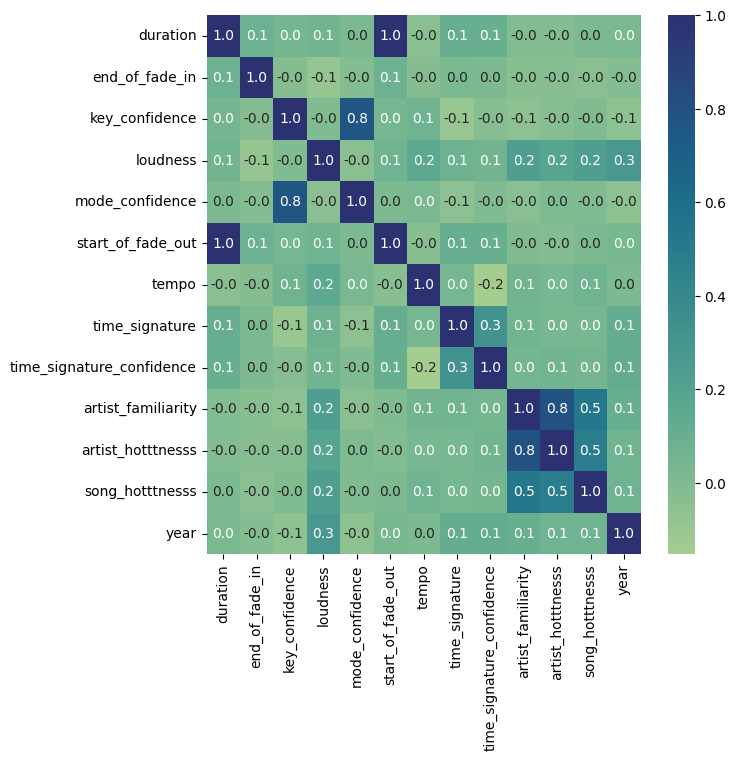

In [ ]:
corr = df.drop(columns = ["key", "mode", "song_id"]).corr()
plt.figure(figsize = (7,7))
sns.heatmap(corr, annot = True, cmap = "crest", fmt = ".1f")

##### Now working with key and mode as they are categorical features (even though their data type is int)
##### (slighly different distribution is visible for different categories in keys, for mode it is mostly similar)

In [ ]:
fig, axs = plt.subplots(12, figsize = (4,48))
for i in range(12):
  axs[i].hist(df[df["key"] == i]["song_hotttnesss"])
  axs[i].set_title("key = " + str(i))

In [ ]:
fig, axs = plt.subplots(2, figsize = (4,8))
for i in range(2):
  axs[i].hist(df[df["mode"] == i]["song_hotttnesss"])
  axs[i].set_title("mode = " + str(i))

#####making scatterplots to visualise interdependency among features

In [ ]:
pd.plotting.scatter_matrix(df.drop(columns = ["song_id"]), figsize = (30,30))

array([[<Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='end_of_fade_in', ylabel='duration'>,
        <Axes: xlabel='key', ylabel='duration'>,
        <Axes: xlabel='key_confidence', ylabel='duration'>,
        <Axes: xlabel='loudness', ylabel='duration'>,
        <Axes: xlabel='mode', ylabel='duration'>,
        <Axes: xlabel='mode_confidence', ylabel='duration'>,
        <Axes: xlabel='start_of_fade_out', ylabel='duration'>,
        <Axes: xlabel='tempo', ylabel='duration'>,
        <Axes: xlabel='time_signature', ylabel='duration'>,
        <Axes: xlabel='time_signature_confidence', ylabel='duration'>,
        <Axes: xlabel='artist_familiarity', ylabel='duration'>,
        <Axes: xlabel='artist_hotttnesss', ylabel='duration'>,
        <Axes: xlabel='song_hotttnesss', ylabel='duration'>,
        <Axes: xlabel='year', ylabel='duration'>],
       [<Axes: xlabel='duration', ylabel='end_of_fade_in'>,
        <Axes: xlabel='end_of_fade_in', ylabel='end_of_fade_in'>,
  

####pre processing the features to make them ready for predictions

#####seeing how our dataset looks like until now

In [ ]:
df

duration  end_of_fade_in  key  key_confidence  loudness  mode  \
0     269.81832           5.300    4           0.717   -13.496     1   
1     209.60608           0.066    2           0.092    -4.501     1   
2     153.28608           0.000    1           0.087    -7.535     1   
3     172.01587           0.331    1           0.035    -9.745     0   
4     377.67791           0.537    2           0.656   -21.787     1   
...         ...             ...  ...             ...       ...   ...   
3062  329.69098           0.351    5           0.057    -6.658     0   
3063  267.33669           0.000    7           1.000    -4.732     1   
3064  274.10240           0.000    9           0.370   -13.275     0   
3065  233.79546           0.481    2           0.749    -8.023     1   
3066  186.09587           0.218    7           0.459    -5.274     1   

      mode_confidence  start_of_fade_out    tempo  time_signature  \
0               0.652            258.990   86.643               4   
1               0.371            198.699  129.738               4   
2               0.468            147.696  125.558               4   
3               0.607            167.869  175.393               4   
4               0.463            364.037  109.671               5   
...               ...                ...      ...             ...   
3062            0.246            309.992  115.106               4   
3063            0.787            260.197  111.865               4   
3064            0.457            264.423   95.779               4   
3065            0.854            218.424   89.665               4   
3066            0.568            174.585  135.016               4   

      time_signature_confidence  artist_familiarity  artist_hotttnesss  \
0                         0.487            0.426668           0.332276   
1                         0.562            0.651046           0.401724   
2                         1.000            0.564512           0.326845   
3                         0.751            0.415785           0.307902   
4                         0.824            0.612838           0.482299   
...                         ...                 ...                ...   
3062                      0.318            0.872537           0.610731   
3063                      1.000            0.716854           0.414236   
3064                      0.865            0.628274           0.428835   
3065                      0.000            0.698772           0.440670   
3066                      0.529            0.581475           0.292663   

      song_hotttnesss                song_id    year  
0            0.265861  b'SOIAZJW12AB01853F1'  1984.0  
1            0.604501  b'SOFSOCN12A8C143F5D'  2007.0  
2            0.721573  b'SOONOZL12A6D4FC475'  2006.0  
3            0.000000  b'SOIKVVS12AB0184063'  1991.0  
4            0.000000  b'SOMCCPJ12A8C142B6B'  2004.0  
...               ...                    ...     ...  
3062         0.730950  b'SOZNZIN12A6701E95F'  1989.0  
3063         0.789431  b'SOWJCOU12A8C1374EA'  1988.0  
3064         0.549895  b'SONFVVI12A8C133210'  2003.0  
3065         0.629791  b'SOUEYVF12A58A7B70F'  2009.0  
3066         0.000000  b'SOBEBCP12AB0182AEE'  2009.0  

[3067 rows x 16 columns]

#####starting with one hot encoding of categorical features (key and mode)

In [ ]:
enc = OneHotEncoder()
one_hot_encoded = pd.DataFrame(enc.fit_transform(df[["key", "mode"]].iloc[:,:]).toarray())
feature_names = enc.get_feature_names_out(["key", "mode"]).tolist()
one_hot_encoded.columns = feature_names
one_hot_encoded

key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0       0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3062    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3063    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3064    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3065    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3066    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

      key_10  key_11  mode_0  mode_1  
0        0.0     0.0     0.0     1.0  
1        0.0     0.0     0.0     1.0  
2        0.0     0.0     0.0     1.0  
3        0.0     0.0     1.0     0.0  
4        0.0     0.0     0.0     1.0  
...      ...     ...     ...     ...  
3062     0.0     0.0     1.0     0.0  
3063     0.0     0.0     0.0     1.0  
3064     0.0     0.0     1.0     0.0  
3065     0.0     0.0     0.0     1.0  
3066     0.0     0.0     0.0     1.0  

[3067 rows x 14 columns]

##### now normalizing the remaining features to bring them to same scale

In [ ]:
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(df.drop(columns = ["key", "mode", "song_id"], axis = 1)), columns = df.drop(columns = ["key", "mode", "song_id"], axis = 1).columns.tolist())
normalized

duration  end_of_fade_in  key_confidence  loudness  mode_confidence  \
0     0.165101        0.160742           0.717  0.667227            0.652   
1     0.127258        0.002002           0.092  0.880091            0.371   
2     0.091860        0.000000           0.087  0.808292            0.468   
3     0.103632        0.010039           0.035  0.755993            0.607   
4     0.232892        0.016287           0.656  0.471023            0.463   
...        ...             ...             ...       ...              ...   
3062  0.202732        0.010645           0.057  0.829046            0.246   
3063  0.163542        0.000000           1.000  0.874624            0.787   
3064  0.167794        0.000000           0.370  0.672457            0.457   
3065  0.142461        0.014588           0.749  0.796744            0.854   
3066  0.112481        0.006612           0.459  0.861798            0.568   

      start_of_fade_out     tempo  time_signature  time_signature_confidence  \
0              0.159295  0.334947        0.571429                      0.487   
1              0.121162  0.501544        0.571429                      0.562   
2              0.088904  0.485385        0.571429                      1.000   
3              0.101663  0.678039        0.571429                      0.751   
4              0.225735  0.423969        0.714286                      0.824   
...                 ...       ...             ...                        ...   
3062           0.191553  0.444980        0.571429                      0.318   
3063           0.160058  0.432451        0.571429                      1.000   
3064           0.162731  0.370265        0.571429                      0.865   
3065           0.133638  0.346629        0.571429                      0.000   
3066           0.105911  0.521948        0.571429                      0.529   

      artist_familiarity  artist_hotttnesss  song_hotttnesss      year  
0               0.426668           0.306951         0.265861  0.535714  
1               0.651046           0.371106         0.604501  0.946429  
2               0.564512           0.301935         0.721573  0.928571  
3               0.415785           0.284435         0.000000  0.660714  
4               0.612838           0.445541         0.000000  0.892857  
...                  ...                ...              ...       ...  
3062            0.872537           0.564185         0.730950  0.625000  
3063            0.716854           0.382665         0.789431  0.607143  
3064            0.628274           0.396151         0.549895  0.875000  
3065            0.698772           0.407085         0.629791  0.982143  
3066            0.581475           0.270358         0.000000  0.982143  

[3067 rows x 13 columns]

#####combining the above to get the final dataset

In [ ]:
final_df = pd.concat([one_hot_encoded, normalized], axis = 1)
final_df

key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0       0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3062    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3063    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3064    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3065    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3066    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

      key_10  key_11  mode_0  mode_1  duration  end_of_fade_in  \
0        0.0     0.0     0.0     1.0  0.165101        0.160742   
1        0.0     0.0     0.0     1.0  0.127258        0.002002   
2        0.0     0.0     0.0     1.0  0.091860        0.000000   
3        0.0     0.0     1.0     0.0  0.103632        0.010039   
4        0.0     0.0     0.0     1.0  0.232892        0.016287   
...      ...     ...     ...     ...       ...             ...   
3062     0.0     0.0     1.0     0.0  0.202732        0.010645   
3063     0.0     0.0     0.0     1.0  0.163542        0.000000   
3064     0.0     0.0     1.0     0.0  0.167794        0.000000   
3065     0.0     0.0     0.0     1.0  0.142461        0.014588   
3066     0.0     0.0     0.0     1.0  0.112481        0.006612   

      key_confidence  loudness  mode_confidence  start_of_fade_out     tempo  \
0              0.717  0.667227            0.652           0.159295  0.334947   
1              0.092  0.880091            0.371           0.121162  0.501544   
2              0.087  0.808292            0.468           0.088904  0.485385   
3              0.035  0.755993            0.607           0.101663  0.678039   
4              0.656  0.471023            0.463           0.225735  0.423969   
...              ...       ...              ...                ...       ...   
3062           0.057  0.829046            0.246           0.191553  0.444980   
3063           1.000  0.874624            0.787           0.160058  0.432451   
3064           0.370  0.672457            0.457           0.162731  0.370265   
3065           0.749  0.796744            0.854           0.133638  0.346629   
3066           0.459  0.861798            0.568           0.105911  0.521948   

      time_signature  time_signature_confidence  artist_familiarity  \
0           0.571429                      0.487            0.426668   
1           0.571429                      0.562            0.651046   
2           0.571429                      1.000            0.564512   
3           0.571429                      0.751            0.415785   
4           0.714286                      0.824            0.612838   
...              ...                        ...                 ...   
3062        0.571429                      0.318            0.872537   
3063        0.571429                      1.000            0.716854   
3064        0.571429                      0.865            0.628274   
3065        0.571429                      0.000            0.698772   
3066        0.571429                      0.529            0.581475   

      artist_hotttnesss  song_hotttnesss      year  
0              0.306951         0.265861  0.535714  
1              0.371106         0.604501  0.946429  
2              0.301935         0.721573  0.928571  
3              0.284435         0.000000  0.660714  
4              0.445541         0.000000  0.892857  
...                 ...              ...       ...  
3062           0.564185         0.730950  0.625000  
3063           0.382665         0.7894

#Step 1: Song Popularity prediction

#### creating a new target variable for classification (0 for song_hotttness < median and 1 for song_hotttness >= median)

In [ ]:
median = final_df["song_hotttnesss"].median()
median

0.4733465411087876

In [ ]:
final_df['isPopular'] = final_df["song_hotttnesss"].apply(lambda x: 0 if x < median else 1)

####checking the distribution of the new target variable for classification (should be roughly equal)

In [ ]:
final_df['isPopular'].value_counts()

1    1544
0    1523
Name: isPopular, dtype: int64

####checking the feature importance for binary target variable using random forest

In [ ]:
X = final_df.drop(columns = ["song_hotttnesss", "isPopular"], axis = 1).copy()
X

key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0       0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3062    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3063    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3064    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3065    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3066    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

      key_10  key_11  mode_0  mode_1  duration  end_of_fade_in  \
0        0.0     0.0     0.0     1.0  0.165101        0.160742   
1        0.0     0.0     0.0     1.0  0.127258        0.002002   
2        0.0     0.0     0.0     1.0  0.091860        0.000000   
3        0.0     0.0     1.0     0.0  0.103632        0.010039   
4        0.0     0.0     0.0     1.0  0.232892        0.016287   
...      ...     ...     ...     ...       ...             ...   
3062     0.0     0.0     1.0     0.0  0.202732        0.010645   
3063     0.0     0.0     0.0     1.0  0.163542        0.000000   
3064     0.0     0.0     1.0     0.0  0.167794        0.000000   
3065     0.0     0.0     0.0     1.0  0.142461        0.014588   
3066     0.0     0.0     0.0     1.0  0.112481        0.006612   

      key_confidence  loudness  mode_confidence  start_of_fade_out     tempo  \
0              0.717  0.667227            0.652           0.159295  0.334947   
1              0.092  0.880091            0.371           0.121162  0.501544   
2              0.087  0.808292            0.468           0.088904  0.485385   
3              0.035  0.755993            0.607           0.101663  0.678039   
4              0.656  0.471023            0.463           0.225735  0.423969   
...              ...       ...              ...                ...       ...   
3062           0.057  0.829046            0.246           0.191553  0.444980   
3063           1.000  0.874624            0.787           0.160058  0.432451   
3064           0.370  0.672457            0.457           0.162731  0.370265   
3065           0.749  0.796744            0.854           0.133638  0.346629   
3066           0.459  0.861798            0.568           0.105911  0.521948   

      time_signature  time_signature_confidence  artist_familiarity  \
0           0.571429                      0.487            0.426668   
1           0.571429                      0.562            0.651046   
2           0.571429                      1.000            0.564512   
3           0.571429                      0.751            0.415785   
4           0.714286                      0.824            0.612838   
...              ...                        ...                 ...   
3062        0.571429                      0.318            0.872537   
3063        0.571429                      1.000            0.716854   
3064        0.571429                      0.865            0.628274   
3065        0.571429                      0.000            0.698772   
3066        0.571429                      0.529            0.581475   

      artist_hotttnesss      year  
0              0.306951  0.535714  
1              0.371106  0.946429  
2              0.301935  0.928571  
3              0.284435  0.660714  
4              0.445541  0.892857  
...                 ...       ...  
3062           0.564185  0.625000  
3063           0.382665  0.607143  
3064           0.396151  0.875000  
3065           0.407085  0.982143  
3066           0.270358  0.982143  

[3067 rows x 26 columns]

In [ ]:
Y = final_df['isPopular'].copy()
Y

0       0
1       1
2       1
3       0
4       0
       ..
3062    1
3063    1
3064    1
3065    1
3066    0
Name: isPopular, Length: 3067, dtype: int64

In [ ]:
model = RandomForestClassifier(n_estimators = 200 , max_depth = 4)
model.fit(X,Y)

RandomForestClassifier(max_depth=4, n_estimators=200)

<Axes: xlabel='Features'>

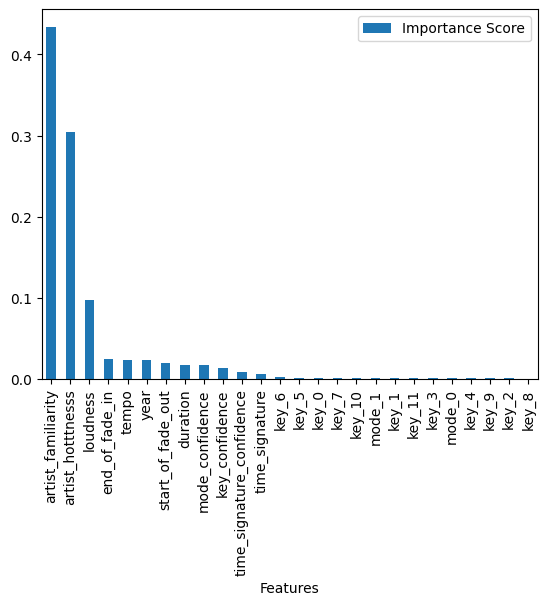

In [ ]:
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace = True, ascending = False)
features_df.plot(x = 'Features',y = 'Importance Score', kind = 'bar')

In [ ]:
model = GradientBoostingClassifier(n_estimators = 200 , max_depth = 4)
model.fit(X,Y)

GradientBoostingClassifier(max_depth=4, n_estimators=200)

<Axes: xlabel='Features'>

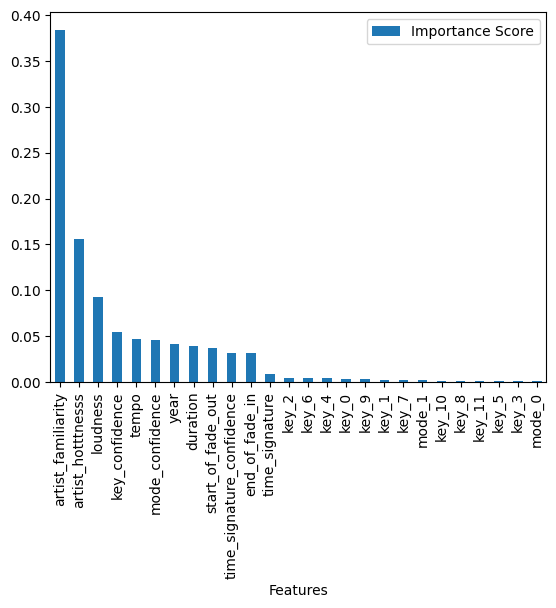

In [ ]:
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace = True, ascending = False)
features_df.plot(x = 'Features',y = 'Importance Score', kind = 'bar')

####Performing Classification using Random Forest Classifier and Gradient Boosting Classifier

In [ ]:
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rfc = RandomForestClassifier(random_state = 100)
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X, Y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Best score: 0.709502048450776


In [ ]:
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rfc = GradientBoostingClassifier(random_state = 100)
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, scoring = "accuracy")
grid_search.fit(X, Y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.7124341759170205


#### Now reading the triplet dataset having users, songs, and number of times listened 

In [ ]:
udf = pd.read_csv('train_triplets.txt', header = None, sep = '\t', names = ['user_id', 'song_id', 'listen_count'])

####performing inner join on the entire user based data to select only the rows having songs for which we have vectors

In [ ]:
req_songs = df["song_id"].apply(lambda x: x[2:-1]).tolist()
udf_req = udf[udf["song_id"].isin(req_songs)]

In [ ]:
udf_req.to_csv("train_triplets_req.csv")

#Step 2 Collaborative Filtering

Collaborative Filtering is uploaded in a seperate file

#Step 3 Content Based Filtering

In [ ]:
data = pd.read_csv("train_triplets_req.csv")

In [ ]:
data

Unnamed: 0                                   user_id  \
0               90  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
1              182  4bd88bfb25263a75bbdd467e74018f4ae570e5df   
2              197  4bd88bfb25263a75bbdd467e74018f4ae570e5df   
3              304  b64cdd1a0bd907e5e00b39e345194768e330d652   
4              308  b64cdd1a0bd907e5e00b39e345194768e330d652   
...            ...                                       ...   
524167    48373339  8305c896f42308824da7d4386f4b9ee584281412   
524168    48373364  8305c896f42308824da7d4386f4b9ee584281412   
524169    48373382  8305c896f42308824da7d4386f4b9ee584281412   
524170    48373405  8305c896f42308824da7d4386f4b9ee584281412   
524171    48373415  8305c896f42308824da7d4386f4b9ee584281412   

                   song_id  listen_count  
0       SOWEZSI12A81C21CE6             1  
1       SODCXXY12AB0187452             2  
2       SOWPAXV12A67ADA046            18  
3       SOLXDDC12A6701FBFD             1  
4       SONJBQX12A6D4F8382             4  
...                    ...           ...  
524167  SONJBQX12A6D4F8382             1  
524168  SOQHWMN12A6701E2D9             1  
524169  SOSQIHH12A8C13370B             1  
524170  SOUCKDH12A8C138FF5             2  
524171  SOULTKQ12AB018A183             4  

[524172 rows x 4 columns]

In [ ]:
data["listen_count"].value_counts().head(5)

1    319817
2     80330
3     35440
5     20675
4     20036
Name: listen_count, dtype: int64

In [ ]:
def get_top_n_songs(user,n):
  values = data[data["user_id"] == user]
  
  return list(values.sort_values("listen_count",ascending=False).head(n)["song_id"])
  

In [ ]:
def get_song_listen_time(user,song):
    
    if len(data[(data["user_id"] == user) & (data["song_id"] == song)]["listen_count"]) == 0:
        return 0
    return data[(data["user_id"] == user) & (data["song_id"] == song)]["listen_count"].values[0]

In [ ]:
get_song_listen_time("b80344d063b5ccb3212f76538f3d9e43d87dca9e","SOWEZSI12A81C21CE6")

1

In [ ]:
get_top_n_songs("4bd88bfb25263a75bbdd467e74018f4ae570e5df",2)

['SOWPAXV12A67ADA046', 'SODCXXY12AB0187452']

In [ ]:
df_with_id = pd.concat([final_df, df["song_id"]], axis = 1)


In [ ]:
 df_with_id["song_id"] = df_with_id["song_id"].apply(lambda x: x[2:-1])

In [ ]:
df_with_id

key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0       0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
3062    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3063    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
3064    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
3065    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3066    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

      key_10  key_11  mode_0  mode_1  duration  end_of_fade_in  \
0        0.0     0.0     0.0     1.0  0.165101        0.160742   
1        0.0     0.0     0.0     1.0  0.127258        0.002002   
2        0.0     0.0     0.0     1.0  0.091860        0.000000   
3        0.0     0.0     1.0     0.0  0.103632        0.010039   
4        0.0     0.0     0.0     1.0  0.232892        0.016287   
...      ...     ...     ...     ...       ...             ...   
3062     0.0     0.0     1.0     0.0  0.202732        0.010645   
3063     0.0     0.0     0.0     1.0  0.163542        0.000000   
3064     0.0     0.0     1.0     0.0  0.167794        0.000000   
3065     0.0     0.0     0.0     1.0  0.142461        0.014588   
3066     0.0     0.0     0.0     1.0  0.112481        0.006612   

      key_confidence  loudness  mode_confidence  start_of_fade_out     tempo  \
0              0.717  0.667227            0.652           0.159295  0.334947   
1              0.092  0.880091            0.371           0.121162  0.501544   
2              0.087  0.808292            0.468           0.088904  0.485385   
3              0.035  0.755993            0.607           0.101663  0.678039   
4              0.656  0.471023            0.463           0.225735  0.423969   
...              ...       ...              ...                ...       ...   
3062           0.057  0.829046            0.246           0.191553  0.444980   
3063           1.000  0.874624            0.787           0.160058  0.432451   
3064           0.370  0.672457            0.457           0.162731  0.370265   
3065           0.749  0.796744            0.854           0.133638  0.346629   
3066           0.459  0.861798            0.568           0.105911  0.521948   

      time_signature  time_signature_confidence  artist_familiarity  \
0           0.571429                      0.487            0.426668   
1           0.571429                      0.562            0.651046   
2           0.571429                      1.000            0.564512   
3           0.571429                      0.751            0.415785   
4           0.714286                      0.824            0.612838   
...              ...                        ...                 ...   
3062        0.571429                      0.318            0.872537   
3063        0.571429                      1.000            0.716854   
3064        0.571429                      0.865            0.628274   
3065        0.571429                      0.000            0.698772   
3066        0.571429                      0.529            0.581475   

      artist_hotttnesss  song_hotttnesss      year             song_id  
0              0.306951         0.265861  0.535714  SOIAZJW12AB01853F1  
1              0.371106         0.604501  0.946429  SOFSOCN12A8C143F5D  
2              0.301935         0.721573  0.928571  SOONOZL12A6D4FC475  
3              0.284435         0.000000  0.660714  SOIKVVS12AB0184063  
4              0.445541         0.000000  0.892857  SOMCCPJ12A8C142B6B  
...                 ... 

In [ ]:
from scipy.spatial.distance import cosine


In [ ]:
def get_song_by_id(id):
  ret_df =  df_with_id[df_with_id["song_id"] == id]
  return ret_df.drop("song_id",axis=1).to_numpy()[0]
  #return ret_df

In [ ]:
song1 = get_song_by_id("SOFSOCN12A8C143F5D")

In [ ]:
def cosine_similarity(u,v):

  return 1-cosine(u,v)

In [ ]:
from tqdm import tqdm

In [296]:
def get_top_n_similar_songs(id,no_top_songs,no_of_rec):

    top_songs = get_top_n_songs(id,no_top_songs)

    if len(top_songs) == 0: return None
    similarities = []

    for _,row in tqdm(df_with_id.iterrows()):

      sim = 0
      song_listen_times = 0
      for song_id in top_songs:

        song = get_song_by_id(song_id)

        
        sim += get_song_listen_time(id,song_id) * cosine_similarity(song, row.drop(labels=["song_id"]).to_numpy())

        song_listen_times += get_song_listen_time(id,song_id)
      
      sim = sim/song_listen_times
      
      print(sim)
      similarities.append([sim,row["song_id"]])
      similarities.sort(key=lambda a: -a[0])

      final_ans = []
      for s in similarities:

        if get_song_listen_time(id,s[1]) == 0:
          final_ans.append(s)

        if len(final_ans) == no_of_rec:
            break
    return  final_ans
      

In [297]:
similarities = get_top_n_similar_songs("b80344d063b5ccb3212f76538f3d9e43d87dca9e",3,5)

1it [00:00,  1.10it/s]

0.4759177824697024
0.5568435999697732


3it [00:03,  1.13s/it]

0.5219732490879005
0.6371091939731446


4it [00:03,  1.09it/s]

0.4460426477244107


5it [00:04,  1.22it/s]

0.5540003943870856


6it [00:05,  1.32it/s]

0.5232037815225538


7it [00:05,  1.36it/s]

0.5187729447897634


8it [00:06,  1.41it/s]

0.5202313245595525


9it [00:07,  1.45it/s]

0.7096320436607121


10it [00:07,  1.47it/s]

0.7080004109982593


11it [00:08,  1.50it/s]

0.713300338795686


12it [00:09,  1.51it/s]

0.5351131721113447


13it [00:10,  1.30it/s]

0.5451817616935872


14it [00:11,  1.10it/s]

0.5566343056417069


15it [00:12,  1.01s/it]

0.4499333670106158


16it [00:13,  1.08s/it]

0.5470342607148992


17it [00:14,  1.02it/s]

0.5181203927282153


18it [00:15,  1.14it/s]

0.43459869973571086


19it [00:15,  1.23it/s]

0.5759216077547228


20it [00:16,  1.30it/s]

0.7543991904781532


21it [00:17,  1.37it/s]

0.7453749442311012


22it [00:17,  1.41it/s]

0.522594797195494


23it [00:18,  1.45it/s]

0.5730031909741188


24it [00:19,  1.47it/s]

0.6062394887666115


25it [00:19,  1.50it/s]

0.657069336694533


26it [00:20,  1.50it/s]

0.5387048452651865


27it [00:21,  1.50it/s]

0.5874640500016277


28it [00:21,  1.52it/s]

0.5064941325714455


29it [00:22,  1.53it/s]

0.5117737074563975


30it [00:23,  1.53it/s]

0.5449191187794443


31it [00:23,  1.53it/s]

0.7582276282236154


32it [00:24,  1.40it/s]

0.7237393645480978


33it [00:25,  1.16it/s]

0.5705145082809648


34it [00:27,  1.01it/s]

0.4905032128851532


35it [00:28,  1.07s/it]

0.5600117472734887


36it [00:29,  1.00s/it]

0.5249425961840152


37it [00:29,  1.12it/s]

0.5511782004552079


38it [00:30,  1.21it/s]

0.5695932009320396


39it [00:31,  1.30it/s]

0.5293243544527106


40it [00:31,  1.36it/s]

0.5833079406122275


41it [00:32,  1.41it/s]

0.6090556488642178


42it [00:33,  1.45it/s]

0.4546493536236689


43it [00:33,  1.47it/s]

0.5278491320470834


44it [00:34,  1.49it/s]

0.49037492896495816


45it [00:34,  1.51it/s]

0.612408174663484


46it [00:35,  1.52it/s]

0.49786973515778654


47it [00:36,  1.52it/s]

0.36764978907244417


48it [00:36,  1.53it/s]

0.5215932215875895


49it [00:37,  1.53it/s]

0.4465200283498778


50it [00:38,  1.53it/s]

0.5394011374521008


51it [00:38,  1.47it/s]

0.6975615554022382


52it [00:40,  1.19it/s]

0.49270068685239266


53it [00:41,  1.03it/s]

0.5115712992056821


54it [00:42,  1.06s/it]

0.5209093202021605


55it [00:43,  1.03s/it]

0.684700386472233


56it [00:44,  1.09it/s]

0.33463543419971686


57it [00:45,  1.20it/s]

0.7340208546090099


58it [00:45,  1.28it/s]

0.5855913178734199


59it [00:46,  1.35it/s]

0.5262598810970781


60it [00:46,  1.40it/s]

0.5567226951898472


61it [00:47,  1.44it/s]

0.5247667138612937


62it [00:48,  1.46it/s]

0.568379229624788


63it [00:48,  1.47it/s]

0.538355907463532


64it [00:49,  1.49it/s]

0.5342858827835539


65it [00:50,  1.49it/s]

0.4967544973870903


66it [00:50,  1.50it/s]

0.7417392529711849


67it [00:51,  1.51it/s]

0.6720997831718144


68it [00:52,  1.51it/s]

0.7282821994440689


69it [00:52,  1.53it/s]

0.4539830119103414


70it [00:53,  1.47it/s]

0.7305267786134909


71it [00:54,  1.19it/s]

0.6766940445310046


72it [00:56,  1.03it/s]

0.7100350412187448


73it [00:57,  1.06s/it]

0.4857271336632035


74it [00:58,  1.04s/it]

0.5650371939914947


75it [00:59,  1.08it/s]

0.7705441032432347


76it [00:59,  1.19it/s]

0.5114792678098933


77it [01:00,  1.28it/s]

0.40438293950661164


78it [01:00,  1.35it/s]

0.47199878187332056


79it [01:01,  1.39it/s]

0.8599650517544547


80it [01:02,  1.43it/s]

0.7071556589026368


81it [01:02,  1.46it/s]

0.5057004821689765


82it [01:03,  1.47it/s]

0.7108404146874961


83it [01:04,  1.51it/s]

0.5820870751347785


84it [01:04,  1.51it/s]

0.5567766705540431


85it [01:05,  1.50it/s]

0.6239918708949833


86it [01:06,  1.52it/s]

0.6012687707779003


87it [01:06,  1.52it/s]

0.4586960332795528


88it [01:07,  1.52it/s]

0.5294712038614022


89it [01:08,  1.51it/s]

0.4817270240261483


90it [01:09,  1.20it/s]

0.7230414661530661


91it [01:10,  1.04it/s]

0.5475857091462256


92it [01:11,  1.04s/it]

0.741016797679837


93it [01:12,  1.06s/it]

0.5864249657019854


94it [01:13,  1.07it/s]

0.6882014145075197


95it [01:14,  1.17it/s]

0.7406718766491505


96it [01:14,  1.26it/s]

0.5629597524241248


97it [01:15,  1.34it/s]

0.5112790125734021


98it [01:16,  1.39it/s]

0.5446513011554623


99it [01:16,  1.43it/s]

0.7476577522168443


100it [01:17,  1.47it/s]

0.6425672363938653


101it [01:18,  1.48it/s]

0.5238555782247063


102it [01:18,  1.50it/s]

0.7194259060976648


103it [01:19,  1.52it/s]

0.5611629977755547


104it [01:20,  1.52it/s]

0.5230212098490047


105it [01:20,  1.53it/s]

0.5243765238143426


106it [01:21,  1.53it/s]

0.5060101799008709


107it [01:22,  1.54it/s]

0.7715898094366005


108it [01:22,  1.54it/s]

0.6957407946347477


109it [01:23,  1.25it/s]

0.5280047072675802


110it [01:25,  1.08it/s]

0.5682339127238302


111it [01:26,  1.02s/it]

0.5135335791075681


112it [01:27,  1.07s/it]

0.4403908312438114


113it [01:28,  1.06it/s]

0.5213826269762563


114it [01:28,  1.18it/s]

0.7174913689666916


115it [01:29,  1.26it/s]

0.7491465890575055


116it [01:30,  1.34it/s]

0.7116970877611162


117it [01:30,  1.39it/s]

0.5930824739202991


118it [01:31,  1.43it/s]

0.5172835354780426


119it [01:32,  1.46it/s]

0.5723073592240314


120it [01:32,  1.48it/s]

0.5590532811053859


121it [01:33,  1.50it/s]

0.5998912407340989


122it [01:34,  1.52it/s]

0.5409086041760206


123it [01:34,  1.52it/s]

0.567231742241348


124it [01:35,  1.52it/s]

0.5197650805141166


125it [01:35,  1.54it/s]

0.5015132110134869


126it [01:36,  1.54it/s]

0.5147390142245183


127it [01:37,  1.54it/s]

0.5283458208328543


128it [01:38,  1.35it/s]

0.534829734270929


129it [01:39,  1.12it/s]

0.5359118748046411


130it [01:40,  1.00it/s]

0.565492687157698


131it [01:41,  1.07s/it]

0.7700740281345939


132it [01:42,  1.01it/s]

0.526113667960451


133it [01:43,  1.13it/s]

0.7033241454526338


134it [01:44,  1.23it/s]

0.5878328939429566


135it [01:44,  1.30it/s]

0.5005597010976643


136it [01:45,  1.36it/s]

0.7337311813341134


137it [01:46,  1.41it/s]

0.749342088086234


138it [01:46,  1.44it/s]

0.7723539082955718


139it [01:47,  1.47it/s]

0.533008431191599


140it [01:47,  1.49it/s]

0.6628560454705699


141it [01:48,  1.51it/s]

0.5411932877584277


142it [01:49,  1.52it/s]

0.5812103677790502


143it [01:49,  1.52it/s]

0.6098083360304141


144it [01:50,  1.54it/s]

0.5812103677790502


145it [01:51,  1.53it/s]

0.7096586869517947


146it [01:51,  1.53it/s]

0.7096586869517947


147it [01:52,  1.41it/s]

0.5738713462728711


148it [01:53,  1.15it/s]

0.5738713462728711


149it [01:55,  1.02it/s]

0.5314848291318006


150it [01:56,  1.06s/it]

0.5227003535268056


151it [01:57,  1.01s/it]

0.7030629321483388


152it [01:58,  1.11it/s]

0.7054953140927607


153it [01:58,  1.20it/s]

0.696624588636871


154it [01:59,  1.28it/s]

0.7354774535362109


155it [01:59,  1.36it/s]

0.5970147721562534


156it [02:00,  1.41it/s]

0.6943960887157353


157it [02:01,  1.44it/s]

0.7726869112740639


158it [02:01,  1.48it/s]

0.7342429697737038


159it [02:02,  1.50it/s]

0.5275913278650107


160it [02:03,  1.51it/s]

0.7747722868020445


161it [02:03,  1.52it/s]

0.5345660426044225


162it [02:04,  1.52it/s]

0.5675545744310372


163it [02:05,  1.52it/s]

0.604108138723042


164it [02:05,  1.52it/s]

0.7249743874761366


165it [02:06,  1.53it/s]

0.6099100931320133


166it [02:07,  1.48it/s]

0.47320758918533656


167it [02:08,  1.19it/s]

0.6694673724575352


168it [02:09,  1.04it/s]

0.5300636806797011


169it [02:10,  1.05s/it]

0.5383775152019805


170it [02:11,  1.04s/it]

0.58192072483441


171it [02:12,  1.08it/s]

0.5643041313172519


172it [02:13,  1.20it/s]

0.7098175795989853


173it [02:13,  1.28it/s]

0.7623338081118595


174it [02:14,  1.33it/s]

0.7404116853696362


175it [02:15,  1.40it/s]

0.5614135871414703


176it [02:15,  1.44it/s]

0.5135161847873136


177it [02:16,  1.47it/s]

0.5000722641160856


178it [02:17,  1.49it/s]

0.7298886572755635


179it [02:17,  1.50it/s]

0.6063647101181248


180it [02:18,  1.51it/s]

0.5342449991178438


181it [02:19,  1.52it/s]

0.4209762390369258


182it [02:19,  1.52it/s]

0.7406442884583743


183it [02:20,  1.52it/s]

0.5434356205000438


184it [02:21,  1.53it/s]

0.6458467691577023


185it [02:21,  1.52it/s]

0.5397720362728803


186it [02:22,  1.21it/s]

0.5075094762010219


187it [02:24,  1.05it/s]

0.7781411754436748


188it [02:25,  1.04s/it]

0.47719654694882907


189it [02:26,  1.05s/it]

0.7792764785742119


190it [02:27,  1.08it/s]

0.7633957287834704


191it [02:27,  1.19it/s]

0.5537648691313499


192it [02:28,  1.27it/s]

0.5862095477065652


193it [02:29,  1.34it/s]

0.6226567405131693


194it [02:29,  1.39it/s]

0.7051305587562596


195it [02:30,  1.42it/s]

0.5271236870598577


196it [02:31,  1.45it/s]

0.6967491563205399


197it [02:31,  1.49it/s]

0.714171941957768


198it [02:32,  1.48it/s]

0.5883950437712219


199it [02:33,  1.49it/s]

0.5173422884317661


200it [02:33,  1.51it/s]

0.5862371592347736


201it [02:34,  1.51it/s]

0.7087167858137763


202it [02:34,  1.53it/s]

0.475495790927128


203it [02:35,  1.53it/s]

0.5055593471377204


204it [02:36,  1.52it/s]

0.60218015366139


205it [02:37,  1.24it/s]

0.5384382290131112


206it [02:38,  1.07it/s]

0.48840028068187746


207it [02:39,  1.03s/it]

0.5246713963905171


208it [02:41,  1.07s/it]

0.5626158864719586


209it [02:41,  1.06it/s]

0.4831298302409792


210it [02:42,  1.17it/s]

0.7308772454015691


211it [02:43,  1.26it/s]

0.9150807225300323


212it [02:43,  1.33it/s]

0.5519983078848043


213it [02:44,  1.38it/s]

0.5489276382009125


214it [02:45,  1.42it/s]

0.7414213770718612


215it [02:45,  1.45it/s]

0.7142044545000183


216it [02:46,  1.47it/s]

0.6805229981581034


217it [02:46,  1.50it/s]

0.7201839219145618


218it [02:47,  1.50it/s]

0.7317758257212582


219it [02:48,  1.51it/s]

0.6149160628080936


220it [02:48,  1.51it/s]

0.5605290692447772


221it [02:49,  1.52it/s]

0.7735867117392201


222it [02:50,  1.52it/s]

0.7460726227755008


223it [02:50,  1.52it/s]

0.7454215772743543


224it [02:52,  1.26it/s]

0.48166576632096736


225it [02:53,  1.07it/s]

0.37745403630794816


226it [02:54,  1.03s/it]

0.5455903060159714


227it [02:55,  1.08s/it]

0.5315267909892067


228it [02:56,  1.05it/s]

0.457841520224327


229it [02:57,  1.16it/s]

0.5981990549789883


230it [02:57,  1.25it/s]

0.7145951507664108


231it [02:58,  1.33it/s]

0.571680465639088


232it [02:59,  1.37it/s]

0.5045324927277801


233it [02:59,  1.42it/s]

0.5975638842209952


234it [03:00,  1.46it/s]

0.58335614209809


235it [03:00,  1.47it/s]

0.7466508804622637


236it [03:01,  1.49it/s]

0.5505815104390912


237it [03:02,  1.51it/s]

0.4966306082323375


238it [03:02,  1.52it/s]

0.7793637632324958


239it [03:03,  1.51it/s]

0.5543657713797853


240it [03:04,  1.27it/s]

0.5992998234239422


241it [03:05,  1.08it/s]

0.5364108362151571


242it [03:07,  1.10s/it]

0.6730532189359608


243it [03:08,  1.23s/it]

0.927321268811315


244it [03:10,  1.31s/it]

0.7126558981567551


245it [03:11,  1.32s/it]

0.43034531934587794


246it [03:12,  1.17s/it]

0.5205311181462484


247it [03:13,  1.02s/it]

0.5119750543419174


248it [03:13,  1.11it/s]

0.7108519176494131


249it [03:14,  1.20it/s]

0.5435536288471982


250it [03:15,  1.28it/s]

0.7479833965081173


251it [03:15,  1.35it/s]

0.7700453290148993


252it [03:16,  1.39it/s]

0.6836056163805327


253it [03:17,  1.44it/s]

0.5084990472496831


254it [03:17,  1.46it/s]

0.9062437435245568


255it [03:18,  1.49it/s]

0.684819932564944


256it [03:19,  1.50it/s]

0.6715004508258364


257it [03:19,  1.50it/s]

0.7183590648490218


258it [03:20,  1.53it/s]

0.6408892447466413


259it [03:21,  1.52it/s]

0.5539052753200843


260it [03:21,  1.52it/s]

0.7219081310350947


261it [03:22,  1.43it/s]

0.5702388781690728


262it [03:23,  1.15it/s]

0.6572919409675582


263it [03:25,  1.01it/s]

0.6142427263365975


264it [03:26,  1.07s/it]

0.7607284881767769


265it [03:27,  1.02s/it]

0.5831037337440256


266it [03:27,  1.10it/s]

0.5279589313155545


267it [03:28,  1.20it/s]

0.5369633869872231


268it [03:29,  1.28it/s]

0.7456743381836756


269it [03:29,  1.36it/s]

0.7303453706458406


270it [03:30,  1.40it/s]

0.6169853821560084


271it [03:31,  1.43it/s]

0.780861737372706


272it [03:31,  1.47it/s]

0.7637525367245721


273it [03:32,  1.48it/s]

0.5423408678455636


274it [03:33,  1.50it/s]

0.5219467707271931


275it [03:33,  1.51it/s]

0.5337446150139583


276it [03:34,  1.51it/s]

0.5259531787177216


277it [03:35,  1.52it/s]

0.5849782786725564


278it [03:35,  1.52it/s]

0.6273203858744261


279it [03:36,  1.53it/s]

0.5638361421038397


280it [03:37,  1.50it/s]

0.4725912616569051


281it [03:38,  1.21it/s]

0.7313205066766761


282it [03:39,  1.05it/s]

0.7074459067094153


283it [03:40,  1.05s/it]

0.5239401545544602


284it [03:41,  1.06s/it]

0.5822380711003403


285it [03:42,  1.07it/s]

0.5866882998632236


286it [03:43,  1.18it/s]

0.4638217054040539


287it [03:43,  1.26it/s]

0.5286004294390869


288it [03:44,  1.33it/s]

0.5561430874153742


289it [03:45,  1.40it/s]

0.508197711725296


290it [03:45,  1.43it/s]

0.49991865319416906


291it [03:46,  1.44it/s]

0.473222242812547


292it [03:47,  1.48it/s]

0.6509325774083137


293it [03:47,  1.49it/s]

0.7028813692678229


294it [03:48,  1.49it/s]

0.587930615655988


295it [03:49,  1.51it/s]

0.7354070097813736


296it [03:49,  1.51it/s]

0.6990806655978214


297it [03:50,  1.51it/s]

0.6056583505031088


298it [03:51,  1.51it/s]

0.539105042671934


299it [03:51,  1.51it/s]

0.5675099336386754


300it [03:52,  1.22it/s]

0.7385880014532193


301it [03:54,  1.05it/s]

0.5150574322195287


302it [03:55,  1.04s/it]

0.628207092585928


303it [03:56,  1.06s/it]

0.735237106346874


304it [03:57,  1.06it/s]

0.7133117089342925


305it [03:57,  1.16it/s]

0.5545662529440252


306it [03:58,  1.26it/s]

0.549465321211351


307it [03:59,  1.33it/s]

0.5656773281614648


308it [03:59,  1.38it/s]

0.5440614397334053


309it [04:00,  1.43it/s]

0.4159482797502323


310it [04:01,  1.45it/s]

0.4441219416130926


311it [04:01,  1.48it/s]

0.5723031190823479


312it [04:02,  1.49it/s]

0.49739071312242


313it [04:03,  1.51it/s]

0.8740729357532292


314it [04:03,  1.52it/s]

0.640357208280741


315it [04:04,  1.52it/s]

0.5027033651622239


316it [04:05,  1.53it/s]

0.5234562790051356


317it [04:05,  1.51it/s]

0.5565478419269504


318it [04:06,  1.51it/s]

0.4849572344294366


319it [04:07,  1.24it/s]

0.5766602659362241


320it [04:08,  1.06it/s]

0.6986091158457707


321it [04:10,  1.07s/it]

0.6119801894797453


322it [04:11,  1.10s/it]

0.5463233735470675


323it [04:11,  1.04it/s]

0.7569621205175221


324it [04:12,  1.14it/s]

0.47452783004559596


325it [04:13,  1.24it/s]

0.4472244961547298


326it [04:13,  1.32it/s]

0.5740722523153912


327it [04:14,  1.37it/s]

0.6133931343732287


328it [04:15,  1.42it/s]

0.7431170535449277


329it [04:15,  1.45it/s]

0.5685222045014335


330it [04:16,  1.46it/s]

0.7011305725291962


331it [04:17,  1.49it/s]

0.4326778083634867


332it [04:17,  1.50it/s]

0.6037137499970388


333it [04:18,  1.51it/s]

0.695906658687869


334it [04:19,  1.52it/s]

0.5753201002506431


335it [04:19,  1.52it/s]

0.5592555237328837


336it [04:20,  1.52it/s]

0.5592397009146228


337it [04:21,  1.53it/s]

0.8984324518616406


338it [04:22,  1.25it/s]

0.7322515860388011


339it [04:23,  1.08it/s]

0.5072390035069534


340it [04:24,  1.03s/it]

0.7308903706544131


341it [04:25,  1.08s/it]

0.48323483249188814


342it [04:26,  1.05it/s]

0.5541969810097566


343it [04:27,  1.16it/s]

0.5297030619002104


344it [04:27,  1.24it/s]

0.5837855988965505


345it [04:28,  1.32it/s]

0.5949857637787946


346it [04:29,  1.37it/s]

0.7683287703577621


347it [04:29,  1.41it/s]

0.5525901995089562


348it [04:30,  1.44it/s]

0.5839370036461234


349it [04:31,  1.46it/s]

0.5539958887578856


350it [04:31,  1.48it/s]

0.6817812884743873


351it [04:32,  1.50it/s]

0.5739184531234196


352it [04:33,  1.51it/s]

0.5265651173276001


353it [04:33,  1.51it/s]

0.5702251987188468


354it [04:34,  1.52it/s]

0.4853592560550448


355it [04:35,  1.53it/s]

0.5305302479335658


356it [04:35,  1.52it/s]

0.7688168287259751


357it [04:36,  1.27it/s]

0.46746643455798664


358it [04:38,  1.09it/s]

0.5050771586342369


359it [04:39,  1.01s/it]

0.5083394988043751


360it [04:40,  1.07s/it]

0.47341644085344625


361it [04:41,  1.02it/s]

0.6877763607878365


362it [04:41,  1.13it/s]

0.7155932312973651


363it [04:42,  1.22it/s]

0.46843019360097005


364it [04:43,  1.30it/s]

0.5246211235969228


365it [04:43,  1.36it/s]

0.4046011729752482


366it [04:44,  1.40it/s]

0.4890859299220194


367it [04:45,  1.43it/s]

0.547906745257736


368it [04:45,  1.46it/s]

0.5007455689789924


369it [04:46,  1.47it/s]

0.5428504259904275


370it [04:47,  1.48it/s]

0.5164646049905984


371it [04:47,  1.50it/s]

0.47729286736675125


372it [04:48,  1.50it/s]

0.693811645771584


373it [04:49,  1.51it/s]

0.684063090473484


374it [04:49,  1.51it/s]

0.691362598647874


375it [04:50,  1.51it/s]

0.530171825929506


376it [04:51,  1.31it/s]

0.5308215525578381


377it [04:52,  1.11it/s]

0.5453242273866088


378it [04:54,  1.01s/it]

0.5714633390392128


379it [04:55,  1.08s/it]

0.5161589756823475


380it [04:56,  1.02it/s]

0.7440025498094885


381it [04:56,  1.13it/s]

0.9307917692486823


382it [04:57,  1.24it/s]

0.5806274310280491


383it [04:57,  1.31it/s]

0.5767137258577227


384it [04:58,  1.36it/s]

0.5344176667804467


385it [04:59,  1.42it/s]

0.7418859836748616


386it [04:59,  1.44it/s]

0.7681829045839602


387it [05:00,  1.47it/s]

0.6607131876968387


388it [05:01,  1.49it/s]

0.5788392049244377


389it [05:01,  1.51it/s]

0.5152644890882453


390it [05:02,  1.51it/s]

0.7710255167248865


391it [05:03,  1.51it/s]

0.4879049660245649


392it [05:03,  1.52it/s]

0.6208855706756617


393it [05:04,  1.52it/s]

0.7487242633597095


394it [05:05,  1.52it/s]

0.5519518844900166


395it [05:06,  1.35it/s]

0.7579954598726028


396it [05:07,  1.12it/s]

0.7768984828336755


397it [05:08,  1.00s/it]

0.5625439772584816


398it [05:09,  1.07s/it]

0.7676473956719871


399it [05:10,  1.01s/it]

0.736814035174333


400it [05:11,  1.11it/s]

0.47903688484402474


401it [05:12,  1.21it/s]

0.687426260735539


402it [05:12,  1.29it/s]

0.45982655276596396


403it [05:13,  1.35it/s]

0.7583949812924448


404it [05:13,  1.41it/s]

0.47006572753602427


405it [05:14,  1.44it/s]

0.4920483237229144


406it [05:15,  1.46it/s]

0.5567292411267367


407it [05:15,  1.49it/s]

0.5387001022443216


408it [05:16,  1.48it/s]

0.7029233498422587


409it [05:17,  1.50it/s]

0.4716626472400114


410it [05:17,  1.51it/s]

0.6924682488606955


411it [05:18,  1.51it/s]

0.5702491238461846


412it [05:19,  1.51it/s]

0.4979097848958185


413it [05:19,  1.52it/s]

0.5404990627860163


414it [05:20,  1.41it/s]

0.489477845384497


415it [05:21,  1.15it/s]

0.7139291371722993


416it [05:23,  1.02it/s]

0.7679081793481406


417it [05:24,  1.07s/it]

0.5883377375579133


418it [05:25,  1.01s/it]

0.7550405853832103


419it [05:26,  1.10it/s]

0.5191229189394855


420it [05:26,  1.20it/s]

0.5454321918911069


421it [05:27,  1.28it/s]

0.5816770547135213


422it [05:27,  1.35it/s]

0.5999311600053171


423it [05:28,  1.39it/s]

0.5748138579965408


424it [05:29,  1.43it/s]

0.45596618326012495


425it [05:29,  1.46it/s]

0.7125352833880788


426it [05:30,  1.48it/s]

0.7567570694389376


427it [05:31,  1.50it/s]

0.7348458715085898


428it [05:31,  1.50it/s]

0.7353859117024206


429it [05:32,  1.51it/s]

0.6937578524058735


430it [05:33,  1.50it/s]

0.5452180137459066


431it [05:33,  1.51it/s]

0.7290858281511514


432it [05:34,  1.51it/s]

0.7293062816023665


433it [05:35,  1.42it/s]

0.7429185774602016


434it [05:36,  1.16it/s]

0.5645400943478593


435it [05:37,  1.02it/s]

0.5648469010370881


436it [05:39,  1.06s/it]

0.677407588298816


437it [05:40,  1.03s/it]

0.6185818577677944


438it [05:40,  1.10it/s]

0.4808397264793769


439it [05:41,  1.20it/s]

0.5336449183092358


440it [05:41,  1.28it/s]

0.5559264182722823


441it [05:42,  1.35it/s]

0.4419577227138036


442it [05:43,  1.39it/s]

0.5287484421463163


443it [05:43,  1.44it/s]

0.5764489869553708


444it [05:44,  1.46it/s]

0.5007072713978683


445it [05:45,  1.48it/s]

0.5572505440786145


446it [05:45,  1.49it/s]

0.46837664255096556


447it [05:46,  1.48it/s]

0.48519525156283705


448it [05:47,  1.50it/s]

0.5797363820452388


449it [05:47,  1.51it/s]

0.5942177969297376


450it [05:48,  1.51it/s]

0.6411504665036853


451it [05:49,  1.51it/s]

0.5532543031386247


452it [05:49,  1.45it/s]

0.5798220992079894


453it [05:51,  1.17it/s]

0.501119482937189


454it [05:52,  1.02it/s]

0.41346452906883113


455it [05:53,  1.06s/it]

0.7462526337760558


456it [05:54,  1.03s/it]

0.7171068485250881


457it [05:55,  1.09it/s]

0.5313726409257207


458it [05:56,  1.19it/s]

0.5408043416966637


459it [05:56,  1.28it/s]

0.5648591866330065


460it [05:57,  1.33it/s]

0.5576585010486628


461it [05:58,  1.39it/s]

0.5192315221892226


462it [05:58,  1.42it/s]

0.4730256310962141


463it [05:59,  1.44it/s]

0.4504420497345166


464it [05:59,  1.46it/s]

0.5114910086732584


465it [06:00,  1.47it/s]

0.5705120139069283


466it [06:01,  1.49it/s]

0.7333539433943356


467it [06:01,  1.51it/s]

0.7259237623445625


468it [06:02,  1.51it/s]

0.5405716146287975


469it [06:03,  1.51it/s]

0.7484852854643748


470it [06:03,  1.52it/s]

0.5436915253786444


471it [06:04,  1.46it/s]

0.5144702034566753


472it [06:05,  1.18it/s]

0.5073511890844572


473it [06:07,  1.03it/s]

0.5052738717311275


474it [06:08,  1.05s/it]

0.7848046170506919


475it [06:09,  1.04s/it]

0.5392074270011041


476it [06:10,  1.08it/s]

0.5144076318667637


477it [06:10,  1.18it/s]

0.5316548704369854


478it [06:11,  1.27it/s]

0.4929477583911247


479it [06:12,  1.34it/s]

0.7641442367186015


480it [06:12,  1.39it/s]

0.7268292476503978


481it [06:13,  1.42it/s]

0.5917694611161747


482it [06:14,  1.45it/s]

0.7329669858534156


483it [06:14,  1.48it/s]

0.5844485378917816


484it [06:15,  1.49it/s]

0.4856840170113398


485it [06:15,  1.51it/s]

0.6961123822494661


486it [06:16,  1.50it/s]

0.5511801214488694


487it [06:17,  1.51it/s]

0.5591021221219318


488it [06:17,  1.51it/s]

0.563026905645716


489it [06:18,  1.50it/s]

0.5937027210652986


490it [06:19,  1.44it/s]

0.542494832380304


491it [06:20,  1.16it/s]

0.7411384184054683


492it [06:22,  1.05s/it]

0.5792382025993572


493it [06:23,  1.20s/it]

0.5947383151292535


494it [06:25,  1.29s/it]

0.524586385367462


495it [06:26,  1.29s/it]

0.7839714449144086


496it [06:27,  1.30s/it]

0.5727768180927837


497it [06:28,  1.12s/it]

0.521932229377743


498it [06:29,  1.02it/s]

0.5197270187190037


499it [06:29,  1.12it/s]

0.5961757812843321


500it [06:30,  1.22it/s]

0.7680681227509317


501it [06:31,  1.29it/s]

0.4702185535811668


502it [06:31,  1.35it/s]

0.46925941986441577


503it [06:32,  1.40it/s]

0.5192735613241628


504it [06:33,  1.44it/s]

0.5707330230071948


505it [06:33,  1.45it/s]

0.7744630757367974


506it [06:34,  1.47it/s]

0.5401159372270448


507it [06:35,  1.49it/s]

0.7126760576393555


508it [06:35,  1.51it/s]

0.733068417121354


509it [06:36,  1.51it/s]

0.6982627582712347


510it [06:37,  1.52it/s]

0.5570565049483175


511it [06:37,  1.52it/s]

0.7107656447971232


512it [06:38,  1.25it/s]

0.6993715441593774


513it [06:40,  1.07it/s]

0.5431132030951776


514it [06:41,  1.03s/it]

0.48015275849071815


515it [06:42,  1.08s/it]

0.5487527656669712


516it [06:43,  1.05it/s]

0.5061356236363649


517it [06:43,  1.16it/s]

0.7084053179576665


518it [06:44,  1.25it/s]

0.7256180585697433


519it [06:45,  1.32it/s]

0.5671538364862531


520it [06:45,  1.37it/s]

0.7515806556577078


521it [06:46,  1.41it/s]

0.7196556627844416


522it [06:47,  1.45it/s]

0.685848362542427


523it [06:47,  1.46it/s]

0.7511169830009028


524it [06:48,  1.48it/s]

0.5513098082279559


525it [06:49,  1.48it/s]

0.753103901983532


526it [06:49,  1.49it/s]

0.558720157266235


527it [06:50,  1.50it/s]

0.47652571276154276


528it [06:51,  1.51it/s]

0.5637780063400437


529it [06:51,  1.50it/s]

0.6887371335929003


530it [06:52,  1.51it/s]

0.6963565260094531


531it [06:53,  1.24it/s]

0.7366438754545301


532it [06:54,  1.06it/s]

0.6836504638508651


533it [06:56,  1.03s/it]

0.7231204700067225


534it [06:57,  1.08s/it]

0.606329284036587


535it [06:57,  1.05it/s]

0.5412836277326228


536it [06:58,  1.17it/s]

0.7208689762285065


537it [06:59,  1.25it/s]

0.7477041083441709


538it [06:59,  1.32it/s]

0.576237519561047


539it [07:00,  1.38it/s]

0.7429700555731455


540it [07:01,  1.41it/s]

0.5891879191416824


541it [07:01,  1.44it/s]

0.7221490050282293


542it [07:02,  1.46it/s]

0.4175071261408867


543it [07:03,  1.49it/s]

0.5517781936180753


544it [07:03,  1.49it/s]

0.5878335069938023


545it [07:04,  1.49it/s]

0.9473139772114223


546it [07:05,  1.50it/s]

0.4765593477472261


547it [07:05,  1.50it/s]

0.557043804072991


548it [07:06,  1.50it/s]

0.4538634393684624


549it [07:07,  1.50it/s]

0.6435981533214877


550it [07:08,  1.23it/s]

0.5726082592654056


551it [07:09,  1.06it/s]

0.5427282738752882


552it [07:10,  1.04s/it]

0.520086846374158


553it [07:12,  1.08s/it]

0.45669190026820905


554it [07:12,  1.05it/s]

0.5271723670368929


555it [07:13,  1.15it/s]

0.5826880563028879


556it [07:14,  1.25it/s]

0.5030352260248363


557it [07:14,  1.31it/s]

0.6439371126348481


558it [07:15,  1.36it/s]

0.4392383473871593


559it [07:15,  1.41it/s]

0.7144648133198049


560it [07:16,  1.43it/s]

0.9261607838076905


561it [07:17,  1.45it/s]

0.552547923611998


562it [07:17,  1.48it/s]

0.4949852196617851


563it [07:18,  1.46it/s]

0.5317156015045054


564it [07:19,  1.47it/s]

0.726946880687079


565it [07:19,  1.50it/s]

0.44955607924905383


566it [07:20,  1.50it/s]

0.6957980467226748


567it [07:21,  1.50it/s]

0.5118487957336835


568it [07:21,  1.52it/s]

0.4609169472280157


569it [07:23,  1.22it/s]

0.952792982615457


570it [07:24,  1.06it/s]

0.7064451097025187


571it [07:25,  1.03s/it]

0.708167033522369


572it [07:26,  1.08s/it]

0.7188540610568107


573it [07:27,  1.05it/s]

0.7714384446635643


574it [07:28,  1.16it/s]

0.4878619438293209


575it [07:28,  1.25it/s]

0.7314520305624229


576it [07:29,  1.32it/s]

0.7544779812602121


577it [07:30,  1.38it/s]

0.6080236167584425


578it [07:30,  1.42it/s]

0.5497227572123039


579it [07:31,  1.44it/s]

0.7984944384022109


580it [07:32,  1.46it/s]

0.5825878554370565


581it [07:32,  1.47it/s]

0.6208953286433971


582it [07:33,  1.49it/s]

0.5331870011518813


583it [07:34,  1.50it/s]

0.5496193828099463


584it [07:34,  1.50it/s]

0.5295905048374362


585it [07:35,  1.51it/s]

0.7899862398968457


586it [07:36,  1.51it/s]

0.5115963986714472


587it [07:36,  1.50it/s]

0.4648904291753817


588it [07:37,  1.22it/s]

0.4286479355331475


589it [07:39,  1.05it/s]

0.5817134412343481


590it [07:40,  1.05s/it]

0.4830798527452851


591it [07:41,  1.07s/it]

0.733274888639919


592it [07:42,  1.05it/s]

0.5515994134725355


593it [07:42,  1.16it/s]

0.6848033271404967


594it [07:43,  1.25it/s]

0.6949451800488831


595it [07:44,  1.31it/s]

0.5797447242898202


596it [07:44,  1.37it/s]

0.6004619008954691


597it [07:45,  1.41it/s]

0.5728797233894147


598it [07:46,  1.43it/s]

0.5527556512539942


599it [07:46,  1.45it/s]

0.5325798591575743


600it [07:47,  1.46it/s]

0.9540514301002351


601it [07:48,  1.49it/s]

0.5963039249009303


602it [07:48,  1.48it/s]

0.6504341092755771


603it [07:49,  1.50it/s]

0.5067618348593567


604it [07:50,  1.52it/s]

0.7415185005362572


605it [07:50,  1.50it/s]

0.49129793738220573


606it [07:51,  1.45it/s]

0.5924414987232789


607it [07:52,  1.17it/s]

0.5985654735766197


608it [07:54,  1.03it/s]

0.49327180564259665


609it [07:55,  1.06s/it]

0.619257718789409


610it [07:56,  1.05s/it]

0.5452385301180657


611it [07:57,  1.07it/s]

0.7211518522773337


612it [07:57,  1.18it/s]

0.527723854162534


613it [07:58,  1.26it/s]

0.5110014299897514


614it [07:58,  1.34it/s]

0.5901563606226238


615it [07:59,  1.38it/s]

0.597307177964403


616it [08:00,  1.42it/s]

0.49630846991644784


617it [08:00,  1.45it/s]

0.5641319531740379


618it [08:01,  1.47it/s]

0.6704273286458999


619it [08:02,  1.49it/s]

0.5265841490749691


620it [08:02,  1.51it/s]

0.49217870392095187


621it [08:03,  1.51it/s]

0.4981645051379746


622it [08:04,  1.51it/s]

0.7524048133983277


623it [08:04,  1.51it/s]

0.5585022618450699


624it [08:05,  1.51it/s]

0.5020598836360534


625it [08:06,  1.45it/s]

0.5827560872961925


626it [08:07,  1.17it/s]

0.5137330681645071


627it [08:08,  1.03it/s]

0.5962421611503955


628it [08:10,  1.07s/it]

0.7497375715073765


629it [08:11,  1.06s/it]

0.5087172278488306


630it [08:11,  1.07it/s]

0.7596820914050082


631it [08:12,  1.18it/s]

0.7370953754375018


632it [08:13,  1.25it/s]

0.5226971401565168


633it [08:13,  1.32it/s]

0.584511148455651


634it [08:14,  1.37it/s]

0.7048596669976556


635it [08:15,  1.42it/s]

0.47549801679917936


636it [08:15,  1.45it/s]

0.5334622269390583


637it [08:16,  1.47it/s]

0.7111185776322911


638it [08:17,  1.49it/s]

0.5621170426609451


639it [08:17,  1.50it/s]

0.6721667478474403


640it [08:18,  1.49it/s]

0.720001432505182


641it [08:19,  1.49it/s]

0.7310618046599393


642it [08:19,  1.50it/s]

0.6839324933706246


643it [08:20,  1.50it/s]

0.7767156214681107


644it [08:21,  1.46it/s]

0.7633228137238405


645it [08:22,  1.18it/s]

0.5828914135589304


646it [08:23,  1.03it/s]

0.4786989736439373


647it [08:24,  1.06s/it]

0.5287818422918844


648it [08:25,  1.05s/it]

0.5342111342493595


649it [08:26,  1.07it/s]

0.5233348265939454


650it [08:27,  1.18it/s]

0.5785451846201703


651it [08:27,  1.26it/s]

0.734680793168833


652it [08:28,  1.32it/s]

0.5824154115690894


653it [08:29,  1.39it/s]

0.4986362363181125


654it [08:29,  1.42it/s]

0.47847433865325106


655it [08:30,  1.44it/s]

0.6826824438682082


656it [08:31,  1.47it/s]

0.46719181562405976


657it [08:31,  1.48it/s]

0.6184628388747908


658it [08:32,  1.49it/s]

0.5396428604526822


659it [08:33,  1.50it/s]

0.5379326422919058


660it [08:33,  1.50it/s]

0.6704035229480007


661it [08:34,  1.49it/s]

0.44957035644839016


662it [08:35,  1.50it/s]

0.7232260154073874


663it [08:35,  1.45it/s]

0.5368298343397168


664it [08:37,  1.17it/s]

0.5065542385190004


665it [08:38,  1.03it/s]

0.5018994326757099


666it [08:39,  1.07s/it]

0.5582673664926945


667it [08:40,  1.05s/it]

0.5905501747309234


668it [08:41,  1.07it/s]

0.685931753741699


669it [08:41,  1.18it/s]

0.4797291601215722


670it [08:42,  1.26it/s]

0.7153829008694532


671it [08:43,  1.33it/s]

0.5771849687151448


672it [08:43,  1.38it/s]

0.6633939085325614


673it [08:44,  1.42it/s]

0.5687385405803372


674it [08:45,  1.44it/s]

0.7378943083835917


675it [08:45,  1.47it/s]

0.5300723120952319


676it [08:46,  1.49it/s]

0.6771732806354016


677it [08:47,  1.49it/s]

0.6030535912237499


678it [08:47,  1.50it/s]

0.9781230384307865


679it [08:48,  1.50it/s]

0.7459801531849665


680it [08:49,  1.49it/s]

0.47753187611577985


681it [08:49,  1.51it/s]

0.6795382854528529


682it [08:50,  1.45it/s]

0.5456443566255317


683it [08:51,  1.18it/s]

0.4821058373899454


684it [08:53,  1.03it/s]

0.5889217603808293


685it [08:54,  1.05s/it]

0.5109002696997126


686it [08:55,  1.05s/it]

0.567447243166773


687it [08:56,  1.08it/s]

0.5633579322711355


688it [08:56,  1.17it/s]

0.5001682564499728


689it [08:57,  1.26it/s]

0.5278151610633117


690it [08:58,  1.33it/s]

0.5138595680835527


691it [08:58,  1.38it/s]

0.4146516171834991


692it [08:59,  1.42it/s]

0.45845517529195745


693it [09:00,  1.43it/s]

0.7150168213117576


694it [09:00,  1.45it/s]

0.5620738419156749


695it [09:01,  1.47it/s]

0.4804590436720606


696it [09:02,  1.48it/s]

0.8076308791840764


697it [09:02,  1.48it/s]

0.7037591000324785


698it [09:03,  1.49it/s]

0.6099115716148433


699it [09:04,  1.51it/s]

0.7502262887089862


700it [09:04,  1.50it/s]

0.5168746987349527


701it [09:05,  1.45it/s]

0.5664142208146064


702it [09:06,  1.16it/s]

0.5530830784731358


703it [09:07,  1.02it/s]

0.4398551136479625


704it [09:09,  1.06s/it]

0.5448363729659499


705it [09:10,  1.04s/it]

0.5157935772257929


706it [09:10,  1.07it/s]

0.766525188111055


707it [09:11,  1.18it/s]

0.5235419231738876


708it [09:12,  1.26it/s]

0.7383421605207728


709it [09:12,  1.32it/s]

0.6939977886586572


710it [09:13,  1.38it/s]

0.7516791794704517


711it [09:14,  1.41it/s]

0.580432733806167


712it [09:14,  1.45it/s]

0.6585160565517645


713it [09:15,  1.46it/s]

0.5802130355789428


714it [09:16,  1.48it/s]

0.5900045574814534


715it [09:16,  1.48it/s]

0.5139362771961696


716it [09:17,  1.49it/s]

0.47241979267935774


717it [09:18,  1.50it/s]

0.7376736998663732


718it [09:18,  1.49it/s]

0.7482466069305279


719it [09:19,  1.49it/s]

0.5488543772458839


720it [09:20,  1.41it/s]

0.5792252363320398


721it [09:21,  1.15it/s]

0.732239824913244


722it [09:22,  1.02it/s]

0.5076318959516152


723it [09:24,  1.06s/it]

0.5480303753374729


724it [09:25,  1.03s/it]

0.4862321028415325


725it [09:25,  1.08it/s]

0.5583025153120715


726it [09:26,  1.18it/s]

0.6948778589602383


727it [09:27,  1.26it/s]

0.5390685979245298


728it [09:27,  1.32it/s]

0.5510432693418112


729it [09:28,  1.36it/s]

0.7626444819781253


730it [09:29,  1.41it/s]

0.5515123058915697


731it [09:29,  1.44it/s]

0.5943747938816281


732it [09:30,  1.47it/s]

0.5580022839981585


733it [09:30,  1.48it/s]

0.751269741895493


734it [09:31,  1.49it/s]

0.7183752521955906


735it [09:32,  1.51it/s]

0.558760859385986


736it [09:32,  1.51it/s]

0.5741944589967065


737it [09:33,  1.51it/s]

0.6010574143200509


738it [09:34,  1.51it/s]

0.5016416010132514


739it [09:35,  1.42it/s]

0.5096274072884793


740it [09:36,  1.14it/s]

0.6622330156864324


741it [09:37,  1.04s/it]

0.4647335672163536


742it [09:39,  1.20s/it]

0.7106952603319551


743it [09:40,  1.32s/it]

0.5061457075458872


744it [09:42,  1.37s/it]

0.7296701022324347


745it [09:43,  1.25s/it]

0.4404199382774562


746it [09:44,  1.07s/it]

0.69518723684392


747it [09:44,  1.05it/s]

0.49590801331054135


748it [09:45,  1.15it/s]

0.61514215077528


749it [09:46,  1.24it/s]

0.5435103584370479


750it [09:46,  1.31it/s]

0.5468646163808348


751it [09:47,  1.37it/s]

0.5049994589836004


752it [09:48,  1.40it/s]

0.4665904620772041


753it [09:48,  1.43it/s]

0.48546620447965716


754it [09:49,  1.45it/s]

0.7657330367534224


755it [09:50,  1.46it/s]

0.6695792762188741


756it [09:50,  1.48it/s]

0.6870636172553329


757it [09:51,  1.48it/s]

0.539339781984233


758it [09:52,  1.48it/s]

0.49514451966453454


759it [09:52,  1.40it/s]

0.5183847482580921


760it [09:54,  1.16it/s]

0.661912920061603


761it [09:55,  1.02it/s]

0.8584325942657838


762it [09:56,  1.07s/it]

0.5632314731899765


763it [09:57,  1.04s/it]

0.7285690608655134


764it [09:58,  1.08it/s]

0.5991548527236393


765it [09:58,  1.18it/s]

0.7430228700121341


766it [09:59,  1.26it/s]

0.5926833748913678


767it [10:00,  1.33it/s]

0.5196069500997509


768it [10:00,  1.38it/s]

0.5306879037810126


769it [10:01,  1.41it/s]

0.46819360037549884


770it [10:02,  1.45it/s]

0.5353043248954732


771it [10:02,  1.46it/s]

0.5760958554340392


772it [10:03,  1.47it/s]

0.6060876480884932


773it [10:04,  1.49it/s]

0.49380016662871173


774it [10:04,  1.50it/s]

0.7506312566682631


775it [10:05,  1.49it/s]

0.7004885991609009


776it [10:06,  1.49it/s]

0.5608845322970331


777it [10:06,  1.50it/s]

0.576720457187753


778it [10:07,  1.40it/s]

0.561732504018884


779it [10:08,  1.15it/s]

0.6396427886144225


780it [10:10,  1.02it/s]

0.8795738016553442


781it [10:11,  1.06s/it]

0.6953257770628578


782it [10:12,  1.04s/it]

0.4412229406023851


783it [10:13,  1.08it/s]

0.7679492047416202


784it [10:13,  1.18it/s]

0.8941742213131806


785it [10:14,  1.26it/s]

0.5549080167553585


786it [10:15,  1.33it/s]

0.7307368120047114


787it [10:15,  1.38it/s]

0.45331765781063793


788it [10:16,  1.41it/s]

0.5500560638515998


789it [10:17,  1.44it/s]

0.6980614631672323


790it [10:17,  1.45it/s]

0.5366297077575294


791it [10:18,  1.46it/s]

0.5511264083534836


792it [10:19,  1.48it/s]

0.7676121782346297


793it [10:19,  1.47it/s]

0.546619645525321


794it [10:20,  1.46it/s]

0.44663774792172983


795it [10:21,  1.47it/s]

0.374216041577329


796it [10:21,  1.48it/s]

0.5613124822144058


797it [10:22,  1.37it/s]

0.5338096572210893


798it [10:23,  1.14it/s]

0.5759506177405548


799it [10:25,  1.00s/it]

0.7110031112363019


800it [10:26,  1.08s/it]

0.7207084575751919


801it [10:27,  1.03s/it]

0.4973237533239223


802it [10:27,  1.10it/s]

0.6200641634517187


803it [10:28,  1.19it/s]

0.7145823370450296


804it [10:29,  1.27it/s]

0.5333482934090611


805it [10:29,  1.34it/s]

0.4907321378746401


806it [10:30,  1.38it/s]

0.7127383593193225


807it [10:31,  1.42it/s]

0.6809575697366618


808it [10:31,  1.44it/s]

0.5740853915384573


809it [10:32,  1.46it/s]

0.5148038002976124


810it [10:33,  1.47it/s]

0.6780365280760131


811it [10:33,  1.48it/s]

0.5260407778470112


812it [10:34,  1.48it/s]

0.5545488054040832


813it [10:35,  1.49it/s]

0.5756989179135772


814it [10:35,  1.50it/s]

0.44679109204989764


815it [10:36,  1.49it/s]

0.6971770803906367


816it [10:37,  1.38it/s]

0.5478618956537008


817it [10:38,  1.13it/s]

0.7133170963573747


818it [10:39,  1.01it/s]

0.4780967871747195


819it [10:41,  1.07s/it]

0.6099611895674624


820it [10:42,  1.03s/it]

0.4602570751192385


821it [10:42,  1.09it/s]

0.6090780596253224


822it [10:43,  1.19it/s]

0.5327244137438667


823it [10:44,  1.26it/s]

0.5035643402356078


824it [10:44,  1.33it/s]

0.5218796582607745


825it [10:45,  1.37it/s]

0.4228617948482809


826it [10:46,  1.39it/s]

0.7464100031603175


827it [10:46,  1.43it/s]

0.5409053898446138


828it [10:47,  1.45it/s]

0.5360506143622483


829it [10:48,  1.47it/s]

0.5808111179874825


830it [10:48,  1.49it/s]

0.6848173969802874


831it [10:49,  1.50it/s]

0.711058578807381


832it [10:50,  1.49it/s]

0.5642650656427731


833it [10:50,  1.49it/s]

0.544366988433229


834it [10:51,  1.49it/s]

0.7054082249812109


835it [10:52,  1.34it/s]

0.9550003595460683


836it [10:53,  1.11it/s]

0.7764576920688853


837it [10:54,  1.00s/it]

0.43482591937361037


838it [10:56,  1.09s/it]

0.6009539912997673


839it [10:57,  1.02s/it]

0.4634617446753071


840it [10:57,  1.10it/s]

0.5251517080064785


841it [10:58,  1.19it/s]

0.41506252098885676


842it [10:59,  1.28it/s]

0.5242399274635917


843it [10:59,  1.34it/s]

0.5276052585628702


844it [11:00,  1.39it/s]

0.480161372119545


845it [11:01,  1.42it/s]

0.5730220757342974


846it [11:01,  1.44it/s]

0.5885825537927507


847it [11:02,  1.46it/s]

0.5443989426521894


848it [11:03,  1.47it/s]

0.7244718380226801


849it [11:03,  1.47it/s]

0.5519656402625593


850it [11:04,  1.48it/s]

0.5413740928521188


851it [11:05,  1.49it/s]

0.5482865760458063


852it [11:05,  1.49it/s]

0.6417376438322173


853it [11:06,  1.48it/s]

0.5100335219582228


854it [11:07,  1.28it/s]

0.5420071320393349


855it [11:08,  1.08it/s]

0.5263291075400571


856it [11:09,  1.02s/it]

0.6746907512719026


857it [11:11,  1.09s/it]

0.7551405153272932


858it [11:11,  1.00s/it]

0.5230448827947697


859it [11:12,  1.11it/s]

0.5031568673700102


860it [11:13,  1.20it/s]

0.488997266106696


861it [11:13,  1.28it/s]

0.526656656578553


862it [11:14,  1.34it/s]

0.670590099166361


863it [11:15,  1.39it/s]

0.6454313721003249


864it [11:15,  1.42it/s]

0.4927812424502278


865it [11:16,  1.46it/s]

0.4636424489484331


866it [11:17,  1.46it/s]

0.7757169183368835


867it [11:17,  1.48it/s]

0.7117139282976029


868it [11:18,  1.49it/s]

0.5341605452245025


869it [11:19,  1.48it/s]

0.6772892614046078


870it [11:19,  1.49it/s]

0.6301589519335902


871it [11:20,  1.48it/s]

0.5619549096943204


872it [11:21,  1.49it/s]

0.902176121022535


873it [11:22,  1.26it/s]

0.4841753821318502


874it [11:23,  1.07it/s]

0.5660466882698915


875it [11:24,  1.04s/it]

0.5367850724748079


876it [11:26,  1.10s/it]

0.6664891550708556


877it [11:26,  1.03it/s]

0.5614727230015566


878it [11:27,  1.13it/s]

0.7665361283668299


879it [11:28,  1.23it/s]

0.571324567709963


880it [11:28,  1.29it/s]

0.5591288420409445


881it [11:29,  1.35it/s]

0.737978279689771


882it [11:30,  1.40it/s]

0.5365586534819603


883it [11:30,  1.42it/s]

0.6877554086254651


884it [11:31,  1.43it/s]

0.5645878164579287


885it [11:32,  1.45it/s]

0.5644331229967492


886it [11:32,  1.46it/s]

0.5998540362775926


887it [11:33,  1.46it/s]

0.5919379164232703


888it [11:34,  1.48it/s]

0.4073735504181657


889it [11:34,  1.48it/s]

0.516399312496863


890it [11:35,  1.47it/s]

0.5711717825196596


891it [11:36,  1.49it/s]

0.5585700600682142


892it [11:37,  1.20it/s]

0.4964654110322937


893it [11:38,  1.04it/s]

0.5424752093595822


894it [11:39,  1.05s/it]

0.5936198425850167


895it [11:41,  1.10s/it]

0.5154947666567561


896it [11:41,  1.03it/s]

0.5265718830468358


897it [11:42,  1.13it/s]

0.7129813535089756


898it [11:43,  1.22it/s]

0.5823280211326844


899it [11:43,  1.29it/s]

0.5853765304901682


900it [11:44,  1.35it/s]

0.5146944400056144


901it [11:45,  1.39it/s]

0.6166946736448008


902it [11:45,  1.41it/s]

0.5841384650109669


903it [11:46,  1.43it/s]

0.5282129186244235


904it [11:47,  1.44it/s]

0.5379292638559982


905it [11:47,  1.45it/s]

0.7283989098505703


906it [11:48,  1.46it/s]

0.5118076770406286


907it [11:49,  1.47it/s]

0.5808258388693729


908it [11:49,  1.47it/s]

0.5620183310015738


909it [11:50,  1.47it/s]

0.6994217462582579


910it [11:51,  1.43it/s]

0.46209269406948195


911it [11:52,  1.16it/s]

0.7565181786756948


912it [11:53,  1.01it/s]

0.5374904827728023


913it [11:55,  1.07s/it]

0.4741214366188671


914it [11:56,  1.07s/it]

0.5951688825592099


915it [11:56,  1.06it/s]

0.5567851661992381


916it [11:57,  1.16it/s]

0.6904609004590087


917it [11:58,  1.25it/s]

0.4724866157917281


918it [11:58,  1.32it/s]

0.7030405281587708


919it [11:59,  1.36it/s]

0.7259361738670185


920it [12:00,  1.40it/s]

0.5107695305017151


921it [12:00,  1.42it/s]

0.7361596998649796


922it [12:01,  1.43it/s]

0.4949337368658244


923it [12:02,  1.46it/s]

0.5432030459060825


924it [12:02,  1.47it/s]

0.4251842039220267


925it [12:03,  1.46it/s]

0.5958718559940982


926it [12:04,  1.48it/s]

0.33546601050401226


927it [12:04,  1.47it/s]

0.6913160286996598


928it [12:05,  1.47it/s]

0.7357515952368215


929it [12:06,  1.36it/s]

0.548871123432392


930it [12:07,  1.12it/s]

0.5238264018444587


931it [12:09,  1.00s/it]

0.7152121141949357


932it [12:10,  1.12s/it]

0.4945445681813555


933it [12:11,  1.07s/it]

0.6495969000895769


934it [12:12,  1.05it/s]

0.5833137619119165


935it [12:12,  1.16it/s]

0.7252972835907906


936it [12:13,  1.24it/s]

0.5465301885322195


937it [12:14,  1.30it/s]

0.7099152582000074


938it [12:14,  1.36it/s]

0.5856150010934514


939it [12:15,  1.39it/s]

0.5735884144670033


940it [12:16,  1.41it/s]

0.5633754637892111


941it [12:16,  1.44it/s]

0.5142860328877137


942it [12:17,  1.46it/s]

0.5382186654341558


943it [12:18,  1.46it/s]

0.6751250996665852


944it [12:18,  1.47it/s]

0.506219476572887


945it [12:19,  1.47it/s]

0.6087908537136903


946it [12:20,  1.47it/s]

0.5308889185925318


947it [12:20,  1.48it/s]

0.74053847650067


948it [12:21,  1.27it/s]

0.4614232499230527


949it [12:23,  1.07it/s]

0.6467970080545783


950it [12:24,  1.03s/it]

0.5746985492635462


951it [12:25,  1.10s/it]

0.5123562682527171


952it [12:26,  1.00it/s]

0.5475910663203698


953it [12:27,  1.12it/s]

0.7634753531266152


954it [12:27,  1.21it/s]

0.5783971788080038


955it [12:28,  1.27it/s]

0.6465013924914501


956it [12:29,  1.33it/s]

0.7426765047138427


957it [12:29,  1.37it/s]

0.7618108272136324


958it [12:30,  1.40it/s]

0.7590568882240604


959it [12:31,  1.42it/s]

0.7289742331474642


960it [12:31,  1.44it/s]

0.8937007533529923


961it [12:32,  1.46it/s]

0.6456923334949292


962it [12:33,  1.47it/s]

0.5339077952786425


963it [12:33,  1.46it/s]

0.4876389038886575


964it [12:34,  1.47it/s]

0.4720915761682698


965it [12:35,  1.48it/s]

0.5748922022065118


966it [12:35,  1.47it/s]

0.6319576179004859


967it [12:37,  1.19it/s]

0.587412746876137


968it [12:38,  1.03it/s]

0.4911646367657345


969it [12:39,  1.05s/it]

0.44763975554233415


970it [12:40,  1.09s/it]

0.36849796299698556


971it [12:41,  1.04it/s]

0.48298060695922573


972it [12:42,  1.14it/s]

0.7014685702113373


973it [12:42,  1.22it/s]

0.5458062163886285


974it [12:43,  1.29it/s]

0.5760956673082818


975it [12:44,  1.35it/s]

0.698242089640078


976it [12:44,  1.38it/s]

0.4059602638017039


977it [12:45,  1.41it/s]

0.4800429772940754


978it [12:46,  1.43it/s]

0.5524997577468612


979it [12:46,  1.44it/s]

0.4953945433610094


980it [12:47,  1.46it/s]

0.7528321721842237


981it [12:48,  1.46it/s]

0.4776538296619708


982it [12:48,  1.46it/s]

0.47461796804997236


983it [12:49,  1.48it/s]

0.731476578750819


984it [12:50,  1.48it/s]

0.5231252567824135


985it [12:51,  1.38it/s]

0.8931055290717382


986it [12:52,  1.12it/s]

0.7638766984444514


987it [12:53,  1.01s/it]

0.5596768575652826


988it [12:54,  1.08s/it]

0.7761746838053887


989it [12:56,  1.17s/it]

0.47666107457088336


990it [12:57,  1.19s/it]

0.5622730114748773


991it [12:58,  1.21s/it]

0.553252887595968


992it [12:59,  1.22s/it]

0.5033847280478627


993it [13:00,  1.09s/it]

0.5156313023391058


994it [13:01,  1.03it/s]

0.5212376644945758


995it [13:02,  1.14it/s]

0.5128200452912058


996it [13:02,  1.23it/s]

0.5467613590432882


997it [13:03,  1.30it/s]

0.544834350321366


998it [13:04,  1.35it/s]

0.7380568661770467


999it [13:04,  1.39it/s]

0.5737150811450147


1000it [13:05,  1.42it/s]

0.5013220427597715


1001it [13:06,  1.39it/s]

0.5158659149312169


1002it [13:07,  1.13it/s]

0.5094181544252001


1003it [13:08,  1.00it/s]

0.5387977334604613


1004it [13:09,  1.08s/it]

0.7060850738096132


1005it [13:11,  1.07s/it]

0.5032714946710374


1006it [13:11,  1.05it/s]

0.6908053303611756


1007it [13:12,  1.15it/s]

0.5669535900220327


1008it [13:13,  1.24it/s]

0.709272013053247


1009it [13:13,  1.31it/s]

0.6741816568084663


1010it [13:14,  1.35it/s]

0.5042854449887206


1011it [13:15,  1.39it/s]

0.47543938419328047


1012it [13:15,  1.42it/s]

0.5290295036356378


1013it [13:16,  1.44it/s]

0.5910950752200215


1014it [13:17,  1.46it/s]

0.4404798940026471


1015it [13:17,  1.47it/s]

0.9721337577890597


1016it [13:18,  1.48it/s]

0.5291190070937473


1017it [13:19,  1.48it/s]

0.5721486857868874


1018it [13:19,  1.49it/s]

0.7552994322130236


1019it [13:20,  1.50it/s]

0.7507356944161747


1020it [13:21,  1.37it/s]

0.5096008060159005


1021it [13:22,  1.13it/s]

0.5283671670965583


1022it [13:23,  1.01s/it]

0.5174212269791714


1023it [13:25,  1.09s/it]

0.5700365373461831


1024it [13:26,  1.05s/it]

0.573237826695204


1025it [13:26,  1.07it/s]

0.7512960531644844


1026it [13:27,  1.17it/s]

0.5548276732808898


1027it [13:28,  1.25it/s]

0.5182284918067288


1028it [13:28,  1.31it/s]

0.5609601489887234


1029it [13:29,  1.36it/s]

0.6999111758097867


1030it [13:30,  1.41it/s]

0.5916871065778054


1031it [13:30,  1.43it/s]

0.4898936649638449


1032it [13:31,  1.44it/s]

0.6947783222158301


1033it [13:32,  1.45it/s]

0.5448614700848627


1034it [13:32,  1.45it/s]

0.6840952422928023


1035it [13:33,  1.47it/s]

0.5259027487476414


1036it [13:34,  1.48it/s]

0.522855488884996


1037it [13:34,  1.48it/s]

0.5827078978326414


1038it [13:35,  1.49it/s]

0.553637336142046


1039it [13:36,  1.31it/s]

0.528761376357717


1040it [13:37,  1.10it/s]

0.5322568772504765


1041it [13:38,  1.02s/it]

0.5187596506337367


1042it [13:40,  1.09s/it]

0.5259370778639977


1043it [13:41,  1.02s/it]

0.5730437044233975


1044it [13:41,  1.10it/s]

0.609188775820033


1045it [13:42,  1.19it/s]

0.5314602760567901


1046it [13:43,  1.27it/s]

0.4934532587156639


1047it [13:43,  1.33it/s]

0.5267462123614863


1048it [13:44,  1.37it/s]

0.7329718013185507


1049it [13:45,  1.40it/s]

0.49941833304021777


1050it [13:45,  1.43it/s]

0.5694736079006627


1051it [13:46,  1.44it/s]

0.4502988983102739


1052it [13:47,  1.44it/s]

0.7306793730394311


1053it [13:47,  1.45it/s]

0.5436965975328489


1054it [13:48,  1.46it/s]

0.5711101380004034


1055it [13:49,  1.46it/s]

0.4867130264183832


1056it [13:49,  1.46it/s]

0.7713752192065915


1057it [13:50,  1.48it/s]

0.5715781197424629


1058it [13:51,  1.24it/s]

0.5419937086770118


1059it [13:52,  1.06it/s]

0.45775067149379545


1060it [13:54,  1.03s/it]

0.5345067063380733


1061it [13:55,  1.10s/it]

0.4644260107583811


1062it [13:56,  1.01it/s]

0.6956953480150361


1063it [13:56,  1.12it/s]

0.5266617751001361


1064it [13:57,  1.21it/s]

0.5688672847071794


1065it [13:58,  1.29it/s]

0.5274950962691939


1066it [13:58,  1.34it/s]

0.4540772175443718


1067it [13:59,  1.39it/s]

0.847672527085277


1068it [14:00,  1.42it/s]

0.5191675087590887


1069it [14:00,  1.43it/s]

0.5151564547658348


1070it [14:01,  1.44it/s]

0.7444826642618333


1071it [14:02,  1.46it/s]

0.5564903411067761


1072it [14:02,  1.47it/s]

0.7871314421220127


1073it [14:03,  1.47it/s]

0.6730191140792112


1074it [14:04,  1.48it/s]

0.7113872176376097


1075it [14:04,  1.48it/s]

0.7269876290195086


1076it [14:05,  1.49it/s]

0.7067693936639988


1077it [14:06,  1.21it/s]

0.5546763550987384


1078it [14:07,  1.05it/s]

0.482669612767505


1079it [14:09,  1.04s/it]

0.5438973920045299


1080it [14:10,  1.10s/it]

0.746096078243339


1081it [14:11,  1.03it/s]

0.7158424477320964


1082it [14:11,  1.13it/s]

0.7061605127464748


1083it [14:12,  1.22it/s]

0.4971267960803549


1084it [14:13,  1.28it/s]

0.7584902552743896


1085it [14:13,  1.32it/s]

0.5596575181554523


1086it [14:14,  1.37it/s]

0.5350055058979293


1087it [14:15,  1.40it/s]

0.7094304002614513


1088it [14:15,  1.42it/s]

0.7067568776065754


1089it [14:16,  1.44it/s]

0.4851309183479853


1090it [14:17,  1.45it/s]

0.4665793422583038


1091it [14:17,  1.46it/s]

0.5905252042558696


1092it [14:18,  1.47it/s]

0.4880007230908241


1093it [14:19,  1.47it/s]

0.5423561429976297


1094it [14:19,  1.47it/s]

0.5439749694654842


1095it [14:20,  1.41it/s]

0.5305694605957312


1096it [14:21,  1.16it/s]

0.8710939912241326


1097it [14:23,  1.02it/s]

0.4865667272540082


1098it [14:24,  1.07s/it]

0.5851007694651731


1099it [14:25,  1.07s/it]

0.6841560657221605


1100it [14:26,  1.06it/s]

0.7212163332134808


1101it [14:26,  1.16it/s]

0.47089106156235605


1102it [14:27,  1.24it/s]

0.5268908923540148


1103it [14:28,  1.30it/s]

0.4686559835547316


1104it [14:28,  1.36it/s]

0.7268290963272106


1105it [14:29,  1.39it/s]

0.5502193978805865


1106it [14:30,  1.42it/s]

0.5516676625873004


1107it [14:30,  1.45it/s]

0.5888344784324839


1108it [14:31,  1.45it/s]

0.7341472352330753


1109it [14:32,  1.46it/s]

0.603446816871103


1110it [14:32,  1.47it/s]

0.5490188046080752


1111it [14:33,  1.48it/s]

0.6144723875313205


1112it [14:34,  1.48it/s]

0.5171601041437475


1113it [14:34,  1.48it/s]

0.506017695997249


1114it [14:35,  1.36it/s]

0.48330597965976174


1115it [14:37,  1.12it/s]

0.6522234190936587


1116it [14:38,  1.00s/it]

0.7334648221793715


1117it [14:39,  1.08s/it]

0.5320436631080478


1118it [14:40,  1.05s/it]

0.5129744438189011


1119it [14:41,  1.07it/s]

0.5650039363229963


1120it [14:41,  1.17it/s]

0.5781735293531378


1121it [14:42,  1.25it/s]

0.5082582505701416


1122it [14:43,  1.31it/s]

0.7016701349361031


1123it [14:43,  1.36it/s]

0.4709666671215329


1124it [14:44,  1.40it/s]

0.6904895830973845


1125it [14:45,  1.42it/s]

0.5748548983376826


1126it [14:45,  1.44it/s]

0.5168979023675928


1127it [14:46,  1.46it/s]

0.5183996726715233


1128it [14:47,  1.46it/s]

0.5544904154958588


1129it [14:47,  1.47it/s]

0.7528167983155584


1130it [14:48,  1.47it/s]

0.499577478491102


1131it [14:49,  1.46it/s]

0.7636741191297409


1132it [14:49,  1.48it/s]

0.6557871226963381


1133it [14:50,  1.31it/s]

0.6462764270743894


1134it [14:52,  1.09it/s]

0.5065704560183271


1135it [14:53,  1.03s/it]

0.7423490775444912


1136it [14:54,  1.09s/it]

0.597161737861015


1137it [14:55,  1.02s/it]

0.7800768576001706


1138it [14:56,  1.09it/s]

0.7470686387524166


1139it [14:56,  1.19it/s]

0.5704115294389224


1140it [14:57,  1.26it/s]

0.572808557870134


1141it [14:58,  1.31it/s]

0.560475155555991


1142it [14:58,  1.37it/s]

0.780212870877669


1143it [14:59,  1.39it/s]

0.33273928989996093


1144it [15:00,  1.42it/s]

0.45373907761557275


1145it [15:00,  1.45it/s]

0.5816353290161254


1146it [15:01,  1.46it/s]

0.49053273517415574


1147it [15:02,  1.47it/s]

0.4959195948336179


1148it [15:02,  1.49it/s]

0.550751503996221


1149it [15:03,  1.47it/s]

0.6863494124526067


1150it [15:04,  1.48it/s]

0.7498680568511079


1151it [15:05,  1.48it/s]

0.582894443240408


1152it [15:06,  1.24it/s]

0.7824455210598691


1153it [15:07,  1.06it/s]

0.6165927467606352


1154it [15:08,  1.04s/it]

0.5410737915909483


1155it [15:09,  1.10s/it]

0.534066185601549


1156it [15:10,  1.00s/it]

0.5242588498788294


1157it [15:11,  1.11it/s]

0.6908084692042645


1158it [15:12,  1.20it/s]

0.5608249274048261


1159it [15:12,  1.27it/s]

0.43066545372501597


1160it [15:13,  1.34it/s]

0.4771301799855727


1161it [15:14,  1.38it/s]

0.7446415716017614


1162it [15:14,  1.42it/s]

0.5135094500689167


1163it [15:15,  1.45it/s]

0.47746768266669537


1164it [15:15,  1.46it/s]

0.7125970037575845


1165it [15:16,  1.47it/s]

0.5178520081627456


1166it [15:17,  1.48it/s]

0.5244368275576375


1167it [15:18,  1.47it/s]

0.959480022238959


1168it [15:18,  1.47it/s]

0.5150559919068338


1169it [15:19,  1.48it/s]

0.42529516531530476


1170it [15:20,  1.48it/s]

0.5312150675150145


1171it [15:21,  1.21it/s]

0.4902630957085874


1172it [15:22,  1.05it/s]

0.5382390141676676


1173it [15:23,  1.06s/it]

0.5825368739828751


1174it [15:25,  1.12s/it]

0.5206547437255377


1175it [15:25,  1.02it/s]

0.5445656904750908


1176it [15:26,  1.12it/s]

0.5679857276789163


1177it [15:27,  1.22it/s]

0.5303910283140977


1178it [15:27,  1.29it/s]

0.5557836509864424


1179it [15:28,  1.34it/s]

0.5761554762140187


1180it [15:29,  1.37it/s]

0.7737395536731212


1181it [15:29,  1.41it/s]

0.4780657495311429


1182it [15:30,  1.40it/s]

0.5765048008235185


1183it [15:31,  1.43it/s]

0.7218193124001463


1184it [15:31,  1.44it/s]

0.7560062688659551


1185it [15:32,  1.45it/s]

0.7389816466330151


1186it [15:33,  1.47it/s]

0.7836603398785624


1187it [15:33,  1.47it/s]

0.5242257762424424


1188it [15:34,  1.48it/s]

0.6690330178014811


1189it [15:35,  1.43it/s]

0.7350776973280512


1190it [15:36,  1.15it/s]

0.5458174618936231


1191it [15:37,  1.01it/s]

0.7189917370483158


1192it [15:39,  1.07s/it]

0.6183062083874065


1193it [15:40,  1.06s/it]

0.5509723121609015


1194it [15:40,  1.06it/s]

0.7361378173252215


1195it [15:41,  1.16it/s]

0.4917845742823763


1196it [15:42,  1.24it/s]

0.7079648919251221


1197it [15:42,  1.30it/s]

0.728973747994595


1198it [15:43,  1.36it/s]

0.5604587998043693


1199it [15:44,  1.39it/s]

0.5401095886871232


1200it [15:44,  1.41it/s]

0.5575155519344901


1201it [15:45,  1.44it/s]

0.5985744545341888


1202it [15:46,  1.44it/s]

0.44851729057034784


1203it [15:46,  1.45it/s]

0.7098001924003216


1204it [15:47,  1.47it/s]

0.5146634162425086


1205it [15:48,  1.48it/s]

0.5126134435230284


1206it [15:48,  1.47it/s]

0.6606215966499652


1207it [15:49,  1.48it/s]

0.4417408109689762


1208it [15:50,  1.32it/s]

0.7242619224924589


1209it [15:51,  1.08it/s]

0.7595277887224987


1210it [15:53,  1.02s/it]

0.5752448012042387


1211it [15:54,  1.09s/it]

0.5007590337720688


1212it [15:55,  1.01s/it]

0.5299845160309977


1213it [15:55,  1.10it/s]

0.5547025999410488


1214it [15:56,  1.19it/s]

0.7071230844176524


1215it [15:57,  1.25it/s]

0.5244486177427425


1216it [15:57,  1.33it/s]

0.5667531421334937


1217it [15:58,  1.37it/s]

0.7386659017584886


1218it [15:59,  1.40it/s]

0.7052513913894555


1219it [15:59,  1.44it/s]

0.5069822832444238


1220it [16:00,  1.45it/s]

0.6976220631238856


1221it [16:01,  1.47it/s]

0.47358167529909856


1222it [16:01,  1.48it/s]

0.47321637590047727


1223it [16:02,  1.48it/s]

0.548668628520443


1224it [16:03,  1.49it/s]

0.557574866464345


1225it [16:03,  1.49it/s]

0.5221965573612712


1226it [16:04,  1.48it/s]

0.757074703059578


1227it [16:05,  1.23it/s]

0.4775764334829973


1228it [16:06,  1.05it/s]

0.49886426722568733


1229it [16:08,  1.04s/it]

0.4459700843983161


1230it [16:09,  1.10s/it]

0.7941937756600952


1231it [16:10,  1.02it/s]

0.7451971881429569


1232it [16:10,  1.08it/s]

0.5510818763851931


1233it [16:11,  1.11it/s]

0.5267615631700291


1234it [16:12,  1.19it/s]

0.5668993957279252


1235it [16:13,  1.07it/s]

0.591711565451336


1236it [16:14,  1.03s/it]

0.6166523192919918


1237it [16:16,  1.10s/it]

0.674262894035281


1238it [16:17,  1.14s/it]

0.5312996956468873


1239it [16:18,  1.01s/it]

0.5549286132933018


1240it [16:18,  1.11it/s]

0.7819625163097055


1241it [16:19,  1.21it/s]

0.5469864619867181


1242it [16:20,  1.07it/s]

0.44465994182615676


1243it [16:21,  1.02s/it]

0.7424809750580885


1244it [16:23,  1.10s/it]

0.5397789438905548


1245it [16:24,  1.14s/it]

0.6883604573560058


1246it [16:24,  1.01s/it]

0.5138347873391396


1247it [16:25,  1.10it/s]

0.7615825321008574


1248it [16:26,  1.19it/s]

0.5105365942874716


1249it [16:27,  1.27it/s]

0.7450826533958673


1250it [16:27,  1.32it/s]

0.5257542379473422


1251it [16:28,  1.36it/s]

0.5348958859899791


1252it [16:29,  1.41it/s]

0.5550067363231744


1253it [16:29,  1.43it/s]

0.6917131202045986


1254it [16:30,  1.44it/s]

0.7718768453351891


1255it [16:31,  1.46it/s]

0.5240511750268562


1256it [16:31,  1.46it/s]

0.6493755659784617


1257it [16:32,  1.46it/s]

0.9404467639869923


1258it [16:33,  1.48it/s]

0.5112367990071117


1259it [16:33,  1.48it/s]

0.5378856529618945


1260it [16:34,  1.46it/s]

0.610983033170453


1261it [16:35,  1.19it/s]

0.5211531683416533


1262it [16:36,  1.04it/s]

0.5432308906834975


1263it [16:38,  1.04s/it]

0.4936647227777692


1264it [16:39,  1.08s/it]

0.4450126485193867


1265it [16:40,  1.04it/s]

0.6991463406272481


1266it [16:40,  1.15it/s]

0.5652099561423545


1267it [16:41,  1.23it/s]

0.4659405636037921


1268it [16:42,  1.30it/s]

0.5502321990311076


1269it [16:42,  1.35it/s]

0.676134529901668


1270it [16:43,  1.39it/s]

0.5829887025065167


1271it [16:44,  1.41it/s]

0.4560129018222778


1272it [16:44,  1.43it/s]

0.6762121384457297


1273it [16:45,  1.43it/s]

0.5553252439900567


1274it [16:46,  1.45it/s]

0.7166253055755563


1275it [16:46,  1.45it/s]

0.7062383985957283


1276it [16:47,  1.45it/s]

0.9416239524559792


1277it [16:48,  1.45it/s]

0.7321013817150533


1278it [16:48,  1.46it/s]

0.5702509214308465


1279it [16:49,  1.34it/s]

0.5839739816019022


1280it [16:50,  1.10it/s]

0.554097651452955


1281it [16:52,  1.02s/it]

0.7342644867659138


1282it [16:53,  1.09s/it]

0.5216582800173435


1283it [16:54,  1.04s/it]

0.5553072843241855


1284it [16:55,  1.07it/s]

0.8904700413089105


1285it [16:55,  1.16it/s]

0.7575796827507124


1286it [16:56,  1.25it/s]

0.4989613081424512


1287it [16:57,  1.30it/s]

0.6608440122385169


1288it [16:57,  1.35it/s]

0.5256922345340763


1289it [16:58,  1.38it/s]

0.4885614227032393


1290it [16:59,  1.41it/s]

0.7699592205936646


1291it [16:59,  1.43it/s]

0.521502599227347


1292it [17:00,  1.44it/s]

0.5089847397781201


1293it [17:01,  1.45it/s]

0.5569613811562435


1294it [17:01,  1.45it/s]

0.784077276600109


1295it [17:02,  1.47it/s]

0.5676552029350589


1296it [17:03,  1.47it/s]

0.5199259452819619


1297it [17:03,  1.47it/s]

0.6548243980782437


1298it [17:05,  1.23it/s]

0.5678085412375353


1299it [17:06,  1.07it/s]

0.7363090020502555


1300it [17:07,  1.03s/it]

0.7006026166371996


1301it [17:08,  1.10s/it]

0.7209406304390482


1302it [17:09,  1.01it/s]

0.4945204467135249


1303it [17:10,  1.11it/s]

0.7847584677774102


1304it [17:10,  1.20it/s]

0.7107514230978863


1305it [17:11,  1.26it/s]

0.5431701784358922


1306it [17:12,  1.32it/s]

0.785238500830756


1307it [17:13,  1.36it/s]

0.5592877148891859


1308it [17:13,  1.39it/s]

0.5007845866589297


1309it [17:14,  1.41it/s]

0.5338487383134153


1310it [17:15,  1.43it/s]

0.5886005282855308


1311it [17:15,  1.44it/s]

0.4196874768478349


1312it [17:16,  1.43it/s]

0.46828447366898684


1313it [17:17,  1.45it/s]

0.5236589698453232


1314it [17:17,  1.46it/s]

0.5797820280306438


1315it [17:18,  1.46it/s]

0.5493104583746338


1316it [17:19,  1.41it/s]

0.5596431091898404


1317it [17:20,  1.15it/s]

0.532667804507328


1318it [17:21,  1.02it/s]

0.7791116821307614


1319it [17:22,  1.07s/it]

0.5543589062798285


1320it [17:24,  1.07s/it]

0.5797102132191567


1321it [17:24,  1.05it/s]

0.4752974342644114


1322it [17:25,  1.15it/s]

0.5627644654590204


1323it [17:26,  1.23it/s]

0.5717104266709433


1324it [17:26,  1.30it/s]

0.5159587818223177


1325it [17:27,  1.35it/s]

0.46864081469413876


1326it [17:28,  1.39it/s]

0.7459523898224223


1327it [17:28,  1.42it/s]

0.48003460696267664


1328it [17:29,  1.44it/s]

0.8756722239527348


1329it [17:30,  1.45it/s]

0.4889741176806153


1330it [17:30,  1.45it/s]

0.6899591211052885


1331it [17:31,  1.46it/s]

0.5432067215970984


1332it [17:32,  1.47it/s]

0.7806533190405825


1333it [17:32,  1.47it/s]

0.5294548735644227


1334it [17:33,  1.47it/s]

0.5096211114057807


1335it [17:34,  1.34it/s]

0.7255894144405338


1336it [17:35,  1.11it/s]

0.869172455572117


1337it [17:36,  1.01s/it]

0.7497521262902677


1338it [17:38,  1.08s/it]

0.5225636397869847


1339it [17:39,  1.02s/it]

0.7092971239424765


1340it [17:39,  1.09it/s]

0.5868279871266365


1341it [17:40,  1.18it/s]

0.7209415604122471


1342it [17:41,  1.26it/s]

0.7180079328658221


1343it [17:41,  1.32it/s]

0.6385658506806429


1344it [17:42,  1.36it/s]

0.7900647578373758


1345it [17:43,  1.39it/s]

0.6045965934128882


1346it [17:43,  1.42it/s]

0.7523818838998334


1347it [17:44,  1.44it/s]

0.42499056305412775


1348it [17:45,  1.45it/s]

0.745280433835394


1349it [17:45,  1.46it/s]

0.5515443061210941


1350it [17:46,  1.46it/s]

0.7767973750479797


1351it [17:47,  1.47it/s]

0.7044592494615722


1352it [17:47,  1.48it/s]

0.5589771324611783


1353it [17:48,  1.47it/s]

0.5531554234630929


1354it [17:49,  1.23it/s]

0.5728583161166997


1355it [17:50,  1.06it/s]

0.657119230973692


1356it [17:52,  1.03s/it]

0.491944558528822


1357it [17:53,  1.09s/it]

0.5764092531435286


1358it [17:54,  1.00it/s]

0.5079190467974208


1359it [17:54,  1.11it/s]

0.5214465086107274


1360it [17:55,  1.19it/s]

0.5402251754838564


1361it [17:56,  1.27it/s]

0.49627732237765376


1362it [17:56,  1.33it/s]

0.8039008238449326


1363it [17:57,  1.37it/s]

0.5252191664059261


1364it [17:58,  1.40it/s]

0.4008479966640961


1365it [17:58,  1.43it/s]

0.5296552834626626


1366it [17:59,  1.45it/s]

0.5368190248536415


1367it [18:00,  1.45it/s]

0.5110280897399048


1368it [18:00,  1.47it/s]

0.7651094351066424


1369it [18:01,  1.47it/s]

0.4252503736207688


1370it [18:02,  1.47it/s]

0.4771269804401881


1371it [18:02,  1.48it/s]

0.4951910734120776


1372it [18:03,  1.48it/s]

0.7532075779426216


1373it [18:04,  1.20it/s]

0.7411387008766269


1374it [18:06,  1.05it/s]

0.5458898284827175


1375it [18:07,  1.04s/it]

0.9724628398580643


1376it [18:08,  1.10s/it]

0.7066341061790259


1377it [18:09,  1.03it/s]

0.5822172031741782


1378it [18:09,  1.14it/s]

0.6642250606222717


1379it [18:10,  1.22it/s]

0.5529569560366001


1380it [18:11,  1.29it/s]

0.5327398182014661


1381it [18:11,  1.35it/s]

0.5434706043305064


1382it [18:12,  1.39it/s]

0.5036593853823293


1383it [18:13,  1.41it/s]

0.5121134880040304


1384it [18:13,  1.44it/s]

0.5276680764556324


1385it [18:14,  1.44it/s]

0.5377355013674222


1386it [18:15,  1.44it/s]

0.4792212077222624


1387it [18:15,  1.45it/s]

0.5835635245817076


1388it [18:16,  1.46it/s]

0.6336150127040624


1389it [18:17,  1.46it/s]

0.4923779078337873


1390it [18:17,  1.47it/s]

0.49305266183419905


1391it [18:18,  1.44it/s]

0.7581957324223622


1392it [18:19,  1.16it/s]

0.760947910027955


1393it [18:21,  1.02it/s]

0.7109132269825247


1394it [18:22,  1.06s/it]

0.4884378471731481


1395it [18:23,  1.09s/it]

0.3626119297189274


1396it [18:24,  1.03it/s]

0.4527423961277808


1397it [18:25,  1.12it/s]

0.7530991783578603


1398it [18:25,  1.20it/s]

0.49791318907522863


1399it [18:26,  1.27it/s]

0.5666534750886222


1400it [18:27,  1.33it/s]

0.5750219224932385


1401it [18:27,  1.36it/s]

0.5491819260260955


1402it [18:28,  1.39it/s]

0.568406289403672


1403it [18:29,  1.40it/s]

0.4159012461221645


1404it [18:29,  1.41it/s]

0.5891116780300469


1405it [18:30,  1.41it/s]

0.5928431351064378


1406it [18:31,  1.44it/s]

0.439125678380031


1407it [18:31,  1.45it/s]

0.520867107759766


1408it [18:32,  1.45it/s]

0.7025764326869495


1409it [18:33,  1.47it/s]

0.5688018076378567


1410it [18:34,  1.30it/s]

0.5152508935644403


1411it [18:35,  1.09it/s]

0.5188981780736747


1412it [18:36,  1.02s/it]

0.6982273686622635


1413it [18:37,  1.09s/it]

0.5509720266575657


1414it [18:38,  1.01s/it]

0.5217076339270897


1415it [18:39,  1.09it/s]

0.56979510416451


1416it [18:40,  1.19it/s]

0.5323810823302171


1417it [18:40,  1.26it/s]

0.5452714664006229


1418it [18:41,  1.31it/s]

0.47783692604787253


1419it [18:42,  1.36it/s]

0.572210272504629


1420it [18:42,  1.39it/s]

0.5116341525542303


1421it [18:43,  1.41it/s]

0.5721070782804074


1422it [18:44,  1.44it/s]

0.5388359781402354


1423it [18:44,  1.44it/s]

0.7129105067280747


1424it [18:45,  1.44it/s]

0.7409786205508706


1425it [18:46,  1.46it/s]

0.7151717949555613


1426it [18:47,  1.46it/s]

0.7233803320195127


1427it [18:47,  1.46it/s]

0.5282789431406832


1428it [18:48,  1.47it/s]

0.7501100174036738


1429it [18:49,  1.21it/s]

0.6864302402011013


1430it [18:50,  1.05it/s]

0.5860426548964245


1431it [18:52,  1.05s/it]

0.7464485333968136


1432it [18:53,  1.11s/it]

0.6113284368649871


1433it [18:53,  1.02it/s]

0.5241542369911785


1434it [18:54,  1.13it/s]

0.6954804791323644


1435it [18:55,  1.22it/s]

0.9728658175800405


1436it [18:55,  1.28it/s]

0.5706459900870002


1437it [18:56,  1.33it/s]

0.38703587548405416


1438it [18:57,  1.38it/s]

0.5372081410121531


1439it [18:57,  1.41it/s]

0.7299208981308783


1440it [18:58,  1.43it/s]

0.4904912436022564


1441it [18:59,  1.45it/s]

0.6137581043952458


1442it [19:00,  1.46it/s]

0.5538394256361572


1443it [19:00,  1.46it/s]

0.5641499528824196


1444it [19:01,  1.46it/s]

0.6762410050521251


1445it [19:02,  1.47it/s]

0.7064847197470304


1446it [19:02,  1.47it/s]

0.5547538473841421


1447it [19:03,  1.43it/s]

0.5058439954822121


1448it [19:04,  1.17it/s]

0.6586702768504571


1449it [19:05,  1.03it/s]

0.705709267443445


1450it [19:07,  1.06s/it]

0.4737839829272822


1451it [19:08,  1.09s/it]

0.5683813621748662


1452it [19:09,  1.04it/s]

0.5534781470992058


1453it [19:09,  1.14it/s]

0.7429517457466924


1454it [19:10,  1.23it/s]

0.5791355107423787


1455it [19:11,  1.29it/s]

0.7041374049903752


1456it [19:11,  1.34it/s]

0.5214364087714097


1457it [19:12,  1.38it/s]

0.46266100607368743


1458it [19:13,  1.41it/s]

0.5599218841210601


1459it [19:13,  1.43it/s]

0.4187640301966786


1460it [19:14,  1.44it/s]

0.5226342211645152


1461it [19:15,  1.46it/s]

0.5939544606179545


1462it [19:15,  1.45it/s]

0.7567278415533285


1463it [19:16,  1.46it/s]

0.5805160584723511


1464it [19:17,  1.47it/s]

0.6563387140686258


1465it [19:17,  1.46it/s]

0.48266119048102807


1466it [19:18,  1.37it/s]

0.8843366265068924


1467it [19:19,  1.13it/s]

0.5091508970658356


1468it [19:21,  1.00s/it]

0.45523636443677784


1469it [19:22,  1.07s/it]

0.49142235184699956


1470it [19:23,  1.05s/it]

0.5306942265099782


1471it [19:24,  1.07it/s]

0.5062117309162708


1472it [19:24,  1.17it/s]

0.49638276060920994


1473it [19:25,  1.24it/s]

0.552609942156229


1474it [19:26,  1.30it/s]

0.40914144401039465


1475it [19:26,  1.35it/s]

0.8802568714765537


1476it [19:27,  1.38it/s]

0.5172664293767351


1477it [19:28,  1.41it/s]

0.5224115767201801


1478it [19:28,  1.44it/s]

0.5389775293853998


1479it [19:29,  1.44it/s]

0.7190914573542699


1480it [19:30,  1.45it/s]

0.7497582912614191


1481it [19:30,  1.46it/s]

0.5479422778394696


1482it [19:31,  1.44it/s]

0.591435716064309


1483it [19:32,  1.26it/s]

0.6625333890256282


1484it [19:33,  1.05it/s]

0.4517442386172684


1485it [19:35,  1.14s/it]

0.7034195960947955


1486it [19:37,  1.26s/it]

0.5856032406657855


1487it [19:38,  1.34s/it]

0.6001844812909028


1488it [19:39,  1.33s/it]

0.5163450846386631


1489it [19:40,  1.23s/it]

0.5871566570412612


1490it [19:41,  1.06s/it]

0.7508874648128339


1491it [19:42,  1.06it/s]

0.4413873621019304


1492it [19:42,  1.16it/s]

0.5105983142072392


1493it [19:43,  1.24it/s]

0.8947031219158174


1494it [19:44,  1.31it/s]

0.5688723809704939


1495it [19:44,  1.35it/s]

0.5396030625328722


1496it [19:45,  1.39it/s]

0.47855085929765173


1497it [19:46,  1.42it/s]

0.7442307866561071


1498it [19:46,  1.43it/s]

0.47669897810960826


1499it [19:47,  1.44it/s]

0.5044041816831099


1500it [19:48,  1.45it/s]

0.5121355767815444


1501it [19:49,  1.45it/s]

0.5250879682525814


1502it [19:49,  1.46it/s]

0.6811387463938153


1503it [19:50,  1.47it/s]

0.4842343208808988


1504it [19:51,  1.28it/s]

0.4475751463030364


1505it [19:52,  1.09it/s]

0.5531033176882223


1506it [19:53,  1.03s/it]

0.527309250752534


1507it [19:55,  1.10s/it]

0.4882736986431748


1508it [19:55,  1.01s/it]

0.573300787625999


1509it [19:56,  1.09it/s]

0.47810553325126737


1510it [19:57,  1.18it/s]

0.435346476994515


1511it [19:58,  1.26it/s]

0.7650557112928266


1512it [19:58,  1.31it/s]

0.6349143018260566


1513it [19:59,  1.35it/s]

0.7045995173237006


1514it [20:00,  1.39it/s]

0.5944197828307725


1515it [20:00,  1.40it/s]

0.5026378660314925


1516it [20:01,  1.42it/s]

0.5779707923118085


1517it [20:02,  1.43it/s]

0.9004225605894122


1518it [20:02,  1.43it/s]

0.6145339879206592


1519it [20:03,  1.45it/s]

0.5521849770684388


1520it [20:04,  1.46it/s]

0.6643656312548022


1521it [20:04,  1.46it/s]

0.4733072431908445


1522it [20:05,  1.44it/s]

0.7263486261529258


1523it [20:06,  1.17it/s]

0.5586590356543583


1524it [20:08,  1.02it/s]

0.5118238327558576


1525it [20:09,  1.06s/it]

0.469241110633707


1526it [20:10,  1.09s/it]

0.4764932886225326


1527it [20:11,  1.03it/s]

0.5057251113726624


1528it [20:11,  1.13it/s]

0.6510652144525609


1529it [20:12,  1.22it/s]

0.518716367625834


1530it [20:13,  1.21it/s]

0.5552149192409223


1531it [20:14,  1.28it/s]

0.5638288496908048


1532it [20:14,  1.33it/s]

0.4983045146259477


1533it [20:15,  1.37it/s]

0.5344602453623833


1534it [20:16,  1.40it/s]

0.7429856867468395


1535it [20:16,  1.42it/s]

0.4401117485817796


1536it [20:17,  1.44it/s]

0.49306861744917285


1537it [20:18,  1.45it/s]

0.5258156283835431


1538it [20:18,  1.46it/s]

0.5272176704987566


1539it [20:19,  1.47it/s]

0.7331263063879072


1540it [20:20,  1.47it/s]

0.5477701915365689


1541it [20:21,  1.29it/s]

0.5915260414045497


1542it [20:22,  1.09it/s]

0.6132942747890316


1543it [20:23,  1.03s/it]

0.509093018258086


1544it [20:24,  1.10s/it]

0.5766941368365228


1545it [20:25,  1.02s/it]

0.7437973808433989


1546it [20:26,  1.08it/s]

0.45119925910746006


1547it [20:27,  1.18it/s]

0.5238065601670007


1548it [20:27,  1.25it/s]

0.7412404106307843


1549it [20:28,  1.31it/s]

0.5531328798390186


1550it [20:29,  1.36it/s]

0.5562352197010692


1551it [20:29,  1.40it/s]

0.5001295562690562


1552it [20:30,  1.42it/s]

0.54568306007737


1553it [20:31,  1.43it/s]

0.4516644548738534


1554it [20:31,  1.45it/s]

0.4966160428687265


1555it [20:32,  1.45it/s]

0.5455484046650804


1556it [20:33,  1.46it/s]

0.7352063199684175


1557it [20:33,  1.47it/s]

0.7314113737619862


1558it [20:34,  1.47it/s]

0.5321964858248206


1559it [20:35,  1.49it/s]

0.5309077976024978


1560it [20:36,  1.21it/s]

0.5565220580148614


1561it [20:37,  1.06it/s]

0.6632244284912348


1562it [20:38,  1.04s/it]

0.9219179009023601


1563it [20:40,  1.09s/it]

0.6833241607926988


1564it [20:40,  1.02it/s]

0.5582585571874894


1565it [20:41,  1.12it/s]

0.5178687045163359


1566it [20:42,  1.21it/s]

0.7322816463895917


1567it [20:42,  1.27it/s]

0.574591950416629


1568it [20:43,  1.33it/s]

0.5888939838528514


1569it [20:44,  1.37it/s]

0.6742156631539716


1570it [20:44,  1.40it/s]

0.7756661957338001


1571it [20:45,  1.42it/s]

0.6798428081101577


1572it [20:46,  1.44it/s]

0.5777133056094006


1573it [20:46,  1.46it/s]

0.5794600794392812


1574it [20:47,  1.47it/s]

0.5618188855787837


1575it [20:48,  1.47it/s]

0.5109409683427864


1576it [20:49,  1.47it/s]

0.7345339786229101


1577it [20:49,  1.47it/s]

0.46902899457475034


1578it [20:50,  1.43it/s]

0.5442183191061456


1579it [20:51,  1.17it/s]

0.5714612249583412


1580it [20:52,  1.02it/s]

0.5654365022355943


1581it [20:54,  1.08s/it]

0.4988796398684119


1582it [20:55,  1.09s/it]

0.7177307620801406


1583it [20:56,  1.04it/s]

0.5270776837020411


1584it [20:56,  1.13it/s]

0.4787774129024336


1585it [20:57,  1.22it/s]

0.705096779646931


1586it [20:58,  1.29it/s]

0.5825031453613245


1587it [20:58,  1.34it/s]

0.6678761179808271


1588it [20:59,  1.38it/s]

0.5749218206625669


1589it [21:00,  1.41it/s]

0.7489935675055441


1590it [21:00,  1.42it/s]

0.7435899079438326


1591it [21:01,  1.43it/s]

0.552773265501993


1592it [21:02,  1.45it/s]

0.4979712106621308


1593it [21:02,  1.46it/s]

0.6415977723012785


1594it [21:03,  1.46it/s]

0.5521075282817816


1595it [21:04,  1.47it/s]

0.49276922822203295


1596it [21:04,  1.47it/s]

0.48781077801449335


1597it [21:05,  1.33it/s]

0.5403213718104944


1598it [21:07,  1.10it/s]

0.5872541904182191


1599it [21:08,  1.01s/it]

0.543232080741637


1600it [21:09,  1.08s/it]

0.7352259718538986


1601it [21:10,  1.03s/it]

0.48749282102905855


1602it [21:11,  1.08it/s]

0.7067825166479038


1603it [21:11,  1.18it/s]

0.44237413695575967


1604it [21:12,  1.25it/s]

0.575570131441358


1605it [21:13,  1.31it/s]

0.505511186323298


1606it [21:13,  1.36it/s]

0.5701165248027085


1607it [21:14,  1.39it/s]

0.7846074324244823


1608it [21:15,  1.41it/s]

0.5552938564159187


1609it [21:15,  1.42it/s]

0.45723374609532685


1610it [21:16,  1.44it/s]

0.6024213604100371


1611it [21:17,  1.43it/s]

0.49759269578113996


1612it [21:17,  1.44it/s]

0.5626957421991151


1613it [21:18,  1.46it/s]

0.5100018288779731


1614it [21:19,  1.45it/s]

0.5024721486070824


1615it [21:19,  1.46it/s]

0.5830102409442398


1616it [21:21,  1.23it/s]

0.5050072650389218


1617it [21:22,  1.07it/s]

0.5819686021160021


1618it [21:23,  1.03s/it]

0.5502472543020869


1619it [21:24,  1.09s/it]

0.7053225927239767


1620it [21:25,  1.01s/it]

0.4739362742809461


1621it [21:26,  1.09it/s]

0.5431823204192985


1622it [21:26,  1.19it/s]

0.7255522732479236


1623it [21:27,  1.26it/s]

0.6052717312154476


1624it [21:28,  1.31it/s]

0.5424929711360282


1625it [21:29,  1.37it/s]

0.5693554840982267


1626it [21:29,  1.40it/s]

0.5437463574713962


1627it [21:30,  1.42it/s]

0.5675003491854411


1628it [21:31,  1.45it/s]

0.5633035485762004


1629it [21:31,  1.45it/s]

0.4740347283917371


1630it [21:32,  1.46it/s]

0.5863591878587284


1631it [21:33,  1.47it/s]

0.5487559906897065


1632it [21:33,  1.47it/s]

0.7150902495490162


1633it [21:34,  1.46it/s]

0.7149843012720849


1634it [21:35,  1.47it/s]

0.5004544502520993


1635it [21:36,  1.18it/s]

0.5115102203141307


1636it [21:37,  1.04it/s]

0.5616380334670888


1637it [21:38,  1.05s/it]

0.47565171842577514


1638it [21:40,  1.10s/it]

0.7392623154422662


1639it [21:40,  1.03it/s]

0.6916623378788821


1640it [21:41,  1.13it/s]

0.5154173670422947


1641it [21:42,  1.22it/s]

0.5293882665900767


1642it [21:42,  1.28it/s]

0.5613259318253554


1643it [21:43,  1.33it/s]

0.5838085644685777


1644it [21:44,  1.37it/s]

0.7329980089023311


1645it [21:44,  1.40it/s]

0.4440793119904416


1646it [21:45,  1.42it/s]

0.7003043227045322


1647it [21:46,  1.44it/s]

0.7557120375274734


1648it [21:46,  1.45it/s]

0.5003331835425556


1649it [21:47,  1.46it/s]

0.7091458943410183


1650it [21:48,  1.46it/s]

0.5426221978865058


1651it [21:48,  1.47it/s]

0.7238432150770128


1652it [21:49,  1.47it/s]

0.7302903863799316


1653it [21:50,  1.39it/s]

0.3847090688083541


1654it [21:51,  1.15it/s]

0.7586191434827839


1655it [21:52,  1.02it/s]

0.771374026877508


1656it [21:54,  1.07s/it]

0.5203237832775609


1657it [21:55,  1.07s/it]

0.5279914649907773


1658it [21:55,  1.06it/s]

0.7402045190421798


1659it [21:56,  1.15it/s]

0.7649104030774491


1660it [21:57,  1.23it/s]

0.7025138237407238


1661it [21:57,  1.31it/s]

0.5659059441297949


1662it [21:58,  1.35it/s]

0.44332547775146647


1663it [21:59,  1.39it/s]

0.5387245183597379


1664it [21:59,  1.42it/s]

0.7562732372095968


1665it [22:00,  1.44it/s]

0.5898687760138649


1666it [22:01,  1.44it/s]

0.6647268618562793


1667it [22:01,  1.46it/s]

0.5413773608472309


1668it [22:02,  1.46it/s]

0.48889832919244147


1669it [22:03,  1.46it/s]

0.6577618777237565


1670it [22:03,  1.47it/s]

0.5151253593441122


1671it [22:04,  1.47it/s]

0.7663253210436237


1672it [22:05,  1.33it/s]

0.6857119469633518


1673it [22:06,  1.11it/s]

0.5613682910513038


1674it [22:08,  1.01s/it]

0.6911051873405875


1675it [22:09,  1.08s/it]

0.5228133072968503


1676it [22:10,  1.05s/it]

0.4798949383124108


1677it [22:10,  1.07it/s]

0.47077002428095716


1678it [22:11,  1.16it/s]

0.6026348714468689


1679it [22:12,  1.25it/s]

0.4609009022799728


1680it [22:12,  1.31it/s]

0.5312287833498905


1681it [22:13,  1.35it/s]

0.46380214655256413


1682it [22:14,  1.39it/s]

0.5010471649911761


1683it [22:15,  1.41it/s]

0.5716244008771553


1684it [22:15,  1.42it/s]

0.4050216692806582


1685it [22:16,  1.43it/s]

0.49372825959018396


1686it [22:17,  1.43it/s]

0.7198165909929317


1687it [22:17,  1.44it/s]

0.7672496458166106


1688it [22:18,  1.45it/s]

0.512415551848812


1689it [22:19,  1.45it/s]

0.6063943261908361


1690it [22:19,  1.46it/s]

0.5465060439744859


1691it [22:20,  1.22it/s]

0.6773852690131608


1692it [22:22,  1.06it/s]

0.5764212741561935


1693it [22:23,  1.03s/it]

0.5471064113663309


1694it [22:24,  1.09s/it]

0.5577538221649619


1695it [22:25,  1.01s/it]

0.5482469276434861


1696it [22:26,  1.10it/s]

0.6009354021546974


1697it [22:26,  1.17it/s]

0.6371940619026365


1698it [22:27,  1.25it/s]

0.6870916718691638


1699it [22:28,  1.31it/s]

0.497957791265488


1700it [22:28,  1.37it/s]

0.5171154126259883


1701it [22:29,  1.39it/s]

0.5404378011308779


1702it [22:30,  1.41it/s]

0.4863064853949315


1703it [22:30,  1.44it/s]

0.6724922780986942


1704it [22:31,  1.44it/s]

0.5708424836980305


1705it [22:32,  1.45it/s]

0.5065426699015038


1706it [22:32,  1.46it/s]

0.5039980423299705


1707it [22:33,  1.44it/s]

0.4597270678919436


1708it [22:34,  1.44it/s]

0.5741085475704681


1709it [22:35,  1.43it/s]

0.44106320412035205


1710it [22:36,  1.16it/s]

0.7726419822923027


1711it [22:37,  1.02it/s]

0.6971308315361125


1712it [22:38,  1.07s/it]

0.6756257119475898


1713it [22:40,  1.10s/it]

0.6641303494503965


1714it [22:40,  1.02it/s]

0.40126885516057675


1715it [22:41,  1.12it/s]

0.5002372568856508


1716it [22:42,  1.21it/s]

0.45378737882744735


1717it [22:42,  1.28it/s]

0.43726401090876155


1718it [22:43,  1.33it/s]

0.7255305583526391


1719it [22:44,  1.37it/s]

0.4669139672148359


1720it [22:44,  1.40it/s]

0.5257596043639178


1721it [22:45,  1.42it/s]

0.6855416172600028


1722it [22:46,  1.44it/s]

0.5094887741318578


1723it [22:46,  1.45it/s]

0.5784700976653646


1724it [22:47,  1.46it/s]

0.5044345481961247


1725it [22:48,  1.46it/s]

0.5888014497439876


1726it [22:48,  1.47it/s]

0.6616113001764362


1727it [22:49,  1.47it/s]

0.5732187328027837


1728it [22:50,  1.38it/s]

0.7503012151820433


1729it [22:51,  1.13it/s]

0.7357652272286346


1730it [22:52,  1.01s/it]

0.760136569058623


1731it [22:54,  1.12s/it]

0.66291221608694


1732it [22:55,  1.25s/it]

0.754037810679188


1733it [22:57,  1.29s/it]

0.6611109203198343


1734it [22:58,  1.27s/it]

0.5628617485036954


1735it [22:59,  1.20s/it]

0.7661304728244895


1736it [23:00,  1.05s/it]

0.6965095513450034


1737it [23:00,  1.07it/s]

0.45161119407672556


1738it [23:01,  1.17it/s]

0.7172418687011555


1739it [23:02,  1.23it/s]

0.9322951318607097


1740it [23:02,  1.29it/s]

0.6520959987918511


1741it [23:03,  1.34it/s]

0.533476506328969


1742it [23:04,  1.38it/s]

0.6891880484499732


1743it [23:05,  1.41it/s]

0.4506503677058278


1744it [23:05,  1.43it/s]

0.6592376689232585


1745it [23:06,  1.44it/s]

0.5203476052177636


1746it [23:07,  1.43it/s]

0.5453991872102791


1747it [23:08,  1.17it/s]

0.4891551768854603


1748it [23:09,  1.01it/s]

0.5560010789369711


1749it [23:10,  1.07s/it]

0.6686427572907857


1750it [23:12,  1.09s/it]

0.5808886278130256


1751it [23:12,  1.03it/s]

0.510499275012477


1752it [23:13,  1.14it/s]

0.49617136204759993


1753it [23:14,  1.22it/s]

0.5002612596407178


1754it [23:14,  1.29it/s]

0.6878607233927563


1755it [23:15,  1.34it/s]

0.5640844050085172


1756it [23:16,  1.38it/s]

0.7100375345444295


1757it [23:16,  1.40it/s]

0.669215013584248


1758it [23:17,  1.42it/s]

0.49316164579093313


1759it [23:18,  1.44it/s]

0.5049680014004512


1760it [23:18,  1.44it/s]

0.5228722254857305


1761it [23:19,  1.44it/s]

0.7571803196741191


1762it [23:20,  1.45it/s]

0.5463799825435287


1763it [23:20,  1.45it/s]

0.5401841818448726


1764it [23:21,  1.46it/s]

0.49984512922856905


1765it [23:22,  1.34it/s]

0.6740478478107106


1766it [23:23,  1.12it/s]

0.4435563361140543


1767it [23:24,  1.00s/it]

0.7383618831858628


1768it [23:26,  1.08s/it]

0.5322389165156589


1769it [23:27,  1.05s/it]

0.5727794200304072


1770it [23:27,  1.06it/s]

0.5322603060535259


1771it [23:28,  1.15it/s]

0.6736339593647414


1772it [23:29,  1.23it/s]

0.7565066315373637


1773it [23:29,  1.30it/s]

0.5415636609843056


1774it [23:30,  1.35it/s]

0.5873184431170181


1775it [23:31,  1.38it/s]

0.503425436554243


1776it [23:31,  1.42it/s]

0.7347000695227472


1777it [23:32,  1.43it/s]

0.5661968351933482


1778it [23:33,  1.44it/s]

0.7772786188204645


1779it [23:33,  1.45it/s]

0.5547751870016112


1780it [23:34,  1.46it/s]

0.7843950792051478


1781it [23:35,  1.46it/s]

0.7651994777893513


1782it [23:35,  1.47it/s]

0.6942213264111509


1783it [23:36,  1.46it/s]

0.5411950259473851


1784it [23:37,  1.25it/s]

0.5183389804679596


1785it [23:38,  1.08it/s]

0.5046369681295403


1786it [23:40,  1.02s/it]

0.6562922178403242


1787it [23:41,  1.08s/it]

0.4883793705792048


1788it [23:42,  1.01s/it]

0.7063322082040677


1789it [23:42,  1.10it/s]

0.5217638250643786


1790it [23:43,  1.19it/s]

0.5267458725822638


1791it [23:44,  1.26it/s]

0.45812380363503924


1792it [23:45,  1.32it/s]

0.7420790114951803


1793it [23:45,  1.36it/s]

0.5078705194069488


1794it [23:46,  1.39it/s]

0.7336815208695614


1795it [23:47,  1.42it/s]

0.7363321009859694


1796it [23:47,  1.43it/s]

0.4398190938466259


1797it [23:48,  1.44it/s]

0.5070591082235286


1798it [23:49,  1.46it/s]

0.6852220168924507


1799it [23:49,  1.46it/s]

0.6387454746429322


1800it [23:50,  1.46it/s]

0.5260568134156441


1801it [23:51,  1.47it/s]

0.5835616389917395


1802it [23:51,  1.45it/s]

0.5849607872833993


1803it [23:53,  1.17it/s]

0.4423835547652194


1804it [23:54,  1.03it/s]

0.5646254640912459


1805it [23:55,  1.05s/it]

0.5401235496719906


1806it [23:56,  1.10s/it]

0.49751614824570134


1807it [23:57,  1.01it/s]

0.44036443063540764


1808it [23:58,  1.11it/s]

0.7377704600970306


1809it [23:58,  1.20it/s]

0.7364341661071683


1810it [23:59,  1.28it/s]

0.5500974881843208


1811it [24:00,  1.32it/s]

0.6334692438242746


1812it [24:00,  1.36it/s]

0.47869432657626576


1813it [24:01,  1.40it/s]

0.5161588261911989


1814it [24:02,  1.41it/s]

0.4848190679285751


1815it [24:02,  1.43it/s]

0.5015633145782178


1816it [24:03,  1.45it/s]

0.7478431901236542


1817it [24:04,  1.44it/s]

0.767101466129429


1818it [24:04,  1.45it/s]

0.7334752357832478


1819it [24:05,  1.46it/s]

0.529302465728721


1820it [24:06,  1.46it/s]

0.5162115416474061


1821it [24:07,  1.41it/s]

0.6879768996964989


1822it [24:08,  1.16it/s]

0.4425806811617179


1823it [24:09,  1.02it/s]

0.5534115394525454


1824it [24:10,  1.07s/it]

0.7463284625151774


1825it [24:11,  1.08s/it]

0.4982393097770713


1826it [24:12,  1.04it/s]

0.5202774345417867


1827it [24:13,  1.14it/s]

0.5044474064683451


1828it [24:14,  1.13it/s]

0.37042427921463195


1829it [24:14,  1.21it/s]

0.726702850407016


1830it [24:15,  1.27it/s]

0.6094920558726334


1831it [24:16,  1.32it/s]

0.49019370257264105


1832it [24:16,  1.36it/s]

0.566158681442224


1833it [24:17,  1.40it/s]

0.5628784893504


1834it [24:18,  1.41it/s]

0.7289594283652469


1835it [24:19,  1.43it/s]

0.5257637399406936


1836it [24:19,  1.45it/s]

0.5563902032808133


1837it [24:20,  1.44it/s]

0.46312407618663176


1838it [24:21,  1.46it/s]

0.5949719499451079


1839it [24:21,  1.46it/s]

0.6624404171655235


1840it [24:22,  1.18it/s]

0.7125557246790806


1841it [24:24,  1.02it/s]

0.5238340635582848


1842it [24:25,  1.06s/it]

0.5317011860506673


1843it [24:26,  1.09s/it]

0.500444082638505


1844it [24:27,  1.03it/s]

0.5868068838581538


1845it [24:28,  1.13it/s]

0.9759041336804979


1846it [24:28,  1.21it/s]

0.5909850642916946


1847it [24:29,  1.28it/s]

0.7489937655110458


1848it [24:30,  1.33it/s]

0.8965483280577096


1849it [24:30,  1.37it/s]

0.503016663028496


1850it [24:31,  1.39it/s]

0.7553825654669994


1851it [24:32,  1.42it/s]

0.5077931359815574


1852it [24:32,  1.43it/s]

0.7504977111118476


1853it [24:33,  1.44it/s]

0.7275231068939261


1854it [24:34,  1.47it/s]

0.720064140140256


1855it [24:34,  1.46it/s]

0.5796789817912607


1856it [24:35,  1.46it/s]

0.4827796352109547


1857it [24:36,  1.47it/s]

0.5786435571525802


1858it [24:37,  1.33it/s]

0.6988682172445337


1859it [24:38,  1.11it/s]

0.49162273225939


1860it [24:39,  1.01s/it]

0.3963686523770318


1861it [24:40,  1.08s/it]

0.699300485059999


1862it [24:41,  1.04s/it]

0.4382582380875377


1863it [24:42,  1.08it/s]

0.7482829001290061


1864it [24:43,  1.17it/s]

0.45163907742242004


1865it [24:43,  1.24it/s]

0.7800950493220018


1866it [24:44,  1.30it/s]

0.7382767511805625


1867it [24:45,  1.34it/s]

0.43296092506751793


1868it [24:45,  1.38it/s]

0.5423468294961395


1869it [24:46,  1.40it/s]

0.5509274393467248


1870it [24:47,  1.41it/s]

0.7767955775603058


1871it [24:47,  1.43it/s]

0.770009501760314


1872it [24:48,  1.44it/s]

0.5701357556836469


1873it [24:49,  1.45it/s]

0.4058491545871048


1874it [24:50,  1.45it/s]

0.5438192434983842


1875it [24:50,  1.46it/s]

0.7131528321451363


1876it [24:51,  1.46it/s]

0.600774815734349


1877it [24:52,  1.19it/s]

0.7942379221389683


1878it [24:53,  1.04it/s]

0.6544626662480519


1879it [24:55,  1.05s/it]

0.7693722404314994


1880it [24:56,  1.11s/it]

0.5278348130594555


1881it [24:57,  1.02it/s]

0.551427009015998


1882it [24:57,  1.12it/s]

0.5411911966831959


1883it [24:58,  1.20it/s]

0.5332229499811794


1884it [24:59,  1.27it/s]

0.48482128098430133


1885it [24:59,  1.33it/s]

0.6667257420322974


1886it [25:00,  1.36it/s]

0.5836416387264463


1887it [25:01,  1.40it/s]

0.5758096139009407


1888it [25:01,  1.42it/s]

0.7093095191745062


1889it [25:02,  1.42it/s]

0.527938167442258


1890it [25:03,  1.44it/s]

0.5757396968846666


1891it [25:03,  1.45it/s]

0.9027167851084564


1892it [25:04,  1.45it/s]

0.7638689410280876


1893it [25:05,  1.46it/s]

0.666499587836867


1894it [25:05,  1.46it/s]

0.5469328494858664


1895it [25:06,  1.38it/s]

0.5683964057909933


1896it [25:07,  1.13it/s]

0.7685499218960646


1897it [25:09,  1.00it/s]

0.5414663876252981


1898it [25:10,  1.07s/it]

0.50480299012658


1899it [25:11,  1.07s/it]

0.5823977395872207


1900it [25:12,  1.05it/s]

0.8838635197014284


1901it [25:12,  1.14it/s]

0.5871417646965285


1902it [25:13,  1.22it/s]

0.5616094822452095


1903it [25:14,  1.28it/s]

0.5953179698858572


1904it [25:14,  1.33it/s]

0.7055242708584573


1905it [25:15,  1.36it/s]

0.7249961829068357


1906it [25:16,  1.38it/s]

0.7563378467591984


1907it [25:17,  1.40it/s]

0.5354667974240083


1908it [25:17,  1.42it/s]

0.7443420946256988


1909it [25:18,  1.43it/s]

0.5490205262940929


1910it [25:19,  1.44it/s]

0.691237398982414


1911it [25:19,  1.46it/s]

0.5798715570384763


1912it [25:20,  1.46it/s]

0.7237747681943179


1913it [25:21,  1.46it/s]

0.4391524299984466


1914it [25:22,  1.26it/s]

0.6744480047300816


1915it [25:23,  1.08it/s]

0.46588378748228965


1916it [25:24,  1.02s/it]

0.5853542924685231


1917it [25:25,  1.09s/it]

0.5746967742852777


1918it [25:26,  1.02s/it]

0.5201113780195598


1919it [25:27,  1.09it/s]

0.5771334894709533


1920it [25:28,  1.18it/s]

0.722640075588034


1921it [25:28,  1.25it/s]

0.5799992098377155


1922it [25:29,  1.30it/s]

0.5547571589607664


1923it [25:30,  1.36it/s]

0.48268061841124577


1924it [25:30,  1.38it/s]

0.6723123217437152


1925it [25:31,  1.40it/s]

0.682106078938307


1926it [25:32,  1.43it/s]

0.49437773304076515


1927it [25:32,  1.43it/s]

0.6714144996546954


1928it [25:33,  1.45it/s]

0.7164991997687175


1929it [25:34,  1.46it/s]

0.5571165635187143


1930it [25:34,  1.46it/s]

0.7641754106153468


1931it [25:35,  1.46it/s]

0.5377733814974913


1932it [25:36,  1.47it/s]

0.6552101504442323


1933it [25:37,  1.19it/s]

0.49995364043757273


1934it [25:38,  1.04it/s]

0.7042047118940173


1935it [25:40,  1.06s/it]

0.508369951627635


1936it [25:41,  1.12s/it]

0.5402541361708535


1937it [25:41,  1.02it/s]

0.7129487558116109


1938it [25:42,  1.12it/s]

0.5698483585457224


1939it [25:43,  1.20it/s]

0.5489295792647656


1940it [25:44,  1.27it/s]

0.6701790715136164


1941it [25:44,  1.32it/s]

0.5723832561132899


1942it [25:45,  1.36it/s]

0.46318639819096474


1943it [25:46,  1.38it/s]

0.7569842914949848


1944it [25:46,  1.41it/s]

0.5125672949802456


1945it [25:47,  1.42it/s]

0.5634344701818262


1946it [25:48,  1.43it/s]

0.5552298178561341


1947it [25:48,  1.44it/s]

0.500678929091001


1948it [25:49,  1.44it/s]

0.4955132886954461


1949it [25:50,  1.45it/s]

0.6495551198947449


1950it [25:50,  1.45it/s]

0.6941380727480377


1951it [25:51,  1.33it/s]

0.6925269504199851


1952it [25:53,  1.08it/s]

0.6908863581121849


1953it [25:54,  1.04s/it]

0.5925041339007269


1954it [25:55,  1.10s/it]

0.4032498698378121


1955it [25:56,  1.04s/it]

0.6780592765672696


1956it [25:57,  1.08it/s]

0.5224596812830312


1957it [25:57,  1.17it/s]

0.43931164590915295


1958it [25:58,  1.23it/s]

0.5026384769108613


1959it [25:59,  1.30it/s]

0.5344684420825744


1960it [25:59,  1.35it/s]

0.5231313047268071


1961it [26:00,  1.37it/s]

0.5729614271244947


1962it [26:01,  1.40it/s]

0.7637164743104328


1963it [26:02,  1.41it/s]

0.5341416486895565


1964it [26:02,  1.42it/s]

0.6030400197155378


1965it [26:03,  1.42it/s]

0.691005054717814


1966it [26:04,  1.43it/s]

0.5446398925907651


1967it [26:04,  1.42it/s]

0.733821306104219


1968it [26:05,  1.43it/s]

0.44703129459156987


1969it [26:06,  1.42it/s]

0.8690562195996815


1970it [26:07,  1.15it/s]

0.517215412585068


1971it [26:08,  1.02it/s]

0.5111524033731941


1972it [26:10,  1.06s/it]

0.43103299913204896


1973it [26:11,  1.10s/it]

0.6719715664718463


1974it [26:11,  1.03it/s]

0.7158614823371425


1975it [26:12,  1.13it/s]

0.7476692567563267


1976it [26:13,  1.22it/s]

0.5246180780667693


1977it [26:13,  1.28it/s]

0.5383269723287619


1978it [26:14,  1.33it/s]

0.7082948307977744


1979it [26:15,  1.36it/s]

0.5818446963267981


1980it [26:16,  1.38it/s]

0.49597000997338603


1981it [26:17,  1.17it/s]

0.5028574840374277


1982it [26:18,  1.02it/s]

0.4777428423987238


1983it [26:19,  1.06s/it]

0.6523442761590763


1984it [26:20,  1.11s/it]

0.5317769179911489


1985it [26:21,  1.09s/it]

0.551891525327047


1986it [26:23,  1.14s/it]

0.5491904169305942


1987it [26:24,  1.17s/it]

0.7109116033813083


1988it [26:25,  1.19s/it]

0.5707567394473245


1989it [26:26,  1.09s/it]

0.7229945236901764


1990it [26:27,  1.03it/s]

0.5316423516709688


1991it [26:27,  1.13it/s]

0.5886277669771377


1992it [26:28,  1.20it/s]

0.5791336062997046


1993it [26:29,  1.27it/s]

0.7712297302565068


1994it [26:30,  1.32it/s]

0.5765143414479257


1995it [26:30,  1.35it/s]

0.5599785363638694


1996it [26:31,  1.38it/s]

0.5904510182163101


1997it [26:32,  1.40it/s]

0.6139755141123516


1998it [26:32,  1.41it/s]

0.8625335115797399


1999it [26:33,  1.43it/s]

0.7286174943031862


2000it [26:34,  1.44it/s]

0.73043342501368


2001it [26:34,  1.45it/s]

0.679489327460264


2002it [26:35,  1.45it/s]

0.562351704873524


2003it [26:36,  1.44it/s]

0.5524869441137881


2004it [26:37,  1.17it/s]

0.45112805144258405


2005it [26:38,  1.03it/s]

0.7589076010965956


2006it [26:39,  1.05s/it]

0.43704302881821433


2007it [26:41,  1.10s/it]

0.4980352835334495


2008it [26:41,  1.03it/s]

0.5452520617165484


2009it [26:42,  1.13it/s]

0.4691924020261704


2010it [26:43,  1.21it/s]

0.5420637122385289


2011it [26:43,  1.28it/s]

0.7885105607503861


2012it [26:44,  1.33it/s]

0.6111141382894416


2013it [26:45,  1.36it/s]

0.5654726920243724


2014it [26:45,  1.39it/s]

0.5049899073195887


2015it [26:46,  1.40it/s]

0.5335986814711063


2016it [26:47,  1.42it/s]

0.4895099574124131


2017it [26:47,  1.44it/s]

0.7615683015496946


2018it [26:48,  1.44it/s]

0.437277496405599


2019it [26:49,  1.45it/s]

0.6685066369392093


2020it [26:50,  1.46it/s]

0.5751787898427029


2021it [26:50,  1.45it/s]

0.6190297480423567


2022it [26:51,  1.32it/s]

0.6609973664829388


2023it [26:52,  1.09it/s]

0.9077038632009679


2024it [26:54,  1.02s/it]

0.5635415311320546


2025it [26:55,  1.09s/it]

0.574283205628612


2026it [26:56,  1.05s/it]

0.5682047242905114


2027it [26:57,  1.07it/s]

0.5957165887067061


2028it [26:57,  1.16it/s]

0.4758009297888772


2029it [26:58,  1.22it/s]

0.7835517903800661


2030it [26:59,  1.28it/s]

0.7198527643386283


2031it [26:59,  1.34it/s]

0.5633630893013184


2032it [27:00,  1.36it/s]

0.5694124907220127


2033it [27:01,  1.39it/s]

0.5049053208768549


2034it [27:01,  1.42it/s]

0.7198789137519089


2035it [27:02,  1.42it/s]

0.6850541421639617


2036it [27:03,  1.44it/s]

0.7004854853384734


2037it [27:03,  1.45it/s]

0.5543840807376411


2038it [27:04,  1.45it/s]

0.5757036827319284


2039it [27:05,  1.45it/s]

0.5428074012222314


2040it [27:06,  1.46it/s]

0.7138148803183044


2041it [27:07,  1.19it/s]

0.44976900337250947


2042it [27:08,  1.03it/s]

0.6652242961517055


2043it [27:09,  1.06s/it]

0.7625686913759983


2044it [27:10,  1.11s/it]

0.7710388611694015


2045it [27:11,  1.02it/s]

0.5385664184760687


2046it [27:12,  1.12it/s]

0.4576153886851718


2047it [27:13,  1.20it/s]

0.5123526736238692


2048it [27:13,  1.27it/s]

0.7759220473044696


2049it [27:14,  1.32it/s]

0.570595098107354


2050it [27:15,  1.35it/s]

0.5541906061974647


2051it [27:15,  1.38it/s]

0.5289535127573516


2052it [27:16,  1.39it/s]

0.6369644156774944


2053it [27:17,  1.42it/s]

0.5512561559160221


2054it [27:17,  1.43it/s]

0.7577383173475303


2055it [27:18,  1.44it/s]

0.5765304342650026


2056it [27:19,  1.44it/s]

0.5603933283124192


2057it [27:19,  1.45it/s]

0.7395753478385662


2058it [27:20,  1.45it/s]

0.7656741825486664


2059it [27:21,  1.31it/s]

0.9177445836650213


2060it [27:22,  1.09it/s]

0.7404574251412832


2061it [27:24,  1.02s/it]

0.739003676570235


2062it [27:25,  1.08s/it]

0.47930128324712395


2063it [27:26,  1.05s/it]

0.4997545040035516


2064it [27:26,  1.06it/s]

0.5900588900360043


2065it [27:27,  1.16it/s]

0.5717499536581399


2066it [27:28,  1.24it/s]

0.7093748378402724


2067it [27:29,  1.29it/s]

0.4907101897136137


2068it [27:29,  1.34it/s]

0.5755742809931979


2069it [27:30,  1.37it/s]

0.4897559160584095


2070it [27:31,  1.39it/s]

0.7225205266848307


2071it [27:31,  1.41it/s]

0.5557520884532623


2072it [27:32,  1.43it/s]

0.7153840898199985


2073it [27:33,  1.44it/s]

0.4480855069795324


2074it [27:33,  1.45it/s]

0.4221001007775371


2075it [27:34,  1.45it/s]

0.5190602198034625


2076it [27:35,  1.45it/s]

0.5127572168882242


2077it [27:35,  1.44it/s]

0.4922439439877575


2078it [27:37,  1.19it/s]

0.5332127356628384


2079it [27:38,  1.04it/s]

0.5398369742949203


2080it [27:39,  1.05s/it]

0.5295071312375395


2081it [27:40,  1.11s/it]

0.5425003257768568


2082it [27:41,  1.01it/s]

0.5565449416691522


2083it [27:42,  1.11it/s]

0.5294041882100796


2084it [27:42,  1.20it/s]

0.7042160864844011


2085it [27:43,  1.26it/s]

0.5564362226441922


2086it [27:44,  1.30it/s]

0.9164161816358278


2087it [27:44,  1.36it/s]

0.7318927783403578


2088it [27:45,  1.37it/s]

0.7442670842566257


2089it [27:46,  1.39it/s]

0.7405729542582381


2090it [27:47,  1.40it/s]

0.4896919474473138


2091it [27:47,  1.42it/s]

0.5679734439014029


2092it [27:48,  1.42it/s]

0.6022067367432014


2093it [27:49,  1.42it/s]

0.4706528924539426


2094it [27:49,  1.43it/s]

0.7507151997816601


2095it [27:50,  1.44it/s]

0.608707204470567


2096it [27:51,  1.32it/s]

0.5600947076981813


2097it [27:52,  1.11it/s]

0.774930910499533


2098it [27:53,  1.01s/it]

0.5512996575586984


2099it [27:55,  1.07s/it]

0.5098203702900829


2100it [27:56,  1.12s/it]

0.7507260320033935


2101it [27:57,  1.01it/s]

0.5047056489739096


2102it [27:57,  1.10it/s]

0.5995034474314388


2103it [27:58,  1.17it/s]

0.5561191994363122


2104it [27:59,  1.24it/s]

0.4491249531653583


2105it [27:59,  1.28it/s]

0.4416001511417058


2106it [28:00,  1.32it/s]

0.5113510707782412


2107it [28:01,  1.35it/s]

0.6770817265987984


2108it [28:02,  1.39it/s]

0.762293904862281


2109it [28:02,  1.38it/s]

0.5758927354708314


2110it [28:03,  1.41it/s]

0.6967530228906124


2111it [28:04,  1.43it/s]

0.5283767911280289


2112it [28:04,  1.41it/s]

0.6516546615552227


2113it [28:05,  1.44it/s]

0.52916811195051


2114it [28:06,  1.43it/s]

0.7365780902081155


2115it [28:07,  1.17it/s]

0.5831522617582594


2116it [28:08,  1.03it/s]

0.7158419603358604


2117it [28:09,  1.06s/it]

0.5548450345230067


2118it [28:11,  1.12s/it]

0.593367038931552


2119it [28:11,  1.01it/s]

0.7396363394972427


2120it [28:12,  1.12it/s]

0.5193919367262135


2121it [28:13,  1.19it/s]

0.4745006532789149


2122it [28:13,  1.26it/s]

0.5662425726722555


2123it [28:14,  1.32it/s]

0.6175886631812065


2124it [28:15,  1.29it/s]

0.7030044471629955


2125it [28:16,  1.28it/s]

0.5691483475600277


2126it [28:16,  1.34it/s]

0.5281899756753191


2127it [28:17,  1.37it/s]

0.5737573810206348


2128it [28:18,  1.40it/s]

0.764247005046651


2129it [28:18,  1.43it/s]

0.8913353891908331


2130it [28:19,  1.42it/s]

0.7082771905089944


2131it [28:20,  1.44it/s]

0.5331932184570677


2132it [28:21,  1.46it/s]

0.6367311967540288


2133it [28:22,  1.22it/s]

0.628443096249938


2134it [28:23,  1.05it/s]

0.49027094621362843


2135it [28:24,  1.05s/it]

0.5455596633887471


2136it [28:25,  1.11s/it]

0.7312176528949408


2137it [28:26,  1.00it/s]

0.4766634115233288


2138it [28:27,  1.11it/s]

0.5639837789404052


2139it [28:28,  1.19it/s]

0.5398852285012569


2140it [28:28,  1.26it/s]

0.5233994418619149


2141it [28:29,  1.32it/s]

0.9396125961933202


2142it [28:30,  1.35it/s]

0.7072656375938642


2143it [28:30,  1.38it/s]

0.6820818884838201


2144it [28:31,  1.41it/s]

0.5885218273929128


2145it [28:32,  1.42it/s]

0.5341587192281418


2146it [28:32,  1.43it/s]

0.5652857782726801


2147it [28:33,  1.45it/s]

0.5185800384947659


2148it [28:34,  1.45it/s]

0.47342656438914155


2149it [28:34,  1.45it/s]

0.7584703171313619


2150it [28:35,  1.45it/s]

0.6173532178768771


2151it [28:36,  1.40it/s]

0.7080659159804239


2152it [28:37,  1.15it/s]

0.5515228296308726


2153it [28:38,  1.00it/s]

0.5021443262862056


2154it [28:40,  1.08s/it]

0.5400533652517719


2155it [28:41,  1.09s/it]

0.5442226065921769


2156it [28:41,  1.03it/s]

0.46626338785465604


2157it [28:42,  1.14it/s]

0.5033669229638797


2158it [28:43,  1.21it/s]

0.5924729929026571


2159it [28:44,  1.27it/s]

0.4716698956515357


2160it [28:44,  1.32it/s]

0.4894385613180541


2161it [28:45,  1.36it/s]

0.502029236288637


2162it [28:46,  1.39it/s]

0.705870776868802


2163it [28:46,  1.41it/s]

0.6751263717667113


2164it [28:47,  1.43it/s]

0.45419701628843323


2165it [28:48,  1.43it/s]

0.6905915807684702


2166it [28:48,  1.44it/s]

0.4908898698918036


2167it [28:49,  1.45it/s]

0.4468306271359619


2168it [28:50,  1.45it/s]

0.5749957979325168


2169it [28:50,  1.46it/s]

0.4536057408713996


2170it [28:51,  1.29it/s]

0.5619729980585996


2171it [28:53,  1.09it/s]

0.9042293573131761


2172it [28:54,  1.02s/it]

0.5942625076464819


2173it [28:55,  1.11s/it]

0.8253326566011865


2174it [28:56,  1.03s/it]

0.44508722948569157


2175it [28:57,  1.08it/s]

0.6874554659091888


2176it [28:57,  1.18it/s]

0.45061283917853556


2177it [28:58,  1.24it/s]

0.5170149101395585


2178it [28:59,  1.30it/s]

0.4922273839165551


2179it [28:59,  1.34it/s]

0.7412852762307823


2180it [29:00,  1.37it/s]

0.6350178675187135


2181it [29:01,  1.40it/s]

0.5220144468454885


2182it [29:02,  1.41it/s]

0.4538017961453087


2183it [29:02,  1.41it/s]

0.5984929731560361


2184it [29:03,  1.39it/s]

0.7161724037420589


2185it [29:04,  1.39it/s]

0.7001809687201952


2186it [29:04,  1.41it/s]

0.4135968796102125


2187it [29:05,  1.41it/s]

0.4784107476082454


2188it [29:06,  1.36it/s]

0.5307672986520082


2189it [29:07,  1.13it/s]

0.7056551769571874


2190it [29:08,  1.00it/s]

0.5122600686709993


2191it [29:10,  1.07s/it]

0.7451908270424198


2192it [29:11,  1.09s/it]

0.7804530753320781


2193it [29:11,  1.04it/s]

0.768541386852029


2194it [29:12,  1.14it/s]

0.7696776436212307


2195it [29:13,  1.21it/s]

0.7048287792329467


2196it [29:13,  1.28it/s]

0.7212019840492184


2197it [29:14,  1.33it/s]

0.7503705311192407


2198it [29:15,  1.36it/s]

0.6000517709891662


2199it [29:16,  1.39it/s]

0.47845342849753314


2200it [29:16,  1.41it/s]

0.4428801970200722


2201it [29:17,  1.42it/s]

0.54387373369005


2202it [29:18,  1.45it/s]

0.7751423339973881


2203it [29:18,  1.44it/s]

0.5994888278973552


2204it [29:19,  1.44it/s]

0.5960570014349249


2205it [29:20,  1.45it/s]

0.3959860964704224


2206it [29:20,  1.46it/s]

0.49821715866613536


2207it [29:21,  1.29it/s]

0.5826134408352422


2208it [29:23,  1.09it/s]

0.5960565720830756


2209it [29:24,  1.03s/it]

0.5727266391601379


2210it [29:25,  1.10s/it]

0.5891755252409513


2211it [29:26,  1.04s/it]

0.5054473930470585


2212it [29:27,  1.08it/s]

0.7765865733051618


2213it [29:27,  1.17it/s]

0.5624385408400285


2214it [29:28,  1.24it/s]

0.7318037094288674


2215it [29:29,  1.28it/s]

0.5379581041360043


2216it [29:29,  1.32it/s]

0.7943340502772709


2217it [29:30,  1.36it/s]

0.487471831531318


2218it [29:31,  1.39it/s]

0.7502529480131168


2219it [29:32,  1.40it/s]

0.46346804796461316


2220it [29:32,  1.41it/s]

0.6795564996397114


2221it [29:33,  1.42it/s]

0.6909680858435573


2222it [29:34,  1.43it/s]

0.4945757055251182


2223it [29:34,  1.44it/s]

0.5842611027010539


2224it [29:35,  1.45it/s]

0.5241118851019466


2225it [29:36,  1.41it/s]

0.6076383826195743


2226it [29:37,  1.15it/s]

0.5093631685382135


2227it [29:38,  1.01it/s]

0.7333442152737696


2228it [29:40,  1.11s/it]

0.5467114732895373


2229it [29:41,  1.25s/it]

0.4611079217094737


2230it [29:43,  1.27s/it]

0.9999999999999999


2231it [29:44,  1.36s/it]

0.6792042944510934


2232it [29:45,  1.29s/it]

0.5485591789045331


2233it [29:46,  1.15s/it]

0.6277336118927337


2234it [29:47,  1.05s/it]

0.5427973228809123


2235it [29:48,  1.02it/s]

0.7697526135812797


2236it [29:49,  1.07it/s]

0.6505314551170011


2237it [29:49,  1.11it/s]

0.7885725938186781


2238it [29:50,  1.13it/s]

0.5995259146973652


2239it [29:51,  1.16it/s]

0.5017502259037635


2240it [29:52,  1.17it/s]

0.6372350029695704


2241it [29:53,  1.06s/it]

0.5553494376610525


2242it [29:55,  1.21s/it]

0.5405664838855224


2243it [29:56,  1.30s/it]

0.664853773618498


2244it [29:57,  1.20s/it]

0.5030304045998314


2245it [29:58,  1.09s/it]

0.7293297227091179


2246it [29:59,  1.01s/it]

0.5139724453671942


2247it [30:00,  1.04it/s]

0.5521258926709658


2248it [30:01,  1.09it/s]

0.9124635222771187


2249it [30:02,  1.12it/s]

0.7700286477475917


2250it [30:02,  1.15it/s]

0.572242268038963


2251it [30:03,  1.16it/s]

0.6490951403129313


2252it [30:04,  1.18it/s]

0.5121035462256927


2253it [30:05,  1.19it/s]

0.7353438527776444


2254it [30:06,  1.20it/s]

0.6818245105544642


2255it [30:07,  1.20it/s]

0.5588618793682637


2256it [30:08,  1.03it/s]

0.5843121814619883


2257it [30:09,  1.13s/it]

0.7399380668905787


2258it [30:11,  1.25s/it]

0.6907071466214583


2259it [30:12,  1.24s/it]

0.43842588680822137


2260it [30:13,  1.11s/it]

0.5737497334211735


2261it [30:14,  1.03s/it]

0.5194157775215423


2262it [30:15,  1.04it/s]

0.4903905404605332


2263it [30:15,  1.08it/s]

0.4396200050249288


2264it [30:16,  1.11it/s]

0.7122735683858001


2265it [30:17,  1.14it/s]

0.45659845720662995


2266it [30:18,  1.16it/s]

0.5318880205604181


2267it [30:19,  1.17it/s]

0.7210505884678721


2268it [30:19,  1.19it/s]

0.7515475795885939


2269it [30:20,  1.18it/s]

0.5622745667685597


2270it [30:21,  1.18it/s]

0.6674843102723413


2271it [30:22,  1.10it/s]

0.7525316756406508


2272it [30:24,  1.09s/it]

0.5349949574789782


2273it [30:25,  1.23s/it]

0.7357333614216097


2274it [30:27,  1.28s/it]

0.7683088302232923


2275it [30:28,  1.15s/it]

0.4894533894491008


2276it [30:28,  1.05s/it]

0.5630195812562965


2277it [30:29,  1.01it/s]

0.4891693319983462


2278it [30:30,  1.07it/s]

0.47797385884125787


2279it [30:31,  1.10it/s]

0.5625843931740567


2280it [30:32,  1.13it/s]

0.7424523249721248


2281it [30:33,  1.15it/s]

0.5832270856823665


2282it [30:33,  1.17it/s]

0.5692395174398813


2283it [30:34,  1.18it/s]

0.7874954183466273


2284it [30:35,  1.19it/s]

0.7704905795071366


2285it [30:36,  1.20it/s]

0.7521312706645257


2286it [30:37,  1.18it/s]

0.5387129845424256


2287it [30:38,  1.05s/it]

0.7491591123476244


2288it [30:40,  1.19s/it]

0.47471857251479743


2289it [30:41,  1.28s/it]

0.45265005469275355


2290it [30:42,  1.18s/it]

0.692884433080253


2291it [30:43,  1.07s/it]

0.5197215055236017


2292it [30:44,  1.01s/it]

0.7198481450288796


2293it [30:45,  1.05it/s]

0.5556998752844282


2294it [30:45,  1.10it/s]

0.7612683089319305


2295it [30:46,  1.12it/s]

0.4479795046092159


2296it [30:47,  1.15it/s]

0.467849248035781


2297it [30:48,  1.16it/s]

0.778289277391987


2298it [30:49,  1.17it/s]

0.524239339522178


2299it [30:50,  1.18it/s]

0.5316133278378921


2300it [30:51,  1.18it/s]

0.5159462620950522


2301it [30:51,  1.19it/s]

0.7249725653758547


2302it [30:53,  1.01it/s]

0.4445604007584507


2303it [30:54,  1.15s/it]

0.5426006744471634


2304it [30:56,  1.26s/it]

0.9165469401243888


2305it [30:57,  1.23s/it]

0.6977812458830298


2306it [30:58,  1.11s/it]

0.5637803698247412


2307it [30:59,  1.02s/it]

0.7095818718528375


2308it [30:59,  1.03it/s]

0.4529709721223605


2309it [31:00,  1.08it/s]

0.7458851403322938


2310it [31:01,  1.11it/s]

0.9325109330857205


2311it [31:02,  1.15it/s]

0.5692553698417951


2312it [31:03,  1.17it/s]

0.721420878469348


2313it [31:03,  1.18it/s]

0.564561009151057


2314it [31:04,  1.19it/s]

0.6455944708349326


2315it [31:05,  1.20it/s]

0.7369177716619113


2316it [31:06,  1.20it/s]

0.7321557037418697


2317it [31:07,  1.10it/s]

0.5797604686304527


2318it [31:09,  1.10s/it]

0.7536470336829244


2319it [31:10,  1.23s/it]

0.571480899397312


2320it [31:12,  1.28s/it]

0.6849353137868892


2321it [31:12,  1.14s/it]

0.4807367125101878


2322it [31:13,  1.05s/it]

0.5606570892659538


2323it [31:14,  1.02it/s]

0.6915858392351385


2324it [31:15,  1.06it/s]

0.6707861931498396


2325it [31:16,  1.10it/s]

0.36554221399962916


2326it [31:16,  1.14it/s]

0.4990975005239149


2327it [31:17,  1.16it/s]

0.5010369100248404


2328it [31:18,  1.17it/s]

0.5783662229057522


2329it [31:19,  1.18it/s]

0.5661001461383963


2330it [31:20,  1.18it/s]

0.707929113054097


2331it [31:21,  1.20it/s]

0.6757634840497303


2332it [31:22,  1.16it/s]

0.4498320286778168


2333it [31:23,  1.06s/it]

0.7561162816077218


2334it [31:25,  1.21s/it]

0.747837979998041


2335it [31:26,  1.31s/it]

0.5048922917083121


2336it [31:27,  1.17s/it]

0.5840642623649467


2337it [31:28,  1.06s/it]

0.5245741456493167


2338it [31:29,  1.01it/s]

0.543289164598932


2339it [31:29,  1.06it/s]

0.5733585911318192


2340it [31:30,  1.09it/s]

0.6940370170566852


2341it [31:31,  1.12it/s]

0.5124968133832543


2342it [31:32,  1.15it/s]

0.5646899465686716


2343it [31:33,  1.17it/s]

0.5933746418340665


2344it [31:34,  1.18it/s]

0.7562113452308346


2345it [31:34,  1.19it/s]

0.9000412744819348


2346it [31:35,  1.20it/s]

0.48462683766924963


2347it [31:36,  1.21it/s]

0.5150818357497569


2348it [31:38,  1.02s/it]

0.7034792797700334


2349it [31:39,  1.17s/it]

0.5739148228511719


2350it [31:41,  1.29s/it]

0.6952153285772581


2351it [31:42,  1.20s/it]

0.9089477958789456


2352it [31:42,  1.09s/it]

0.7440616680723747


2353it [31:43,  1.01s/it]

0.7457625275245463


2354it [31:44,  1.05it/s]

0.7630128462892379


2355it [31:45,  1.09it/s]

0.6773816410123106


2356it [31:46,  1.12it/s]

0.5832706855705095


2357it [31:47,  1.15it/s]

0.688223569378055


2358it [31:47,  1.17it/s]

0.560058177490685


2359it [31:48,  1.18it/s]

0.5517545498956833


2360it [31:49,  1.19it/s]

0.5431929277712343


2361it [31:50,  1.19it/s]

0.7681996450353953


2362it [31:51,  1.20it/s]

0.7262231233223603


2363it [31:52,  1.06it/s]

0.567869791645323


2364it [31:54,  1.13s/it]

0.5832553303894527


2365it [31:55,  1.25s/it]

0.5171799420828652


2366it [31:56,  1.24s/it]

0.4421606101358464


2367it [31:57,  1.12s/it]

0.5249307232355406


2368it [31:58,  1.03s/it]

0.7643635266278608


2369it [31:59,  1.03it/s]

0.620724519474705


2370it [32:00,  1.08it/s]

0.7319977486756001


2371it [32:00,  1.11it/s]

0.5264353403436957


2372it [32:01,  1.14it/s]

0.5884177233910717


2373it [32:02,  1.16it/s]

0.5158809687209711


2374it [32:03,  1.18it/s]

0.5714779451137804


2375it [32:04,  1.19it/s]

0.7052247827078643


2376it [32:05,  1.19it/s]

0.6836057438423532


2377it [32:05,  1.19it/s]

0.7068396300426177


2378it [32:06,  1.13it/s]

0.49261661529097633


2379it [32:08,  1.09s/it]

0.5774442400746468


2380it [32:10,  1.23s/it]

0.8595515256205228


2381it [32:11,  1.30s/it]

0.7336131046079164


2382it [32:12,  1.15s/it]

0.5328559095967286


2383it [32:13,  1.06s/it]

0.534717903686946


2384it [32:13,  1.01it/s]

0.6099452696807903


2385it [32:14,  1.07it/s]

0.475419193081114


2386it [32:15,  1.10it/s]

0.7223227163703817


2387it [32:16,  1.09it/s]

0.7159211002098227


2388it [32:17,  1.12it/s]

0.6901572570066175


2389it [32:18,  1.14it/s]

0.6070817736252367


2390it [32:19,  1.16it/s]

0.516184996421593


2391it [32:19,  1.17it/s]

0.546642895522064


2392it [32:20,  1.19it/s]

0.6892574978889892


2393it [32:21,  1.16it/s]

0.7365722866293896


2394it [32:23,  1.06s/it]

0.8798663003038186


2395it [32:24,  1.20s/it]

0.7270311360395604


2396it [32:26,  1.29s/it]

0.5619159992533668


2397it [32:27,  1.17s/it]

0.7117662681496898


2398it [32:27,  1.06s/it]

0.600953867419322


2399it [32:28,  1.00it/s]

0.9562923548402289


2400it [32:29,  1.06it/s]

0.7385232281786842


2401it [32:30,  1.10it/s]

0.7374756096970665


2402it [32:31,  1.12it/s]

0.5813434550432037


2403it [32:32,  1.14it/s]

0.7156531165181701


2404it [32:32,  1.16it/s]

0.7160808812457792


2405it [32:33,  1.17it/s]

0.46009213520226666


2406it [32:34,  1.18it/s]

0.5016345098782709


2407it [32:35,  1.18it/s]

0.6919534350957408


2408it [32:36,  1.20it/s]

0.7482456147494961


2409it [32:37,  1.00s/it]

0.6223782551960104


2410it [32:39,  1.16s/it]

0.6644153303498145


2411it [32:40,  1.27s/it]

0.7171933246047928


2412it [32:41,  1.21s/it]

0.5372519920528955


2413it [32:42,  1.10s/it]

0.5430683913638845


2414it [32:43,  1.02s/it]

0.7984425708008235


2415it [32:44,  1.05it/s]

0.4678144271728817


2416it [32:45,  1.09it/s]

0.537582100396987


2417it [32:45,  1.13it/s]

0.5556289386489621


2418it [32:46,  1.15it/s]

0.7126213755240158


2419it [32:47,  1.16it/s]

0.7284102679850286


2420it [32:48,  1.18it/s]

0.6932501886934475


2421it [32:49,  1.18it/s]

0.7009004944108009


2422it [32:49,  1.18it/s]

0.6697087891302844


2423it [32:50,  1.20it/s]

0.6679811314038356


2424it [32:51,  1.08it/s]

0.7771805958061411


2425it [32:53,  1.11s/it]

0.5351289619732967


2426it [32:54,  1.23s/it]

0.6801354224884332


2427it [32:56,  1.26s/it]

0.7573118854712946


2428it [32:57,  1.13s/it]

0.5482356337057058


2429it [32:58,  1.05s/it]

0.4869184752537016


2430it [32:58,  1.03it/s]

0.7488893706357302


2431it [32:59,  1.07it/s]

0.732848376097393


2432it [33:00,  1.10it/s]

0.3824687390638847


2433it [33:01,  1.13it/s]

0.5068732489438543


2434it [33:02,  1.14it/s]

0.6822927556705259


2435it [33:03,  1.16it/s]

0.7766708427481702


2436it [33:03,  1.18it/s]

0.5889588342856532


2437it [33:04,  1.17it/s]

0.5402277477515475


2438it [33:06,  1.02s/it]

0.5725760902843774


2439it [33:07,  1.21s/it]

0.6891586492665909


2440it [33:09,  1.34s/it]

0.5043600846452888


2441it [33:11,  1.46s/it]

0.45487358756186724


2442it [33:12,  1.51s/it]

0.5159589874599882


2443it [33:14,  1.48s/it]

0.6936065275540912


2444it [33:14,  1.28s/it]

0.7109262423909294


2445it [33:15,  1.15s/it]

0.709982132166845


2446it [33:16,  1.05s/it]

0.8047487320848274


2447it [33:17,  1.01it/s]

0.5406152102276666


2448it [33:18,  1.07it/s]

0.5517457100520655


2449it [33:19,  1.10it/s]

0.5373103115234059


2450it [33:19,  1.13it/s]

0.5603635010244555


2451it [33:20,  1.15it/s]

0.5103748181173036


2452it [33:21,  1.16it/s]

0.5700621832169505


2453it [33:22,  1.18it/s]

0.5091555012022733


2454it [33:23,  1.18it/s]

0.48258792667312045


2455it [33:24,  1.16it/s]

0.5472815045794249


2456it [33:25,  1.06s/it]

0.6177524677507445


2457it [33:27,  1.20s/it]

0.5329730045789012


2458it [33:28,  1.30s/it]

0.5473440062878488


2459it [33:29,  1.19s/it]

0.7472609496805132


2460it [33:30,  1.08s/it]

0.4893778417416761


2461it [33:31,  1.00s/it]

0.4854267599534815


2462it [33:32,  1.05it/s]

0.717111347031952


2463it [33:33,  1.09it/s]

0.5722929151046964


2464it [33:33,  1.13it/s]

0.7033479352421309


2465it [33:34,  1.15it/s]

0.7742800111871858


2466it [33:35,  1.17it/s]

0.49367730320730296


2467it [33:36,  1.18it/s]

0.5157639274141372


2468it [33:37,  1.19it/s]

0.7010049551820745


2469it [33:37,  1.20it/s]

0.741710764378798


2470it [33:38,  1.20it/s]

0.5412221915204088


2471it [33:40,  1.01it/s]

0.7120409938923704


2472it [33:41,  1.15s/it]

0.5433925542951857


2473it [33:43,  1.26s/it]

0.5126701702896559


2474it [33:44,  1.21s/it]

0.5164278148692268


2475it [33:45,  1.10s/it]

0.6803474576680533


2476it [33:45,  1.02s/it]

0.4881647572278136


2477it [33:46,  1.04it/s]

0.43225614273447244


2478it [33:47,  1.08it/s]

0.5753045550438027


2479it [33:48,  1.12it/s]

0.709679386320149


2480it [33:49,  1.14it/s]

0.4993506988293409


2481it [33:50,  1.15it/s]

0.5061307922618536


2482it [33:51,  1.16it/s]

0.5515436152050159


2483it [33:51,  1.17it/s]

0.5351273895861398


2484it [33:52,  1.18it/s]

0.5085412328443726


2485it [33:53,  1.18it/s]

0.7938650954650003


2486it [33:54,  1.05it/s]

0.5187888092532468


2487it [33:56,  1.13s/it]

0.7816213863216599


2488it [33:57,  1.25s/it]

0.7621026272404676


2489it [33:59,  1.25s/it]

0.735829462147883


2490it [33:59,  1.12s/it]

0.5444036897349394


2491it [34:00,  1.04s/it]

0.48230345333398295


2492it [34:01,  1.02it/s]

0.5380408650110077


2493it [34:02,  1.07it/s]

0.546095455498997


2494it [34:03,  1.11it/s]

0.5628315053793823


2495it [34:04,  1.14it/s]

0.7432101817499484


2496it [34:04,  1.16it/s]

0.6069504366350895


2497it [34:05,  1.17it/s]

0.5578332039562495


2498it [34:06,  1.19it/s]

0.403836050319336


2499it [34:07,  1.19it/s]

0.5454651446731515


2500it [34:08,  1.19it/s]

0.7196097198896626


2501it [34:09,  1.14it/s]

0.4670410135949856


2502it [34:10,  1.06s/it]

0.5570254301756856


2503it [34:12,  1.21s/it]

0.559437387065355


2504it [34:13,  1.30s/it]

0.4949776663334504


2505it [34:14,  1.15s/it]

0.6855443438055061


2506it [34:15,  1.07s/it]

0.7819523016694508


2507it [34:16,  1.00it/s]

0.5704009555303745


2508it [34:17,  1.06it/s]

0.7272530222461951


2509it [34:17,  1.09it/s]

0.5585953672401806


2510it [34:18,  1.12it/s]

0.7598760942151234


2511it [34:19,  1.14it/s]

0.7205650614562437


2512it [34:20,  1.16it/s]

0.555765355649192


2513it [34:21,  1.17it/s]

0.42956009166154574


2514it [34:22,  1.18it/s]

0.8426761307936652


2515it [34:22,  1.19it/s]

0.6544756807425453


2516it [34:23,  1.19it/s]

0.7106279975489184


2517it [34:25,  1.03s/it]

0.7188604365036586


2518it [34:26,  1.19s/it]

0.5918616054277103


2519it [34:28,  1.29s/it]

0.784955469478874


2520it [34:29,  1.20s/it]

0.7093033190710063


2521it [34:30,  1.09s/it]

0.5130445394904942


2522it [34:30,  1.01s/it]

0.8968554050457284


2523it [34:31,  1.04it/s]

0.5530649202352313


2524it [34:32,  1.08it/s]

0.5532239146491982


2525it [34:33,  1.12it/s]

0.5669850972537815


2526it [34:34,  1.14it/s]

0.5295874336891149


2527it [34:35,  1.16it/s]

0.5824397140415772


2528it [34:35,  1.17it/s]

0.6754698463675608


2529it [34:36,  1.18it/s]

0.8237355097932525


2530it [34:37,  1.19it/s]

0.7613708941013938


2531it [34:38,  1.17it/s]

0.7203687979633867


2532it [34:39,  1.00s/it]

0.5756405590560606


2533it [34:41,  1.16s/it]

0.42633663969479574


2534it [34:42,  1.27s/it]

0.5233833138822128


2535it [34:44,  1.24s/it]

0.7046207839270618


2536it [34:44,  1.11s/it]

0.5118331359783186


2537it [34:45,  1.04s/it]

0.5745756789256027


2538it [34:46,  1.01it/s]

0.5631744192064865


2539it [34:47,  1.06it/s]

0.7335088872007558


2540it [34:48,  1.10it/s]

0.6829172184285434


2541it [34:49,  1.11it/s]

0.531926447940985


2542it [34:50,  1.06s/it]

0.674999716784941


2543it [34:51,  1.15s/it]

0.5182126554384907


2544it [34:52,  1.06s/it]

0.5453286339182456


2545it [34:56,  1.79s/it]

0.5816190992145421


2546it [34:58,  1.97s/it]

0.5836762796950539


2547it [34:59,  1.64s/it]

0.44202403720993244


2548it [35:00,  1.39s/it]

0.7122839180464245


2549it [35:01,  1.22s/it]

0.5482433379296494


2550it [35:02,  1.11s/it]

0.7324420693114612


2551it [35:02,  1.03s/it]

0.5480164120609341


2552it [35:03,  1.04it/s]

0.6192798764810371


2553it [35:04,  1.08it/s]

0.6079767125034877


2554it [35:05,  1.12it/s]

0.4616422981129056


2555it [35:06,  1.14it/s]

0.7100483123088717


2556it [35:07,  1.14it/s]

0.6664346925855762


2557it [35:07,  1.16it/s]

0.7403661191262612


2558it [35:08,  1.14it/s]

0.5144029199950554


2559it [35:10,  1.06s/it]

0.6445457513748147


2560it [35:11,  1.20s/it]

0.5452629662328607


2561it [35:13,  1.29s/it]

0.5739738353082878


2562it [35:14,  1.22s/it]

0.5711222754240052


2563it [35:15,  1.10s/it]

0.5441757209533653


2564it [35:15,  1.02s/it]

0.6465737078623266


2565it [35:16,  1.04it/s]

0.509863793097651


2566it [35:17,  1.08it/s]

0.723431731800078


2567it [35:18,  1.12it/s]

0.7529406469921718


2568it [35:19,  1.14it/s]

0.5598401817043115


2569it [35:20,  1.16it/s]

0.7121464631142076


2570it [35:20,  1.17it/s]

0.46979736895858804


2571it [35:21,  1.18it/s]

0.4657622326537255


2572it [35:22,  1.18it/s]

0.5687038036133792


2573it [35:23,  1.19it/s]

0.7187556663405102


2574it [35:24,  1.04it/s]

0.7624012338813849


2575it [35:26,  1.14s/it]

0.509621307494458


2576it [35:27,  1.26s/it]

0.5284837494022653


2577it [35:29,  1.24s/it]

0.543925883206748


2578it [35:29,  1.11s/it]

0.7311448530878596


2579it [35:30,  1.03s/it]

0.5642779247436063


2580it [35:31,  1.02it/s]

0.5350550646713657


2581it [35:32,  1.08it/s]

0.7259602484386766


2582it [35:33,  1.10it/s]

0.7045771443621814


2583it [35:34,  1.13it/s]

0.5438952434253072


2584it [35:34,  1.14it/s]

0.6758236999637011


2585it [35:35,  1.16it/s]

0.5957328124076157


2586it [35:36,  1.18it/s]

0.6505573976830569


2587it [35:37,  1.18it/s]

0.5195634463942413


2588it [35:38,  1.19it/s]

0.473918462339073


2589it [35:39,  1.08it/s]

0.7737623831816584


2590it [35:40,  1.11s/it]

0.5215480258554355


2591it [35:42,  1.25s/it]

0.5523683798245463


2592it [35:43,  1.27s/it]

0.5218260145735352


2593it [35:44,  1.14s/it]

0.531319390383358


2594it [35:45,  1.05s/it]

0.5938179567990489


2595it [35:46,  1.02it/s]

0.7178757387189153


2596it [35:47,  1.07it/s]

0.5162422882801515


2597it [35:47,  1.10it/s]

0.5415137577441136


2598it [35:48,  1.13it/s]

0.537282784354558


2599it [35:49,  1.15it/s]

0.5853962743817892


2600it [35:50,  1.16it/s]

0.7483184581723638


2601it [35:51,  1.18it/s]

0.5281629755918458


2602it [35:52,  1.19it/s]

0.5788439239714728


2603it [35:52,  1.19it/s]

0.5460199027763805


2604it [35:53,  1.13it/s]

0.5508037332465796


2605it [35:55,  1.09s/it]

0.7165932238210244


2606it [35:56,  1.21s/it]

0.5567067645084243


2607it [35:58,  1.30s/it]

0.36852223205446655


2608it [35:59,  1.16s/it]

0.5468953616864144


2609it [36:00,  1.05s/it]

0.8948000501677846


2610it [36:00,  1.02it/s]

0.7580272072885601


2611it [36:01,  1.05it/s]

0.4562816739256348


2612it [36:02,  1.09it/s]

0.5586208871882276


2613it [36:03,  1.11it/s]

0.763991368734735


2614it [36:04,  1.13it/s]

0.5302968885075109


2615it [36:05,  1.16it/s]

0.5921749119210197


2616it [36:05,  1.17it/s]

0.594793727921562


2617it [36:06,  1.17it/s]

0.7078933004722104


2618it [36:07,  1.18it/s]

0.7194803064593499


2619it [36:08,  1.14it/s]

0.7603164788867156


2620it [36:10,  1.06s/it]

0.4035419855103848


2621it [36:11,  1.21s/it]

0.5273191442884974


2622it [36:13,  1.30s/it]

0.5574659053239512


2623it [36:14,  1.19s/it]

0.7473867006645316


2624it [36:14,  1.08s/it]

0.47668410851885235


2625it [36:15,  1.00s/it]

0.7129116970042845


2626it [36:16,  1.05it/s]

0.58968208536186


2627it [36:17,  1.09it/s]

0.7172965265793595


2628it [36:18,  1.07it/s]

0.8822844242651189


2629it [36:19,  1.10it/s]

0.6167576661962758


2630it [36:20,  1.13it/s]

0.6598076533176596


2631it [36:20,  1.16it/s]

0.7015800310333453


2632it [36:21,  1.17it/s]

0.536830792020598


2633it [36:22,  1.18it/s]

0.5372337160511487


2634it [36:23,  1.19it/s]

0.7172491047850096


2635it [36:24,  1.04s/it]

0.5474469767026914


2636it [36:26,  1.19s/it]

0.684857135398552


2637it [36:27,  1.30s/it]

0.6921952249963746


2638it [36:28,  1.20s/it]

0.5145203187280956


2639it [36:29,  1.09s/it]

0.7567490658014102


2640it [36:31,  1.18s/it]

0.7295028006057832


2641it [36:32,  1.29s/it]

0.5963629854859402


2642it [36:34,  1.37s/it]

0.47456477756394877


2643it [36:35,  1.29s/it]

0.5202708992378307


2644it [36:36,  1.15s/it]

0.6243673453122508


2645it [36:37,  1.05s/it]

0.6784504863726741


2646it [36:37,  1.01it/s]

0.6765784786282677


2647it [36:38,  1.01s/it]

0.5439797149540472


2648it [36:40,  1.16s/it]

0.6100286104610093


2649it [36:41,  1.26s/it]

0.575416343198238


2650it [36:43,  1.32s/it]

0.4768435044697683


2651it [36:44,  1.17s/it]

0.567164654588904


2652it [36:45,  1.07s/it]

0.482505225593888


2653it [36:45,  1.01it/s]

0.5298013593871893


2654it [36:46,  1.06it/s]

0.5251545216024063


2655it [36:47,  1.10it/s]

0.764322647092903


2656it [36:48,  1.13it/s]

0.7270645256908934


2657it [36:49,  1.14it/s]

0.7409539244886185


2658it [36:50,  1.16it/s]

0.5740289662548874


2659it [36:50,  1.17it/s]

0.48583047203155183


2660it [36:51,  1.18it/s]

0.5187219593221926


2661it [36:52,  1.18it/s]

0.5556393734497759


2662it [36:53,  1.16it/s]

0.7067665270264506


2663it [36:54,  1.06s/it]

0.5119305562361011


2664it [36:56,  1.19s/it]

0.5891793687615327


2665it [36:57,  1.29s/it]

0.5517886218059518


2666it [36:58,  1.19s/it]

0.5650832469478992


2667it [36:59,  1.08s/it]

0.6738190795487533


2668it [37:00,  1.00s/it]

0.4802695775588697


2669it [37:01,  1.05it/s]

0.669532742124774


2670it [37:02,  1.09it/s]

0.5977144296316843


2671it [37:03,  1.13it/s]

0.4494149095268556


2672it [37:03,  1.14it/s]

0.5689517362811382


2673it [37:04,  1.16it/s]

0.6973086443814316


2674it [37:05,  1.17it/s]

0.5181000549383021


2675it [37:06,  1.19it/s]

0.5645227237820422


2676it [37:07,  1.19it/s]

0.7573576453013712


2677it [37:08,  1.19it/s]

0.47013261646178583


2678it [37:09,  1.01it/s]

0.5957385451546533


2679it [37:10,  1.15s/it]

0.6635251070785153


2680it [37:12,  1.26s/it]

0.5388128870325857


2681it [37:13,  1.23s/it]

0.7032420562581975


2682it [37:14,  1.11s/it]

0.533359262413354


2683it [37:15,  1.03s/it]

0.5831999051638038


2684it [37:16,  1.03it/s]

0.44311577556979465


2685it [37:16,  1.07it/s]

0.730484138361396


2686it [37:17,  1.10it/s]

0.6148383808918482


2687it [37:18,  1.13it/s]

0.7468679893827124


2688it [37:19,  1.14it/s]

0.7207911669705069


2689it [37:20,  1.15it/s]

0.5003396291496968


2690it [37:21,  1.16it/s]

0.5359755733193277


2691it [37:22,  1.17it/s]

0.39535313266924277


2692it [37:22,  1.18it/s]

0.5723293512394688


2693it [37:24,  1.03it/s]

0.677556140510532


2694it [37:25,  1.15s/it]

0.7168237597762135


2695it [37:27,  1.27s/it]

0.5127545661163206


2696it [37:28,  1.30s/it]

0.7242854669777999


2697it [37:29,  1.16s/it]

0.5206186225273067


2698it [37:30,  1.06s/it]

0.724140899527668


2699it [37:31,  1.01s/it]

0.5497814986311179


2700it [37:31,  1.05it/s]

0.4265788283347898


2701it [37:32,  1.07it/s]

0.5184014480368004


2702it [37:33,  1.10it/s]

0.5408000402690515


2703it [37:34,  1.12it/s]

0.5263287626910557


2704it [37:35,  1.15it/s]

0.7643840315809808


2705it [37:36,  1.17it/s]

0.4012899884078509


2706it [37:37,  1.17it/s]

0.9176231518001641


2707it [37:37,  1.17it/s]

0.5197574148006797


2708it [37:38,  1.10it/s]

0.7186387317079425


2709it [37:40,  1.10s/it]

0.7600371219021104


2710it [37:42,  1.24s/it]

0.5563513498002356


2711it [37:43,  1.30s/it]

0.4990512378227707


2712it [37:45,  1.39s/it]

0.776455076672641


2713it [37:46,  1.47s/it]

0.5749917039956335


2714it [37:47,  1.28s/it]

0.4964297974699359


2715it [37:48,  1.16s/it]

0.751939188641374


2716it [37:49,  1.06s/it]

0.674236310250665


2717it [37:50,  1.01it/s]

0.5141717376535623


2718it [37:50,  1.06it/s]

0.7626514535544198


2719it [37:51,  1.10it/s]

0.5090389259793866


2720it [37:52,  1.13it/s]

0.548780557887788


2721it [37:53,  1.14it/s]

0.5140650415191538


2722it [37:54,  1.07s/it]

0.5551983526364962


2723it [37:56,  1.22s/it]

0.9641022174483987


2724it [37:58,  1.33s/it]

0.40212467943366115


2725it [37:59,  1.21s/it]

0.5949307704912343


2726it [37:59,  1.10s/it]

0.45292655974076657


2727it [38:00,  1.02s/it]

0.5407371719665948


2728it [38:01,  1.04it/s]

0.5839582582165476


2729it [38:02,  1.09it/s]

0.5629073809423546


2730it [38:03,  1.10it/s]

0.5345315590504364


2731it [38:04,  1.12it/s]

0.40304306593233985


2732it [38:04,  1.13it/s]

0.5749301621306111


2733it [38:05,  1.14it/s]

0.8976327099734606


2734it [38:06,  1.16it/s]

0.5086522415588055


2735it [38:07,  1.15it/s]

0.45797431126269617


2736it [38:08,  1.16it/s]

0.7603599579217277


2737it [38:09,  1.05s/it]

0.5312190761695066


2738it [38:11,  1.21s/it]

0.5720662703233722


2739it [38:12,  1.30s/it]

0.720810282666706


2740it [38:14,  1.22s/it]

0.7948570105794827


2741it [38:14,  1.11s/it]

0.5866725830363891


2742it [38:15,  1.03s/it]

0.7805690301621689


2743it [38:16,  1.03it/s]

0.529426046563091


2744it [38:17,  1.08it/s]

0.4857346255031415


2745it [38:18,  1.11it/s]

0.5224804390896244


2746it [38:19,  1.14it/s]

0.5994856183421505


2747it [38:19,  1.15it/s]

0.6692875773624658


2748it [38:20,  1.16it/s]

0.5570863082851326


2749it [38:21,  1.17it/s]

0.701343543223738


2750it [38:22,  1.17it/s]

0.5948447893981497


2751it [38:23,  1.18it/s]

0.48969453117338047


2752it [38:24,  1.02it/s]

0.48106853620363044


2753it [38:26,  1.15s/it]

0.7682691595169833


2754it [38:27,  1.27s/it]

0.5773099282881958


2755it [38:28,  1.25s/it]

0.5316370425882937


2756it [38:29,  1.12s/it]

0.7758409729249968


2757it [38:30,  1.04s/it]

0.5597638292606048


2758it [38:31,  1.02it/s]

0.5295614692047502


2759it [38:32,  1.07it/s]

0.5645597469058631


2760it [38:33,  1.10it/s]

0.6714689531236445


2761it [38:33,  1.12it/s]

0.7890403663946165


2762it [38:34,  1.15it/s]

0.5562315688228893


2763it [38:35,  1.15it/s]

0.743943513317304


2764it [38:36,  1.16it/s]

0.5936128134717646


2765it [38:37,  1.17it/s]

0.7263729239502351


2766it [38:38,  1.17it/s]

0.5878372871477117


2767it [38:39,  1.04it/s]

0.7048845796036352


2768it [38:40,  1.13s/it]

0.5531538945608474


2769it [38:42,  1.25s/it]

0.5877891513752991


2770it [38:43,  1.25s/it]

0.497444330845597


2771it [38:44,  1.13s/it]

0.7130765089327169


2772it [38:45,  1.04s/it]

0.5419467218094866


2773it [38:46,  1.03it/s]

0.4499242023570216


2774it [38:46,  1.07it/s]

0.5132656450815618


2775it [38:47,  1.11it/s]

0.6049511068566631


2776it [38:48,  1.13it/s]

0.6902502683288987


2777it [38:49,  1.15it/s]

0.7416922973844754


2778it [38:50,  1.17it/s]

0.6950333645827309


2779it [38:51,  1.17it/s]

0.5684875560493821


2780it [38:51,  1.18it/s]

0.7360973634806559


2781it [38:52,  1.18it/s]

0.5942310595023969


2782it [38:53,  1.10it/s]

0.528056950570936


2783it [38:55,  1.10s/it]

0.45462752883191415


2784it [38:56,  1.23s/it]

0.6003502103581537


2785it [38:58,  1.29s/it]

0.5183874697563585


2786it [38:59,  1.16s/it]

0.4941812633815621


2787it [39:00,  1.06s/it]

0.6845410415042096


2788it [39:00,  1.00it/s]

0.5492016960634102


2789it [39:01,  1.05it/s]

0.5175626884733251


2790it [39:02,  1.09it/s]

0.722827631312694


2791it [39:03,  1.12it/s]

0.4952092866701032


2792it [39:04,  1.15it/s]

0.3995306734937847


2793it [39:05,  1.17it/s]

0.6099672686605011


2794it [39:05,  1.16it/s]

0.4311525120843014


2795it [39:06,  1.18it/s]

0.6709274059692589


2796it [39:07,  1.19it/s]

0.5356513591637335


2797it [39:08,  1.15it/s]

0.7272896125725361


2798it [39:10,  1.06s/it]

0.47461737644934143


2799it [39:11,  1.21s/it]

0.5157951550846896


2800it [39:13,  1.30s/it]

0.5769588600062319


2801it [39:14,  1.18s/it]

0.7602079831450476


2802it [39:14,  1.07s/it]

0.4705075918117958


2803it [39:15,  1.00it/s]

0.5544519774015769


2804it [39:16,  1.06it/s]

0.46235525330033256


2805it [39:17,  1.09it/s]

0.6798581584385989


2806it [39:18,  1.13it/s]

0.7473993282158291


2807it [39:18,  1.15it/s]

0.5912210684454303


2808it [39:19,  1.16it/s]

0.5223447996527929


2809it [39:20,  1.17it/s]

0.4762582122009158


2810it [39:21,  1.18it/s]

0.7122089895438415


2811it [39:22,  1.19it/s]

0.5670129763391297


2812it [39:23,  1.19it/s]

0.5592852266579058


2813it [39:24,  1.01s/it]

0.7767890914531832


2814it [39:26,  1.16s/it]

0.5931478725821127


2815it [39:27,  1.26s/it]

0.5832778699918882


2816it [39:28,  1.23s/it]

0.5227664902919257


2817it [39:29,  1.10s/it]

0.5937828722448739


2818it [39:30,  1.03s/it]

0.609425851251811


2819it [39:31,  1.03it/s]

0.6455266354242427


2820it [39:32,  1.07it/s]

0.7230901401395137


2821it [39:32,  1.11it/s]

0.5518214342601347


2822it [39:33,  1.14it/s]

0.6072587051556286


2823it [39:34,  1.15it/s]

0.4710163447239252


2824it [39:35,  1.17it/s]

0.4631630323570485


2825it [39:36,  1.17it/s]

0.5732267955189112


2826it [39:37,  1.18it/s]

0.5650024107353289


2827it [39:37,  1.19it/s]

0.5627175978667239


2828it [39:39,  1.06it/s]

0.5660604667475233


2829it [39:40,  1.12s/it]

0.5561499408630981


2830it [39:42,  1.24s/it]

0.5432729968060958


2831it [39:43,  1.26s/it]

0.7645576053601127


2832it [39:44,  1.13s/it]

0.6776277044884793


2833it [39:45,  1.04s/it]

0.553587205466033


2834it [39:45,  1.02it/s]

0.5340876234702193


2835it [39:46,  1.07it/s]

0.7765532023876348


2836it [39:47,  1.11it/s]

0.5046113102504763


2837it [39:48,  1.13it/s]

0.5271365294872908


2838it [39:49,  1.15it/s]

0.4016151458047553


2839it [39:50,  1.16it/s]

0.7907324999919165


2840it [39:50,  1.17it/s]

0.6864010880580844


2841it [39:51,  1.18it/s]

0.7025670635181104


2842it [39:52,  1.18it/s]

0.7073515363875484


2843it [39:53,  1.13it/s]

0.4218720813820278


2844it [39:55,  1.08s/it]

0.5078398514431871


2845it [39:56,  1.22s/it]

0.7939570554633194


2846it [39:58,  1.40s/it]

0.4971487453658473


2847it [40:00,  1.52s/it]

0.7118357295560286


2848it [40:01,  1.53s/it]

0.5504693676647889


2849it [40:02,  1.40s/it]

0.5278742928398196


2850it [40:03,  1.23s/it]

0.4662086865568609


2851it [40:04,  1.11s/it]

0.6146139164769792


2852it [40:05,  1.03s/it]

0.7059657817214455


2853it [40:06,  1.03it/s]

0.552950099315759


2854it [40:07,  1.06it/s]

0.6724352656291908


2855it [40:07,  1.11it/s]

0.5216425337515713


2856it [40:08,  1.13it/s]

0.5084372519550018


2857it [40:09,  1.14it/s]

0.4691860272391071


2858it [40:11,  1.07s/it]

0.48710254356257454


2859it [40:12,  1.21s/it]

0.431351328113192


2860it [40:14,  1.31s/it]

0.5616083360946149


2861it [40:15,  1.19s/it]

0.5563493972642902


2862it [40:16,  1.09s/it]

0.5778673416458723


2863it [40:16,  1.02s/it]

0.6786560543893584


2864it [40:17,  1.04it/s]

0.889651306139925


2865it [40:18,  1.07it/s]

0.5653817687102464


2866it [40:19,  1.11it/s]

0.5997575244394573


2867it [40:20,  1.13it/s]

0.7284736900789269


2868it [40:21,  1.14it/s]

0.7201962606529196


2869it [40:21,  1.16it/s]

0.5494336955974736


2870it [40:22,  1.17it/s]

0.7621409206155674


2871it [40:23,  1.17it/s]

0.6108351346033595


2872it [40:24,  1.18it/s]

0.5437969655567262


2873it [40:25,  1.04s/it]

0.5270199522898482


2874it [40:27,  1.19s/it]

0.4329837143219737


2875it [40:29,  1.29s/it]

0.6860943952185174


2876it [40:30,  1.20s/it]

0.6559513786080248


2877it [40:30,  1.09s/it]

0.5506856766977051


2878it [40:31,  1.01s/it]

0.765833853116226


2879it [40:32,  1.04it/s]

0.6162828735418968


2880it [40:33,  1.08it/s]

0.5677426365197968


2881it [40:34,  1.12it/s]

0.46218091927221994


2882it [40:35,  1.14it/s]

0.7462031833870215


2883it [40:35,  1.16it/s]

0.5861083938104906


2884it [40:36,  1.17it/s]

0.7201836162559867


2885it [40:37,  1.17it/s]

0.6614102676384154


2886it [40:38,  1.17it/s]

0.6950678928458602


2887it [40:39,  1.18it/s]

0.7739559518568656


2888it [40:40,  1.01s/it]

0.5410282138982622


2889it [40:42,  1.17s/it]

0.7576096527360308


2890it [40:43,  1.28s/it]

0.46343615088060885


2891it [40:44,  1.22s/it]

0.5712343332413431


2892it [40:45,  1.11s/it]

0.5407808932104256


2893it [40:46,  1.03s/it]

0.5301280104130608


2894it [40:47,  1.03it/s]

0.7373593216848358


2895it [40:48,  1.08it/s]

0.46968828750976255


2896it [40:48,  1.11it/s]

0.7239658954453351


2897it [40:49,  1.14it/s]

0.7051031341575967


2898it [40:50,  1.16it/s]

0.7187357922377049


2899it [40:51,  1.17it/s]

0.6830326003560946


2900it [40:52,  1.18it/s]

0.6770263290193694


2901it [40:53,  1.18it/s]

0.7207513185095769


2902it [40:53,  1.18it/s]

0.4939106671245883


2903it [40:55,  1.03it/s]

0.5808723585676422


2904it [40:56,  1.13s/it]

0.8679588459000084


2905it [40:58,  1.25s/it]

0.7931322173420063


2906it [40:59,  1.25s/it]

0.6851726740060026


2907it [41:00,  1.13s/it]

0.5764292537158808


2908it [41:01,  1.04s/it]

0.5165172601952903


2909it [41:02,  1.02it/s]

0.7502542765088347


2910it [41:02,  1.07it/s]

0.6023808592671008


2911it [41:03,  1.11it/s]

0.4353938910334545


2912it [41:04,  1.12it/s]

0.4424699823272611


2913it [41:05,  1.15it/s]

0.4963219583650236


2914it [41:06,  1.17it/s]

0.5812058056402201


2915it [41:07,  1.18it/s]

0.4955407187183294


2916it [41:07,  1.17it/s]

0.5111575865341159


2917it [41:08,  1.18it/s]

0.5065413774256643


2918it [41:09,  1.07it/s]

0.5592349988964846


2919it [41:11,  1.11s/it]

0.6641670246681282


2920it [41:12,  1.23s/it]

0.530780712152195


2921it [41:14,  1.29s/it]

0.5179080741610301


2922it [41:15,  1.15s/it]

0.5275107488643997


2923it [41:16,  1.06s/it]

0.5968143043396987


2924it [41:16,  1.01it/s]

0.5793203578646422


2925it [41:17,  1.06it/s]

0.5301848812437343


2926it [41:18,  1.10it/s]

0.5230980103447366


2927it [41:19,  1.13it/s]

0.6088491552341874


2928it [41:20,  1.15it/s]

0.5067641441830943


2929it [41:21,  1.16it/s]

0.5198375466500631


2930it [41:21,  1.17it/s]

0.7853392680355263


2931it [41:22,  1.17it/s]

0.5661820625859932


2932it [41:23,  1.19it/s]

0.5527757934926808


2933it [41:24,  1.16it/s]

0.48764382250819405


2934it [41:25,  1.06s/it]

0.49383828435011523


2935it [41:27,  1.20s/it]

0.5728684485670318


2936it [41:29,  1.30s/it]

0.5213780785041999


2937it [41:29,  1.19s/it]

0.5444522462458649


2938it [41:30,  1.08s/it]

0.5567172689160383


2939it [41:31,  1.01s/it]

0.5793992419552606


2940it [41:32,  1.04it/s]

0.5280260363275503


2941it [41:33,  1.08it/s]

0.5570275445912999


2942it [41:34,  1.11it/s]

0.8861856732120944


2943it [41:34,  1.15it/s]

0.5412573691406519


2944it [41:35,  1.15it/s]

0.5385231343142702


2945it [41:36,  1.16it/s]

0.4979218384660231


2946it [41:37,  1.17it/s]

0.6334486068856514


2947it [41:38,  1.16it/s]

0.5611203623228307


2948it [41:39,  1.18it/s]

0.46861478867324413


2949it [41:40,  1.03s/it]

0.5551810664393414


2950it [41:42,  1.19s/it]

0.5668257151601303


2951it [41:43,  1.30s/it]

0.5241644187427982


2952it [41:44,  1.22s/it]

0.5537986203695323


2953it [41:45,  1.11s/it]

0.5380838681580798


2954it [41:46,  1.03s/it]

0.635480492493528


2955it [41:47,  1.02it/s]

0.407937598082158


2956it [41:48,  1.07it/s]

0.5598847201063482


2957it [41:49,  1.10it/s]

0.7328071948474361


2958it [41:49,  1.13it/s]

0.708456419863558


2959it [41:50,  1.15it/s]

0.5608168004306883


2960it [41:51,  1.16it/s]

0.5561022284054858


2961it [41:52,  1.17it/s]

0.5781687942233611


2962it [41:53,  1.17it/s]

0.45450153176742547


2963it [41:54,  1.17it/s]

0.7127855322268184


2964it [41:55,  1.02s/it]

0.7030053765806089


2965it [41:56,  1.16s/it]

0.7073540621006369


2966it [41:58,  1.27s/it]

0.4605179028064226


2967it [41:59,  1.24s/it]

0.5049417298516148


2968it [42:00,  1.12s/it]

0.6991298984032074


2969it [42:01,  1.04s/it]

0.5095648358387685


2970it [42:02,  1.02it/s]

0.7702680056865678


2971it [42:03,  1.07it/s]

0.7094486416899636


2972it [42:03,  1.10it/s]

0.7041089246603539


2973it [42:04,  1.12it/s]

0.7553434809590522


2974it [42:05,  1.14it/s]

0.49882877554074934


2975it [42:06,  1.15it/s]

0.5674725893572606


2976it [42:07,  1.16it/s]

0.5179402500930427


2977it [42:08,  1.18it/s]

0.509958202600871


2978it [42:08,  1.17it/s]

0.5687321427057467


2979it [42:10,  1.02it/s]

0.7436017815088232


2980it [42:11,  1.15s/it]

0.734377997032738


2981it [42:13,  1.27s/it]

0.5526154530097259


2982it [42:14,  1.25s/it]

0.7276721362053014


2983it [42:15,  1.13s/it]

0.7570259596215971


2984it [42:16,  1.04s/it]

0.5821096736197657


2985it [42:17,  1.01it/s]

0.5484504489043481


2986it [42:17,  1.06it/s]

0.6944230730259195


2987it [42:18,  1.09it/s]

0.531835337007353


2988it [42:19,  1.12it/s]

0.7922986420472266


2989it [42:20,  1.15it/s]

0.5762270331546958


2990it [42:21,  1.15it/s]

0.8986454090880319


2991it [42:22,  1.16it/s]

0.537643731706671


2992it [42:22,  1.17it/s]

0.5088931199101302


2993it [42:23,  1.18it/s]

0.6371950590786942


2994it [42:25,  1.03it/s]

0.5257088039220603


2995it [42:26,  1.14s/it]

0.4328331572924564


2996it [42:28,  1.26s/it]

0.8558253490787914


2997it [42:29,  1.26s/it]

0.4742134823961919


2998it [42:30,  1.13s/it]

0.576703346921516


2999it [42:31,  1.05s/it]

0.5018421414473796


3000it [42:31,  1.01it/s]

0.6025275509021162


3001it [42:32,  1.05it/s]

0.5191270788257631


3002it [42:33,  1.08it/s]

0.7545675153237078


3003it [42:34,  1.11it/s]

0.5736701131036276


3004it [42:35,  1.12it/s]

0.7999642208038202


3005it [42:36,  1.15it/s]

0.684002189876575


3006it [42:37,  1.16it/s]

0.5068708977838375


3007it [42:37,  1.17it/s]

0.7133975945297008


3008it [42:38,  1.17it/s]

0.5897321514024054


3009it [42:39,  1.06it/s]

0.7577961839222521


3010it [42:41,  1.12s/it]

0.534195248079094


3011it [42:42,  1.23s/it]

0.5867476538771578


3012it [42:44,  1.28s/it]

0.729968884346351


3013it [42:45,  1.15s/it]

0.505408391654679


3014it [42:45,  1.06s/it]

0.7393658255398975


3015it [42:46,  1.00it/s]

0.4324363990143836


3016it [42:47,  1.05it/s]

0.521879720730502


3017it [42:48,  1.09it/s]

0.5775829681933793


3018it [42:49,  1.12it/s]

0.5188620343650595


3019it [42:50,  1.14it/s]

0.9231640917299855


3020it [42:51,  1.15it/s]

0.5406689358438328


3021it [42:51,  1.16it/s]

0.5541250517980684


3022it [42:52,  1.17it/s]

0.5732289108877838


3023it [42:53,  1.18it/s]

0.65959346159227


3024it [42:54,  1.12it/s]

0.4795218389047997


3025it [42:56,  1.08s/it]

0.6026354408034647


3026it [42:57,  1.21s/it]

0.5642269699645245


3027it [42:59,  1.30s/it]

0.5313285245226248


3028it [42:59,  1.18s/it]

0.5822492475918406


3029it [43:00,  1.08s/it]

0.6671047190474526


3030it [43:01,  1.00s/it]

0.7161453339794361


3031it [43:02,  1.05it/s]

0.517497684256045


3032it [43:03,  1.08it/s]

0.5317234483219099


3033it [43:04,  1.12it/s]

0.5142450737534441


3034it [43:05,  1.14it/s]

0.436055365221367


3035it [43:05,  1.15it/s]

0.4260463383174642


3036it [43:06,  1.16it/s]

0.7595385669905244


3037it [43:07,  1.17it/s]

0.43897835511407735


3038it [43:08,  1.17it/s]

0.5435631057631087


3039it [43:09,  1.16it/s]

0.5510097909938025


3040it [43:10,  1.05s/it]

0.7042458766458016


3041it [43:12,  1.19s/it]

0.5617968041302013


3042it [43:13,  1.29s/it]

0.3888677631503388


3043it [43:14,  1.21s/it]

0.47163923938130314


3044it [43:15,  1.10s/it]

0.4875763442246023


3045it [43:16,  1.05s/it]

0.4422602335252367


3046it [43:17,  1.02it/s]

0.9183554253981457


3047it [43:18,  1.07it/s]

0.6816129431726357


3048it [43:19,  1.10it/s]

0.5398678312302131


3049it [43:19,  1.12it/s]

0.7351044505091455


3050it [43:20,  1.14it/s]

0.6987656428846595


3051it [43:21,  1.15it/s]

0.7276641583273201


3052it [43:22,  1.16it/s]

0.5923714716958323


3053it [43:23,  1.14it/s]

0.5347022449522697


3054it [43:24,  1.07s/it]

0.7863029145221507


3055it [43:26,  1.27s/it]

0.647897881299911


3056it [43:28,  1.41s/it]

0.7605179466674346


3057it [43:30,  1.48s/it]

0.44163600213997856


3058it [43:31,  1.54s/it]

0.5544074227809624


3059it [43:32,  1.44s/it]

0.5606661406984151


3060it [43:33,  1.26s/it]

0.5585756643673466


3061it [43:34,  1.13s/it]

0.6960217528061977


3062it [43:35,  1.05s/it]

0.9579445400860104


3063it [43:36,  1.02it/s]

0.5492511197727635


3064it [43:37,  1.07it/s]

0.7075417295849493


3065it [43:37,  1.10it/s]

0.5754303186895662


3066it [43:38,  1.13it/s]

0.49364226776471165


3067it [43:39,  1.17it/s]


In [298]:
similarities

[[0.9781230384307865, 'SOTWIIY12A6D4F8837'],
 [0.9759041336804979, 'SODJUSQ12A8AE486C6'],
 [0.9728658175800405, 'SOYHMPJ12AAF3B387B'],
 [0.9724628398580643, 'SOPRCGJ12A58A80410'],
 [0.9721337577890597, 'SOOEXUJ12A6701E77F']]